![Alt text](42a0e188f5033bc65bf8d78622277c4e.png)

In [1]:
# Import necessary libraries
import pandas as pd              # For data manipulation and analysis
import numpy as np               # For numerical operations
from datetime import datetime as dt  # For handling date and time
import re                        # For regular expressions
import os                        # For interacting with the operating system
import matplotlib.pyplot as plt  # For creating static plots
import seaborn as sns            # For creating more visually appealing plots
import plotly.express as px      # For interactive and expressive plots
import plotly.graph_objects as go  # For advanced plotly graphing capabilities
from dash import Dash, html, dcc  # For creating web-based dashboards
from dash.dependencies import Input, Output  # For defining callback functions
from jupyter_dash import JupyterDash  # For running Dash apps in Jupyter notebooks
import dash_mantine_components as dmc  # Additional components for Dash apps
from plotly.subplots import make_subplots  # For creating subplots in Plotly
from dash.exceptions import PreventUpdate  # For handling exceptions in Dash apps

In [2]:
# Create a Function To access the datasets Easily
def load_data(data_name='Unknown'):
    '''
    Load a dataset based on a partial name match from a specified directory.

    Parameters:
        data_name (str): A partial name of the dataset file to be loaded.
                         This should be a unique part of the dataset's file name
                         that allows for identification.

    Returns:
        pandas.DataFrame: A pandas DataFrame containing the loaded dataset.

    Example:
        To load a dataset with the file name 'my_data.csv' from the 'Data' directory:
        df = load_data('my_data')

    Notes:
        - This function searches for datasets in the 'Data' directory.
        - It looks for a dataset file whose name contains the provided 'data_name'.
        - The function returns the first matching dataset found.

    Warning:
        - Ensure that the 'Data' directory contains the datasets you want to load.
        - The function returns the first matching dataset found; if there are multiple
          datasets with similar names, it may not load the desired one.

    '''

    for path in os.listdir(path='Data'):
        if str(data_name) in path:
            return pd.read_csv(f'Data/{str(path)}')

In [3]:
# Load the datasets
kiva_loans = load_data('kiva_loans')
locations = load_data('locations')
theme_region = load_data('loan_themes_by_region')
loan_theme = load_data('loan_theme_ids')
country_stats = load_data('country_stats')
lenders = load_data('lenders')

---

|Discovering
---

__kiva_loans__ : This file contains records from the Kiva Data Snapshot and can be matched to the loan theme regions to get a loan’s location.

__Description__

id : Unique ID for loan

funded_amount : The amount disbursed by Kiva to the field agent(USD)

loan_amount : The amount disbursed by the field agent to the borrower(USD)

activity : More granular category

sector : High level category

use : Exact usage of loan amount

country_code : ISO country code of country in which loan was disbursed

country : Full country name of country in which loan was disbursed

region : Full region name within the country

currency : The currency in which the loan was disbursed

id : Unique ID for loan

funded_amount : The amount disbursed by Kiva to the field agent(USD)

loan_amount : The amount disbursed by the field agent to the borrower(USD)

activity : More granular category

sector : High level category

use : Exact usage of loan amount

country_code : ISO country code of country in which loan was disbursed

country : Full country name of country in which loan was disbursed

region : Full region name within the country

currency : The currency in which the loan was disbursed

partner_id : ID of partner organization

posted_time : The time at which the loan is posted on Kiva by the field agent

disbursed_time : The time at which the loan is disbursed by the field agent to the borrower

funded_time : The time at which the loan posted to Kiva gets funded by lenders completely

term_in_months : The duration for which the loan was disbursed in months

lender_count : The total number of lenders that contributed to this loan

tags 

borrower_genders : Comma separated M,F letters, where each instance represents a single male/female in the group

repayment_interval
 
date

In [4]:
# First, Let's start with kiva loans table
kiva_loans.sample(10)

id  funded_amount  loan_amount         activity        sector  \
602505  1264116          600.0        600.0          Farming   Agriculture   
348585   995184          450.0        450.0     Animal Sales   Agriculture   
337472   983899          475.0        475.0          Weaving          Arts   
482419  1142383          250.0        250.0  Home Appliances  Personal Use   
95882    747591         1500.0       1500.0   Clothing Sales      Clothing   
408265  1054772          300.0        300.0             Pigs   Agriculture   
538787  1199204          375.0        375.0    Grocery Store          Food   
513672  1174347         2700.0       2700.0           Retail        Retail   
292568   939336          950.0       3000.0        Livestock   Agriculture   
149612   799167          600.0        600.0    Used Clothing      Clothing   

                                                      use country_code  \
602505  to purchase hybrid seeds and fertilizer to imp...           KE   
348585  to purchase more baby goats and calves to cate...           PK   
337472  to buy abaca fiber and other materials needed ...           PH   
482419  To buy a water filter to provide safe drinking...           KH   
95882         To buy shoes, skirts and blouses for resale           ZW   
408265  to buy feeds and other supplies to raise her p...           PH   
538787  a member buy rice, oil, sugar, and a refrigera...           MG   
513672         to buy beans, palm oil, flour, and onions.           SN   
292568                              to pay for three cows           AM   
149612  To buy shirts, trousers, shorts and other clot...           TL   

            country                      region currency  partner_id  \
602505        Kenya                      Webuye      KES       202.0   
348585     Pakistan                    Sargodha      PKR       245.0   
337472  Philippines            Compostela, Cebu      PHP       145.0   
482419     Cambodia                Kampong Speu      KHR       311.0   
95882      Zimbabwe                      Mutare      USD       184.0   
408265  Philippines    Canlaon, Negros Oriental      PHP       145.0   
538787   Madagascar                Antananarivo      MGA       443.0   
513672      Senegal                         NaN      XOF       105.0   
292568      Armenia  Agarak town, Meghri region      USD       169.0   
149612  Timor-Leste                        Dili      USD       243.0   

                      posted_time             disbursed_time  \
602505  2017-03-22 12:58:37+00:00  2017-04-01 07:00:00+00:00   
348585  2015-12-15 04:53:58+00:00  2015-11-16 08:00:00+00:00   
337472  2015-11-24 01:29:53+00:00  2015-10-27 07:00:00+00:00   
482419  2016-08-30 09:59:45+00:00  2016-08-24 07:00:00+00:00   
95882   2014-07-31 13:49:27+00:00  2014-07-25 07:00:00+00:00   
408265  2016-04-15 06:18:56+00:00  2016-03-16 07:00:00+00:00   
538787  2016-12-06 09:19:53+00:00  2016-11-10 08:00:00+00:00   
513672  2016-10-25 12:19:57+00:00  2016-10-20 07:00:00+00:00   
292568  2015-08-27 13:22:20+00:00  2015-08-20 07:00:00+00:00   
149612  2014-11-17 01:15:02+00:00  2014-10-21 07:00:00+00:00   

                      funded_time  term_in_months  lender_count  \
602505  2017-04-23 21:15:03+00:00             9.0            15   
348585  2015-12-24 00:26:44+00:00            14.0            12   
337472  2015-11-27 18:29:59+00:00             8.0            12   
482419  2016-09-01 14:30:22+00:00             8.0            10   
95882   2014-08-27 12:27:04+00:00             9.0            39   
408265  2016-04-22 13:43:40+00:00            11.0             9   
538787  2016-12-19 15:49:20+00:00            11.0            15   
513672  2016-11-21 15:43:52+00:00             8.0            87   
292568                        NaN            38.0            35   
149612  2014-11-19 09:47:07+00:00            13.0            18   

                                                     tags  \
602505  #Sustainable Ag, #Eco-friendly, #P

In [5]:
#overview about the data
kiva_loans.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          657698 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-nul

In [6]:
# there's no missing or duplicated values in id column
print(kiva_loans.id.nunique() == kiva_loans.shape[0], '|| missing values:', kiva_loans.id.isna().sum(),'|| duplicated values:',kiva_loans.duplicated(subset='id').sum())
print('total loans: ',kiva_loans.id.nunique())

True || missing values: 0 || duplicated values: 0
total loans:  671205


In [7]:
# describe numerical columns
kiva_loans.describe().iloc[1:,[1,2,4,5]].style.background_gradient(cmap='RdYlGn',axis=1).format('{:.2f}')

In [8]:
# there're two loans when the loan amount was less then the funded amount
kiva_loans[kiva_loans.funded_amount > kiva_loans.loan_amount]

id  funded_amount  loan_amount       activity       sector  \
277188  924149          425.0        400.0  General Store       Retail   
338159  985199         3400.0       3000.0  Farm Supplies  Agriculture   

                                                      use country_code  \
277188  to buy beverages, rice, laundry detergent, sug...           MZ   
338159  to pay for wires for the grape orchard, cover ...           AM   

           country                             region currency  partner_id  \
277188  Mozambique                      Boane, Maputo      MZN        23.0   
338159     Armenia  Hoktember village, Armavir region      USD       169.0   

                      posted_time             disbursed_time funded_time  \
277188  2015-07-28 07:14:04+00:00  2015-07-22 07:00:00+00:00         NaN   
338159  2015-11-25 10:53:00+00:00  2015-10-29 07:00:00+00:00         NaN   

        term_in_months  lender_count  \
277188            17.0            11   
338159            38.0            84   

                                                     tags borrower_genders  \
277188                             #Parent, user_favorite             male   
338159  #Elderly, #Job Creator, #Trees, #Vegan, user_f...             male   

       repayment_interval        date  
277188            monthly  2015-07-28  
338159            monthly  2015-11-25

In [9]:
# there're 48,328 loans when the loan amount was greater then the funded amount
kiva_loans[kiva_loans.funded_amount < kiva_loans.loan_amount].head()

id  funded_amount  loan_amount                   activity    sector  \
87   653261         4275.0       5000.0  Personal Housing Expenses   Housing   
112  653256         1925.0       2400.0         Electronics Repair  Services   
186  653253         2625.0       3000.0              Grocery Store      Food   
309  653259         2750.0       3000.0              Grocery Store      Food   
313  653263         1300.0       3000.0                   Clothing  Clothing   

                                                   use country_code  \
87   to pave the ground and repair the ceiling, to ...           PS   
112                to pay the annual rent for his shop           IQ   
186  to pay the annual rent on his grocery store an...           IQ   
309  to install a new floor in his grocery store an...           IQ   
313                  to buy shoes and clothes to sell.           PS   

       country region currency  partner_id                posted_time  \
87   Palestine  jenin      USD       122.0  2014-01-02 09:53:45+00:00   
112       Iraq    NaN      USD       166.0  2014-01-02 09:44:10+00:00   
186       Iraq    NaN      USD       166.0  2014-01-02 09:35:12+00:00   
309       Iraq    NaN      USD       166.0  2014-01-02 09:51:47+00:00   
313  Palestine  jenin      USD       122.0  2014-01-02 10:03:18+00:00   

                disbursed_time funded_time  term_in_months  lender_count  \
87   2013-12-24 08:00:00+00:00         NaN            39.0            58   
112  2013-12-29 08:00:00+00:00         NaN            15.0            41   
186  2013-12-29 08:00:00+00:00         NaN            15.0            72   
309  2013-12-30 08:00:00+00:00         NaN            15.0            44   
313  2013-12-24 08:00:00+00:00         NaN            27.0            35   

                                                  tags borrower_genders  \
87   #Supporting Family, #Interesting Photo, user_f...             male   
112  #Single, #Supporting Family, #Eco-friendly, us...             male   
186  #First Loan, #Biz Durable Asset, #Single, user...             male   
309  #Biz Durable Asset, #Supporting Family, user_f...             male   
313                             #Parent, user_favorite           female   

    repayment_interval        date  
87             monthly  2014-01-02  
112            monthly  2014-01-02  
186            monthly  2014-01-02  
309            monthly  2014-01-02  
313            monthly  2014-01-02

In [10]:
# there're 3,388 loans when the loan amount was 0
kiva_loans[kiva_loans.funded_amount < 1].head()

id  funded_amount  loan_amount               activity    sector  \
4814   1080275            0.0       5000.0  Food Production/Sales      Food   
6784   1080314            0.0      10000.0        Cosmetics Sales    Retail   
10735  1080371            0.0       5000.0               Services  Services   
12037  1080417            0.0       5000.0  Food Production/Sales      Food   
13542  1080465            0.0       1500.0                 Crafts      Arts   

                                                     use country_code  \
4814             grow and create new jobs in my company.           US   
6784   start a new stream of income by offering retai...           US   
10735  purchase new equipment and market to more pote...           US   
12037  purchase much needed packaging that is sustain...           US   
13542  increase my inventory of handmade candles, dri...           US   

             country region currency  partner_id                posted_time  \
4814   United States    NaN      USD         NaN  2014-01-16 19:25:16+00:00   
6784   United States    NaN      USD         NaN  2014-01-21 17:19:15+00:00   
10735  United States    NaN      USD         NaN  2014-01-29 13:38:16+00:00   
12037  United States    NaN      USD         NaN  2014-02-03 13:45:55+00:00   
13542  United States    NaN      USD         NaN  2014-02-06 23:56:11+00:00   

      disbursed_time funded_time  term_in_months  lender_count tags  \
4814             NaN         NaN            24.0             0  NaN   
6784             NaN         NaN            36.0             0  NaN   
10735            NaN         NaN            24.0             0  NaN   
12037            NaN         NaN            24.0             0  NaN   
13542            NaN         NaN            12.0             0  NaN   

      borrower_genders repayment_interval        date  
4814            female             bullet  2014-01-16  
6784              male             bullet  2014-01-21  
10735             male             bullet  2014-01-29  
12037             male             bullet  2014-02-03  
13542             male             bullet  2014-02-06

In [11]:
# there're 622,875 loans when the loan amount was equal to the funded amount
kiva_loans[kiva_loans.funded_amount == kiva_loans.loan_amount ].head()

id  funded_amount  loan_amount             activity          sector  \
0  653051          300.0        300.0  Fruits & Vegetables            Food   
1  653053          575.0        575.0             Rickshaw  Transportation   
2  653068          150.0        150.0       Transportation  Transportation   
3  653063          200.0        200.0           Embroidery            Arts   
4  653084          400.0        400.0           Milk Sales            Food   

                                                 use country_code   country  \
0            To buy seasonal, fresh fruits to sell.            PK  Pakistan   
1  to repair and maintain the auto rickshaw used ...           PK  Pakistan   
2  To repair their old cycle-van and buy another ...           IN     India   
3  to purchase an embroidery machine and a variet...           PK  Pakistan   
4                           to purchase one buffalo.           PK  Pakistan   

         region currency  partner_id                posted_time  \
0        Lahore      PKR       247.0  2014-01-01 06:12:39+00:00   
1        Lahore      PKR       247.0  2014-01-01 06:51:08+00:00   
2     Maynaguri      INR       334.0  2014-01-01 09:58:07+00:00   
3        Lahore      PKR       247.0  2014-01-01 08:03:11+00:00   
4  Abdul Hakeem      PKR       245.0  2014-01-01 11:53:19+00:00   

              disbursed_time                funded_time  term_in_months  \
0  2013-12-17 08:00:00+00:00  2014-01-02 10:06:32+00:00            12.0   
1  2013-12-17 08:00:00+00:00  2014-01-02 09:17:23+00:00            11.0   
2  2013-12-17 08:00:00+00:00  2014-01-01 16:01:36+00:00            43.0   
3  2013-12-24 08:00:00+00:00  2014-01-01 13:00:00+00:00            11.0   
4  2013-12-17 08:00:00+00:00  2014-01-01 19:18:51+00:00            14.0   

   lender_count                          tags borrower_genders  \
0            12                           NaN           female   
1            14                           NaN   female, female   
2             6  user_favorite, user_favorite           female   
3             8                           NaN           female   
4            16                           NaN           female   

  repayment_interval        date  
0          irregular  2014-01-01  
1          irregular  2014-01-01  
2             bullet  2014-01-01  
3          irregular  2014-01-01  
4            monthly  2014-01-01

In [12]:
# describe of the categorical data
kiva_loans.describe(exclude='number')

activity       sector  \
count    671205       671205   
unique      163           15   
top     Farming  Agriculture   
freq      72955       180302   

                                                      use country_code  \
count                                              666973       671197   
unique                                             424912           86   
top     to buy a water filter to provide safe drinking...           PH   
freq                                                 5217       160441   

            country  region currency                posted_time  \
count        671205  614405   671205                     671205   
unique           87   12695       67                     667399   
top     Philippines  Kaduna      PHP  2017-05-15 00:00:00+00:00   
freq         160441   10000   160440                         25   

                   disbursed_time                funded_time           tags  \
count                      668809                     622874         499789   
unique                       5719                     498007          86719   
top     2017-02-01 08:00:00+00:00  2016-09-21 13:03:24+00:00  user_favorite   
freq                         2800                         33          27088   

       borrower_genders repayment_interval        date  
count            666984             671205      671205  
unique            11298                  4        1298  
top              female            monthly  2017-03-20  
freq             426502             342717        1308

In [13]:
# the top 10 have loans
for col in kiva_loans.select_dtypes(exclude='number').columns:
    print(col)
    print(pd.DataFrame(kiva_loans[col].value_counts().head(10)).reset_index().join(pd.DataFrame(kiva_loans[col].value_counts(normalize=True).tolist(),columns=['% total'])).rename(columns={'index':col,col:'total loans'}))
    print('=='*50)

activity
                    activity  total loans   % total
0                    Farming        72955  0.108693
1              General Store        64729  0.096437
2  Personal Housing Expenses        32448  0.048343
3      Food Production/Sales        28106  0.041874
4                Agriculture        27023  0.040260
5                       Pigs        26624  0.039666
6                     Retail        24771  0.036905
7             Clothing Sales        22339  0.033282
8            Home Appliances        20267  0.030195
9     Higher education costs        19742  0.029413
sector
           sector  total loans   % total
0     Agriculture       180302  0.268624
1            Food       136657  0.203599
2          Retail       124494  0.185478
3        Services        45140  0.067252
4    Personal Use        36385  0.054208
5         Housing        33731  0.050254
6        Clothing        32742  0.048781
7       Education        31013  0.046205
8  Transportation        15518  0.023120
9 

In [14]:
# show the missing dates
for date in ['posted_time','disbursed_time','funded_time']:
    print(date.center(20,'#'))
    # these dates are missing in the data
    missing_dates = set(pd.date_range(start=kiva_loans[date].dropna().min().split(' ')[0],end=kiva_loans[date].dropna().max().split(' ')[0]).astype('str')) - set(kiva_loans[date].dropna().apply(lambda x : x.split(' ')[0]))
    print(missing_dates)
    print('missing dates: ',len(missing_dates))

    # so to make sure the number of all dates minus the missing dates is equal the all date
    print(len(set(pd.date_range(start=kiva_loans[date].dropna().min().split(' ')[0],end=kiva_loans[date].dropna().max().split(' ')[0]).astype('str'))) - len(missing_dates) == len(set(kiva_loans[date].dropna().apply(lambda x : x.split(' ')[0]))))
    print('=='*50)

####posted_time#####
{'2017-07-19', '2017-07-17', '2017-07-18', '2017-07-15', '2017-07-16'}
missing dates:  5
True
###disbursed_time###
{'2017-09-05', '2017-08-07', '2017-09-09', '2017-08-14', '2017-09-13', '2017-09-07', '2017-09-24', '2017-08-08', '2017-09-02', '2017-09-03', '2017-09-21', '2017-08-05', '2017-09-27', '2017-09-29', '2017-08-11', '2017-08-21', '2017-09-15', '2017-09-04', '2017-08-24', '2017-09-22', '2017-09-25', '2017-09-26', '2017-08-17', '2017-09-17', '2017-08-26', '2017-08-18', '2017-09-19', '2017-08-10', '2017-08-13', '2017-09-06', '2017-09-10', '2017-08-06', '2017-09-23', '2017-08-12', '2017-09-16'}
missing dates:  35
True
####funded_time#####
{'2017-07-23', '2017-07-20', '2017-07-21', '2017-07-19', '2017-07-17', '2017-07-18'}
missing dates:  6
True


In [15]:
# display the missing values for each columns
pd.concat([kiva_loans.isna().sum() , kiva_loans.isna().sum() / len(kiva_loans)] , axis=1 , keys=['missing values','% of missing']).sort_values(by='missing values',ascending=False)

missing values  % of missing
tags                        171416      0.255385
region                       56800      0.084624
funded_time                  48331      0.072006
partner_id                   13507      0.020124
use                           4232      0.006305
borrower_genders              4221      0.006289
disbursed_time                2396      0.003570
country_code                     8      0.000012
repayment_interval               0      0.000000
lender_count                     0      0.000000
term_in_months                   0      0.000000
id                               0      0.000000
posted_time                      0      0.000000
funded_amount                    0      0.000000
currency                         0      0.000000
country                          0      0.000000
sector                           0      0.000000
activity                         0      0.000000
loan_amount                      0      0.000000
date                             0      0.000000

In [16]:
# there's no duplicated values
kiva_loans.duplicated().sum()

0

__kiva mpi region locations__

LocationName : region, country

ISO : some sort of unique abbreviation for country

country : country

region : region with in country

world_region : parts of the world

MPI : multidimensional poverty index

geo :(latitude, longitude)

lat : latitude

lon : longitude

In [17]:
# Second, kiva mpi region locations table
locations.sample(10)

LocationName  ISO     country           region  \
1436                          NaN  NaN         NaN              NaN   
1938                          NaN  NaN         NaN              NaN   
956   Central-Eastern, Uzbekistan  UZB  Uzbekistan  Central-Eastern   
1580                          NaN  NaN         NaN              NaN   
305               Brikama, Gambia  GMB      Gambia          Brikama   
1170                          NaN  NaN         NaN              NaN   
2258                          NaN  NaN         NaN              NaN   
2567                          NaN  NaN         NaN              NaN   
126           Pemagatshel, Bhutan  BTN      Bhutan      Pemagatshel   
763                 Ucayali, Peru  PER        Peru          Ucayali   

                     world_region    MPI                              geo  \
1436                          NaN    NaN                 (1000.0, 1000.0)   
1938                          NaN    NaN                 (1000.0, 1000.0)   
956       Europe and Central Asia  0.004  (6.237403599999999, -0.4502368)   
1580                          NaN    NaN                 (1000.0, 1000.0)   
305            Sub-Saharan Africa  0.242        (13.2747943, -16.6409198)   
1170                          NaN    NaN                 (1000.0, 1000.0)   
2258                          NaN    NaN                 (1000.0, 1000.0)   
2567                          NaN    NaN                 (1000.0, 1000.0)   
126                    South Asia  0.128           (27.98785, 86.9250261)   
763   Latin America and Caribbean  0.046         (-9.8251183, -73.087749)   

            lat        lon  
1436        NaN        NaN  
1938        NaN        NaN  
956    6.237404  -0.450237  
1580        NaN        NaN  
305   13.274794 -16.640920  
1170        NaN        NaN  
2258        NaN        NaN  
2567        NaN        NaN  
126   27.987850  86.925026  
763   -9.825118 -73.087749

In [18]:
#overview about the data
locations.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LocationName  984 non-null    object 
 1   ISO           1008 non-null   object 
 2   country       1008 non-null   object 
 3   region        984 non-null    object 
 4   world_region  1008 non-null   object 
 5   MPI           984 non-null    float64
 6   geo           2772 non-null   object 
 7   lat           892 non-null    float64
 8   lon           892 non-null    float64
dtypes: float64(3), object(6)
memory usage: 889.6 KB


In [19]:
# describe numerical columns
locations.MPI.describe().round(4)

count    984.0000
mean       0.2113
std        0.1836
min        0.0000
25%        0.0530
50%        0.1550
75%        0.3415
max        0.7440
Name: MPI, dtype: float64

In [20]:
# describe categorical columns
locations.describe(exclude='number')

LocationName   ISO  country   region        world_region  \
count                       984  1008     1008      984                1008   
unique                      984   102      102      928                   6   
top     Badakhshan, Afghanistan   NGA  Nigeria  Central  Sub-Saharan Africa   
freq                          1    37       37        8                 432   

                     geo  
count               2772  
unique               881  
top     (1000.0, 1000.0)  
freq                1880

In [21]:
# display the missing values for each columns
pd.concat([locations.isna().sum() , locations.isna().sum() / len(locations)] , axis=1 , keys=['missing values','% of missing']).sort_values(by='missing values',ascending=False)

missing values  % of missing
lat                     1880      0.678211
lon                     1880      0.678211
LocationName            1788      0.645022
region                  1788      0.645022
MPI                     1788      0.645022
ISO                     1764      0.636364
country                 1764      0.636364
world_region            1764      0.636364
geo                        0      0.000000

In [22]:
# there're duplicated values = 1763
locations[locations.duplicated()]

LocationName  ISO country region world_region  MPI               geo  \
1009          NaN  NaN     NaN    NaN          NaN  NaN  (1000.0, 1000.0)   
1010          NaN  NaN     NaN    NaN          NaN  NaN  (1000.0, 1000.0)   
1011          NaN  NaN     NaN    NaN          NaN  NaN  (1000.0, 1000.0)   
1012          NaN  NaN     NaN    NaN          NaN  NaN  (1000.0, 1000.0)   
1013          NaN  NaN     NaN    NaN          NaN  NaN  (1000.0, 1000.0)   
...           ...  ...     ...    ...          ...  ...               ...   
2767          NaN  NaN     NaN    NaN          NaN  NaN  (1000.0, 1000.0)   
2768          NaN  NaN     NaN    NaN          NaN  NaN  (1000.0, 1000.0)   
2769          NaN  NaN     NaN    NaN          NaN  NaN  (1000.0, 1000.0)   
2770          NaN  NaN     NaN    NaN          NaN  NaN  (1000.0, 1000.0)   
2771          NaN  NaN     NaN    NaN          NaN  NaN  (1000.0, 1000.0)   

      lat  lon  
1009  NaN  NaN  
1010  NaN  NaN  
1011  NaN  NaN  
1012  NaN  NaN  
1013  NaN  NaN  
...   ...  ...  
2767  NaN  NaN  
2768  NaN  NaN  
2769  NaN  NaN  
2770  NaN  NaN  
2771  NaN  NaN  

[1763 rows x 9 columns]

__loan themes by region__

Partner ID

Field Partner Name

sector

Loan Theme ID

Loan Theme Type

country

forkiva

region

geocode_old

ISO

In [23]:
# to display all columns
pd.options.display.max_columns = None

In [24]:
# third loan themes by region table
theme_region.sample(10)

Partner ID                                 Field Partner Name  \
2911          121                 Thanh Hoa Microfinance Institution   
9189          169                                  SEF International   
12934         296                           AssilassimÍ© SolidaritÍ©   
3669          123                         Alalay sa Kaunlaran (ASKI)   
10318         177                                        Interactuar   
11176         201  Organizacion de Desarrollo Empresarial Femenin...   
5183          126           Paglaum Multi-Purpose Cooperative (PMPC)   
2591          119                                AsociaciÍ_n Arariwa   
2887          121                 Thanh Hoa Microfinance Institution   
14738         452                         African Clean Energy (ACE)   

                            sector    Loan Theme ID         Loan Theme Type  \
2911   General Financial Inclusion  a1050000002YAcw             Biodigester   
9189   General Financial Inclusion  a1050000002VK6u     First/Second Chance   
12934  General Financial Inclusion  a1050000005Ym6l             Underserved   
3669   General Financial Inclusion  a1050000000wf0V                 General   
10318  General Financial Inclusion  a1050000000uzad                 Startup   
11176  General Financial Inclusion  a1050000004UGDz          Single mothers   
5183   General Financial Inclusion  a1050000000wf0Z                   Green   
2591   General Financial Inclusion  a1050000000wFpe             Underserved   
2887   General Financial Inclusion  a1050000005zFj0  Vulnerable Populations   
14738                 Clean Energy  a1050000005YiNR         Clean Cookstove   

           country forkiva                                             region  \
2911       Vietnam     Yes                       06 Th_ V_±c, Tri__u Sån   
9189       Armenia      No                  Shurnukh village of Syuniq region   
12934         Togo      No                                          AdakpamÍ©   
3669   Philippines      No                    Caddangan, Limabauan, San Pablo   
10318     Colombia      No                                         San Carlos   
11176     Honduras     Yes                            San Pedro Sula, CortÍ©s   
5183   Philippines      No  Plaridel - Biasong, Lopez Jaena, Misamis Occid...   
2591          Peru     Yes                    Quellouno;La ConvenciÍ_n;Cusco.   
2887       Vietnam     Yes                         05 TÍ¢n Hång, hång L_c   
14738      Lesotho      No                              Ha Molibetsane; Berea   

      geocode_old  ISO  number  amount  \
2911          NaN  VNM       1     900   
9189          NaN  ARM       1    3000   
12934         NaN  TGO      22    5025   
3669          NaN  PHL       1     425   
10318         NaN  COL       2    2650   
11176         NaN  HND       1     650   
5183          NaN  PHL       1     125   
2591          NaN  PER     250   78950   
2887          NaN  VNM       3    1800   
14738         NaN  LSO       9     925   

                                            LocationName  \
2911               06 Th_ V_±c, Tri__u Sån, Vietnam   
9189          Shurnukh village of Syuniq region, Armenia   
12934                                    AdakpamÍ©, Togo   
3669        Caddangan, Limabauan, San Pablo, Philippines   
10318                               San Carlos, Colombia   
11176                  San Pedro Sula, CortÍ©s, Honduras   
5183   Plaridel - Biasong, Lopez Jaena, Misamis Occid...   
2591               Quellouno;La ConvenciÍ_n;Cusco., Peru   
2887                 05 TÍ¢n Hång, hång L_c, Vietnam   
14738                     Ha Molibetsane; Berea, Lesotho   

                                   geocode  \
2911           [(19.8832095, 105.5803296)]   
9189            [(39.3606403, 46.4134507)]   
12934             [(6.1697039, 1.2915112)]   
3669                                   NaN   
10318     [(6.187979, -74.99322699999999)]   
11176          [(15.5149204, -87.9922684)]   
5183  

In [25]:
# overview of the data
theme_region.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15736 entries, 0 to 15735
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Partner ID          15736 non-null  int64  
 1   Field Partner Name  15736 non-null  object 
 2   sector              15736 non-null  object 
 3   Loan Theme ID       15736 non-null  object 
 4   Loan Theme Type     15736 non-null  object 
 5   country             15736 non-null  object 
 6   forkiva             15736 non-null  object 
 7   region              15736 non-null  object 
 8   geocode_old         1200 non-null   object 
 9   ISO                 15722 non-null  object 
 10  number              15736 non-null  int64  
 11  amount              15736 non-null  int64  
 12  LocationName        15736 non-null  object 
 13  geocode             13662 non-null  object 
 14  names               13661 non-null  object 
 15  geo                 15736 non-null  object 
 16  lat 

In [26]:
# describe categorical columns
theme_region.describe(exclude='number')

Field Partner Name                       sector  \
count                        15736                        15736   
unique                         302                           11   
top     Alalay sa Kaunlaran (ASKI)  General Financial Inclusion   
freq                          1207                        13679   

          Loan Theme ID Loan Theme Type      country forkiva region  \
count             15736           15736        15736   15736  15736   
unique              718             170           79       2   9526   
top     a1050000000wf0V         General  Philippines      No  Chouf   
freq               1152            5661         3467   13211     25   

                     geocode_old    ISO    LocationName  \
count                       1200  15722           15736   
unique                       340     77            9561   
top     (-1.2833333, 36.8166667)    PHL  Chouf, Lebanon   
freq                          20   3467              25   

                            geocode        names               geo  \
count                         13662        13661             15736   
unique                         6557         6275              6558   
top     [(19.7126764, 105.8393447)]  Philippines  (1000.0, 1000.0)   
freq                             43          137              2074   

                            mpi_region                           mpi_geo  
count                            15722                              9671  
unique                             392                               335  
top     Northern Mindanao, Philippines  (8.020163499999999, 124.6856509)  
freq                              1174                              1174

In [27]:
theme_region.describe(include='number')[['number','amount','rural_pct']].style.background_gradient(cmap='RdYlGn',axis=0).format('{:.2f}')

In [28]:
# this isn't a Primary key column
theme_region['Partner ID'].nunique()

302

In [29]:
# display the missing values for each columns
pd.concat([theme_region.isna().sum() , theme_region.isna().sum() / len(theme_region)] , axis=1 , keys=['missing values','% of missing']).sort_values(by='missing values',ascending=False)

missing values  % of missing
geocode_old                  14536      0.923742
mpi_geo                       6065      0.385422
names                         2075      0.131863
lon                           2074      0.131800
lat                           2074      0.131800
geocode                       2074      0.131800
rural_pct                     1392      0.088460
mpi_region                      14      0.000890
ISO                             14      0.000890
LocationName                     0      0.000000
geo                              0      0.000000
Partner ID                       0      0.000000
amount                           0      0.000000
Field Partner Name               0      0.000000
region                           0      0.000000
forkiva                          0      0.000000
country                          0      0.000000
Loan Theme Type                  0      0.000000
Loan Theme ID                    0      0.000000
sector                           0      0.000000
number                           0      0.000000

In [30]:
# there's no duplicated values
theme_region.duplicated().sum()

0

__loan theme ids__

id : Unique ID for loan (Loan ID)

Loan Theme ID : ID for Loan Theme

Loan Theme Type : Category name of type of loan

Partner ID

In [31]:
loan_theme.sample(10)

id    Loan Theme ID              Loan Theme Type  Partner ID
57303    710401  a1050000002VMoP  Primary/Secondary Education       321.0
28037    680925  a1050000000tZGS              Rural Inclusion       163.0
61174    714297  a1050000000wf1Z                      General       204.0
422715  1081903              NaN                          NaN         NaN
416405  1073602  a1050000002Y7tk              General (Women)       100.0
344496  1001267  a1050000000wezJ                      General        48.0
256485   912569  a1050000000wf1Z                      General       204.0
718176  1381352  a1050000000wf0R                      General       119.0
662474  1324407  a1050000000wf0T                      General       121.0
116366   770445  a1050000000wf0q                      General       145.0

In [32]:
# number of unique values for each column
loan_theme.nunique()

id                 779092
Loan Theme ID         956
Loan Theme Type       203
Partner ID            384
dtype: int64

In [33]:
# overview of the data
loan_theme.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779092 entries, 0 to 779091
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               779092 non-null  int64  
 1   Loan Theme ID    764279 non-null  object 
 2   Loan Theme Type  764279 non-null  object 
 3   Partner ID       764279 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 114.7 MB


In [34]:
# describe of categorical columns
loan_theme.describe(exclude='number')

Loan Theme ID Loan Theme Type
count            764279          764279
unique              956             203
top     a1050000000wf0q         General
freq             110264          380693

In [35]:
# top 10 loan theme type
loan_theme['Loan Theme Type'].value_counts().head(10)

General                   380693
Underserved                62575
Agriculture                40108
Rural Inclusion            21228
Water                      20131
Higher Education           17728
General (Women)            16566
Vulnerable Populations     16354
Green                      13913
Water and Sanitation       12032
Name: Loan Theme Type, dtype: int64

__lenders__

permanent_name	

display_name	

city	

state	

country_code	

member_since	

occupation	

loan_because	

loan_purchase_num	

invited_by	

num_invited

In [36]:
lenders.sample(10)

permanent_name   display_name             city     state  \
922084       aubrey5673         Aubrey    San Francisco        CA   
1709769       jacob3578          Jacob           Athens   Georgia   
1340031   duffsnino5720      duffSnino              NaN       NaN   
720942        randy9007          Randy              NaN       NaN   
864474   davidclare3461  David & Clare  Shelburne Falls        MA   
417936     danielle5921       Danielle       Long Beach        CA   
1808256          jp1457             JP         Montreal    Quebec   
1975934        mary8258           Mary          Chicago  Illinois   
1522014  conrad83369852         Conrad              NaN       NaN   
1082889    nibadita2747       Nibadita              NaN       NaN   

        country_code  member_since            occupation loan_because  \
922084            US    1264441129                   NaN          NaN   
1709769           US    1385571970                   NaN          NaN   
1340031          NaN    1447326264                   NaN          NaN   
720942           NaN    1232647327                   NaN          NaN   
864474            US    1257988014  Mediator & Herbalist          NaN   
417936            US    1181961192            Super Temp          NaN   
1808256           CA    1394746381                   NaN          NaN   
1975934           US    1285344897                   NaN          NaN   
1522014          NaN    1353139136                   NaN          NaN   
1082889          NaN    1421534603                   NaN          NaN   

         loan_purchase_num invited_by  num_invited  
922084                 NaN        NaN            0  
1709769                NaN        NaN            0  
1340031                NaN        NaN            0  
720942                 NaN        NaN            0  
864474                 1.0        NaN            0  
417936                 5.0        NaN            0  
1808256                1.0        NaN            0  
1975934                NaN        NaN            0  
1522014                NaN        NaN            0  
1082889                NaN        NaN            0

In [37]:
# overview of the data
lenders.info(memory_usage='deep',null_counts=True)

C:\Users\bhr\AppData\Local\Temp\ipykernel_12436\3349369046.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  lenders.info(memory_usage='deep',null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2349174 entries, 0 to 2349173
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   permanent_name     2349174 non-null  object 
 1   display_name       2346406 non-null  object 
 2   city               729868 non-null   object 
 3   state              635693 non-null   object 
 4   country_code       890539 non-null   object 
 5   member_since       2349174 non-null  int64  
 6   occupation         504660 non-null   object 
 7   loan_because       174322 non-null   object 
 8   loan_purchase_num  1454893 non-null  float64
 9   invited_by         496825 non-null   object 
 10  num_invited        2349174 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 899.2 MB


In [38]:
# describe numerical data
lenders.describe(include='number').style.background_gradient(cmap='RdYlGn',axis=0).format('{:.2f}')

In [39]:
# describe categorical data
lenders.describe(exclude='number')

permanent_name display_name      city   state country_code occupation  \
count         2349174      2346406    729868  635693       890539     504660   
unique        2349174       348936     60328   12544          234     118896   
top          qian3013  Christopher  New York      CA           US    Student   
freq                1        32554     11447   66624       591612      37023   

       loan_because invited_by  
count        174322     496825  
unique       152816      49819  
top          I can.       John  
freq           2385      24438

In [40]:
# the top 10 lenders
for col in lenders.select_dtypes(exclude='number').columns:
    print(col)
    print(pd.DataFrame(lenders[col].value_counts().head(10)).reset_index().join(pd.DataFrame(lenders[col].value_counts(normalize=True).tolist(),columns=['% total'])).rename(columns={'index':col,col:'total loans'}))
    print('=='*50)

permanent_name
     permanent_name  total loans       % total
0          qian3013            1  4.256815e-07
1         joyce2648            1  4.256815e-07
2           ida7002            1  4.256815e-07
3           ray5740            1  4.256815e-07
4         janet1537            1  4.256815e-07
5  pierreoosthuizen            1  4.256815e-07
6           ray8400            1  4.256815e-07
7          rosa7999            1  4.256815e-07
8              is63            1  4.256815e-07
9        reshmi7774            1  4.256815e-07
display_name
  display_name  total loans   % total
0  Christopher        32554  0.013874
1        David        18494  0.007882
2      Michael        17413  0.007421
3         John        15347  0.006541
4     Jennifer        11909  0.005075
5        Sarah        11281  0.004808
6        Chris         9600  0.004091
7        James         9597  0.004090
8       Robert         9400  0.004006
9       Daniel         9004  0.003837
city
            city  total loans   

---

|Joining
---

In [4]:
# Mergeing locations table with country_stats table
geo_df = locations.merge(country_stats , left_on='country',right_on='country_name',how='left',suffixes=['_location','_country'])
geo_df

LocationName  ISO      country region_location world_region  \
0     Badakhshan, Afghanistan  AFG  Afghanistan      Badakhshan   South Asia   
1        Badghis, Afghanistan  AFG  Afghanistan         Badghis   South Asia   
2        Baghlan, Afghanistan  AFG  Afghanistan         Baghlan   South Asia   
3          Balkh, Afghanistan  AFG  Afghanistan           Balkh   South Asia   
4         Bamyan, Afghanistan  AFG  Afghanistan          Bamyan   South Asia   
...                       ...  ...          ...             ...          ...   
2767                      NaN  NaN          NaN             NaN          NaN   
2768                      NaN  NaN          NaN             NaN          NaN   
2769                      NaN  NaN          NaN             NaN          NaN   
2770                      NaN  NaN          NaN             NaN          NaN   
2771                      NaN  NaN          NaN             NaN          NaN   

        MPI                              geo        lat        lon  \
0     0.387  (36.7347725, 70.81199529999999)  36.734772  70.811995   
1     0.466         (35.1671339, 63.7695384)  35.167134  63.769538   
2     0.300         (35.8042947, 69.2877535)  35.804295  69.287754   
3     0.301         (36.7550603, 66.8975372)  36.755060  66.897537   
4     0.325         (34.8100067, 67.8212104)  34.810007  67.821210   
...     ...                              ...        ...        ...   
2767    NaN                 (1000.0, 1000.0)        NaN        NaN   
2768    NaN                 (1000.0, 1000.0)        NaN        NaN   
2769    NaN                 (1000.0, 1000.0)        NaN        NaN   
2770    NaN                 (1000.0, 1000.0)        NaN        NaN   
2771    NaN                 (1000.0, 1000.0)        NaN        NaN   

     country_name  ... continent region_country  population  \
0     Afghanistan  ...      Asia  Southern Asia  35530081.0   
1     Afghanistan  ...      Asia  Southern Asia  35530081.0   
2     Afghanistan  ...      Asia  Southern Asia  35530081.0   
3     Afghanistan  ...      Asia  Southern Asia  35530081.0   
4     Afghanistan  ...      Asia  Southern Asia  35530081.0   
...           ...  ...       ...            ...         ...   
2767          NaN  ...       NaN            NaN         NaN   
2768          NaN  ...       NaN            NaN         NaN   
2769          NaN  ...       NaN            NaN         NaN   
2770          NaN  ...       NaN            NaN         NaN   
2771          NaN  ...       NaN            NaN         NaN   

     population_below_poverty_line       hdi  life_expectancy  \
0                             35.8  0.479375           60.704   
1                             35.8  0.479375           60.704   
2                             35.8  0.479375           60.704   
3                             35.8  0.479375           60.704   
4                             35.8  0.479375           60.704   
...                            ...       ...              ...   
2767                           NaN       NaN              NaN   
2768                           NaN       NaN              NaN   
2769                           NaN       NaN              NaN   
2770                           NaN       NaN              NaN   
2771                           NaN       NaN              NaN   

      expected_years_of_schooling  mean_years_of_schooling          gni  \
0                        10.05375                     3.55  1870.827131   
1                        10.05375                     3.55  1870.827131   
2                        10.05375                     3.55  1870.827131   
3                        10.05375                     3.55  1870.827131   
4                        10.05375                     3.55  1870.827131   
...                           ...                      ...          ...   
2767                          NaN                      NaN          NaN   
2768                          NaN                      NaN          NaN   
27

---

|Cleaning
---

__kiva_loans__

In [5]:
# Missing Values
kiva_loans.fillna({'use':'not specified','country_code':'NAM','region':'not specified','partner_id':0,'tags':'not specified','borrower_genders':'female'},inplace=True)

In [6]:
# Data type
kiva_loans.info(memory_usage='deep') # minimize memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 671205 non-null  object 
 6   country_code        671205 non-null  object 
 7   country             671205 non-null  object 
 8   region              671205 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          671205 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-nul

In [6]:
# Convert ids column to integer type 
kiva_loans = kiva_loans.astype({'id':'int','partner_id':'int'})

In [7]:
# convert columns to integer
for col in ['funded_amount','loan_amount','term_in_months']:
    kiva_loans[col] = kiva_loans[col].astype('int')

In [8]:
# Date time
for date_col in ['posted_time','disbursed_time','funded_time','date']:
    # format the date with the follwoing 01/01/2014 06:12:39
    if date_col != 'date':
        kiva_loans[date_col] = kiva_loans[date_col].str.split('+').str[0] # Remove +00:00 from [posted_time,disbursed_time,funded_time]
    kiva_loans[date_col] = pd.to_datetime(kiva_loans[date_col],infer_datetime_format=True,errors='coerce')
    # # convert to date type
    # kiva_loans[date_col] = pd.to_datetime(kiva_loans[date_col],errors='coerce').dt.strftime('%d/%m/%Y %H:%M:%S')

In [9]:
# To convert column to category type you have to clarify that the number of unique is less than the total number of entries divided by two to minimize memory usage
categoy_column = [col for col in kiva_loans.select_dtypes(exclude=['number','datetime']).columns if kiva_loans[col].nunique() < (len(kiva_loans) / 2)]
categoy_column

['activity',
 'sector',
 'country_code',
 'country',
 'region',
 'currency',
 'tags',
 'borrower_genders',
 'repayment_interval']

In [11]:
# convert to category column
for col in [i for i in categoy_column if str('time') not in i ]:
    kiva_loans[col] = kiva_loans[col].astype('category')

In [12]:
# Data types
kiva_loans.info(memory_usage='deep') # minimize memory usage from 700 mb to 140 mb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  671205 non-null  int32         
 1   funded_amount       671205 non-null  int32         
 2   loan_amount         671205 non-null  int32         
 3   activity            671205 non-null  category      
 4   sector              671205 non-null  category      
 5   use                 671205 non-null  object        
 6   country_code        671205 non-null  category      
 7   country             671205 non-null  category      
 8   region              671205 non-null  category      
 9   currency            671205 non-null  category      
 10  partner_id          671205 non-null  int32         
 11  posted_time         671205 non-null  datetime64[ns]
 12  disbursed_time      668809 non-null  datetime64[ns]
 13  funded_time         622874 no

In [13]:
# clarify from data types
kiva_loans.dtypes

id                             int32
funded_amount                  int32
loan_amount                    int32
activity                    category
sector                      category
use                           object
country_code                category
country                     category
region                      category
currency                    category
partner_id                     int32
posted_time           datetime64[ns]
disbursed_time        datetime64[ns]
funded_time           datetime64[ns]
term_in_months                 int32
lender_count                   int64
tags                        category
borrower_genders            category
repayment_interval          category
date                  datetime64[ns]
dtype: object

In [14]:
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [52]:
# Iterate through all the columns in the 'kiva_loans' DataFrame.
for col in kiva_loans.columns:
    # Check if any values in the current column, when converted to strings,
    # contain any punctuation characters.
    if any(kiva_loans[col].astype('str').str.contains(r'[!"#$%&\'()*+,-./:;<=>?@[\\\]^_`{|}~[]')):
        # If punctuation is found in the column, print a message indicating it.
        print(f'{col} : Has punctuation 💩')
    else:
        # If no punctuation is found in the column, print a message indicating it is clear.
        print(f'{col} : clear 🧹 ')        

id : clear 🧹 
funded_amount : clear 🧹 
loan_amount : clear 🧹 
activity : Has punctuation 💩
sector : clear 🧹 
use : Has punctuation 💩
country_code : clear 🧹 
country : Has punctuation 💩
region : Has punctuation 💩
currency : clear 🧹 
partner_id : clear 🧹 
posted_time : Has punctuation 💩
disbursed_time : Has punctuation 💩
funded_time : Has punctuation 💩
term_in_months : clear 🧹 
lender_count : clear 🧹 
tags : Has punctuation 💩
borrower_genders : Has punctuation 💩
repayment_interval : clear 🧹 
date : Has punctuation 💩


In [12]:
# Remove !"#$%&\'()*+,-./:;<=>?@[\\\]^_`{|}~[ signs to white space
kiva_loans.use = kiva_loans.use.apply(lambda x : re.sub(r'[!"#$%&\'()*+,-./:;<=>?@[\\\]^_`{|}~[]', '',x))

In [13]:
# Remove any plus word like female, female and return the first word
kiva_loans.borrower_genders = kiva_loans.borrower_genders.str.split(',').str[0].astype('category')

In [14]:
# Create a DataFrame with a date range spanning from the minimum 'disbursed_time' to the maximum 'disbursed_time' in the 'kiva_loans' DataFrame.
df_date = pd.DataFrame(pd.date_range(str(kiva_loans.disbursed_time.min()).split(' ')[0],str(kiva_loans.disbursed_time.max()).split(' ')[0]), columns=['Date'])

# Assign various date-related columns to the 'df_date' DataFrame.
df_date = df_date.assign(
    # Extract the month from the 'Date' column.
    month = df_date.Date.dt.month,
    
    # Get the month name from the 'Date' column.
    month_name = df_date.Date.dt.month_name(),
    
    # Extract the day from the 'Date' column.
    day = df_date.Date.dt.day,
    
    # Get the day name (e.g., Monday, Tuesday) from the 'Date' column.
    day_name = df_date.Date.dt.day_name(),
    
    # Extract the quarter from the 'Date' column.
    quarter = df_date.Date.dt.quarter,
    
    # Get the week of the year from the 'Date' column.
    weekofyear = df_date.Date.dt.weekofyear,
    
    # Get the day of the week (1 for Monday, 2 for Tuesday, etc.) from the 'Date' column.
    day_of_week = df_date.Date.dt.day_of_week + 1,
    
    # Get the day of the year from the 'Date' column.
    dayofyear = df_date.Date.dt.dayofyear,
    
    # Create a 'year_quarter' column in the format 'YYYY-Q', e.g., '2023-Q1'.
    year_quarter = df_date.Date.dt.strftime('%Y') + '-' + df_date.Date.dt.quarter.astype('str') + 'Q',
    
    # Create a 'year_month' column in the format 'YYYY-MMM', e.g., '2023-Jan'.
    year_month = df_date.Date.dt.strftime('%Y-%b'),
    
    # Create a 'year_month_dayweek' column in the format 'YYYY-MMM-D', e.g., '2023-Jan-0' (0 for Sunday).
    year_month_dayweek = df_date.Date.dt.strftime('%Y-%b-%w'),
    
    # Create a 'year_month_weekyear' column in the format 'YYYY-MMM-WW', e.g., '2023-Jan-04' (04 is the week number).
    year_month_weekyear = df_date.Date.dt.strftime('%Y-%b-%W'),
    
    # Create a 'month_day' column in the format 'Month-ShortDay', e.g., 'January-Mon'.
    month_day = df_date.Date.dt.strftime('%B-%a')
)

# Display the resulting 'df_date' DataFrame.
df_date.head()

C:\Users\bhr\AppData\Local\Temp\ipykernel_12756\1603510412.py:22: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  weekofyear = df_date.Date.dt.weekofyear,


Date  month month_name  day   day_name  quarter  weekofyear  \
0 2013-12-02     12   December    2     Monday        4          49   
1 2013-12-03     12   December    3    Tuesday        4          49   
2 2013-12-04     12   December    4  Wednesday        4          49   
3 2013-12-05     12   December    5   Thursday        4          49   
4 2013-12-06     12   December    6     Friday        4          49   

   day_of_week  dayofyear year_quarter year_month year_month_dayweek  \
0            1        336      2013-4Q   2013-Dec         2013-Dec-1   
1            2        337      2013-4Q   2013-Dec         2013-Dec-2   
2            3        338      2013-4Q   2013-Dec         2013-Dec-3   
3            4        339      2013-4Q   2013-Dec         2013-Dec-4   
4            5        340      2013-4Q   2013-Dec         2013-Dec-5   

  year_month_weekyear     month_day  
0         2013-Dec-48  December-Mon  
1         2013-Dec-48  December-Tue  
2         2013-Dec-48  December-Wed  
3         2013-Dec-48  December-Thu  
4         2013-Dec-48  December-Fri

__geo_df__

In [15]:
pd.options.mode.chained_assignment = None  # Disable the warning

In [16]:
# drop duplicated values
geo_df = geo_df.drop_duplicates()

In [17]:
# drop unnecessary columns
geo_df.drop(columns=['geo','country_name','country_code','country_code3','region_country'],axis=1,inplace=True)

In [18]:
# Fill The Missing Values
geo_df.fillna({'LocationName':'not specified','region_location':'not specified','MPI':0,'lat':geo_df.lat.mean(),'lon':geo_df.lon.mean(),
               'continent':'not specified','population':0,'population_below_poverty_line':0,'hdi':0,'life_expectancy':0,'expected_years_of_schooling':0,
               'mean_years_of_schooling':0,'gni':0,'kiva_country_name':'not specified'},inplace=True)

In [19]:
# drop null values from iso column
geo_df.dropna(subset=['ISO'],axis=0 , inplace=True)

In [20]:
# Data types
geo_df.info(memory_usage='deep') # minimize memory usage from 594 kb to 264 kb

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1008 entries, 0 to 1007
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   LocationName                   1008 non-null   object 
 1   ISO                            1008 non-null   object 
 2   country                        1008 non-null   object 
 3   region_location                1008 non-null   object 
 4   world_region                   1008 non-null   object 
 5   MPI                            1008 non-null   float64
 6   lat                            1008 non-null   float64
 7   lon                            1008 non-null   float64
 8   continent                      1008 non-null   object 
 9   population                     1008 non-null   float64
 10  population_below_poverty_line  1008 non-null   float64
 11  hdi                            1008 non-null   float64
 12  life_expectancy                1008 non-null   f

In [20]:
# Data Types
for cat in [col for col in geo_df.select_dtypes(exclude='number').columns if geo_df[col].nunique() < (len(geo_df) / 2)]:
    geo_df[cat] = geo_df[cat].astype('category')

In [21]:
# Remove extra country definition
geo_df.country = geo_df.country.str.split(',').str[0]

In [23]:
# clarify from data types
geo_df.dtypes

LocationName                       object
ISO                              category
country                            object
region_location                    object
world_region                     category
MPI                               float64
lat                               float64
lon                               float64
continent                        category
population                        float64
population_below_poverty_line     float64
hdi                               float64
life_expectancy                   float64
expected_years_of_schooling       float64
mean_years_of_schooling           float64
gni                               float64
kiva_country_name                category
dtype: object

__theme_region__

In [22]:
# Adujst columns name by replace space with uderscore
theme_region.columns = theme_region.columns.str.replace(' ','_')
theme_region.columns

Index(['Partner_ID', 'Field_Partner_Name', 'sector', 'Loan_Theme_ID',
       'Loan_Theme_Type', 'country', 'forkiva', 'region', 'geocode_old', 'ISO',
       'number', 'amount', 'LocationName', 'geocode', 'names', 'geo', 'lat',
       'lon', 'mpi_region', 'mpi_geo', 'rural_pct'],
      dtype='object')

In [23]:
# drop unnecessary columns
theme_region.drop(columns=['geocode_old','geocode','geo','mpi_geo'],axis=1 ,inplace=True)

In [24]:
# fill null values
theme_region.fillna({'names':'not specified','mpi_region':'not specified','lat':0,'lon':0,'rural_pct':0},inplace=True)

In [25]:
# Create a Pandas Series with values based on conditions
fill_values = pd.Series(
    # Use np.where to create a Series of ISO codes
    np.where(
        # Check if the 'country' column is 'Kosovo'
        theme_region.country == 'Kosovo',
        # If 'country' is 'Kosovo', set the ISO code to 'XK'
        'XK',
        # If 'country' is not 'Kosovo', check the next condition
        np.where(
            # Check if the 'country' column is "Cote D'Ivoire"
            theme_region.country == "Cote D'Ivoire",
            # If 'country' is "Cote D'Ivoire", set the ISO code to 'CIV'
            'CIV',
            # If neither condition is met, set the ISO code to np.NAN (null/missing)
            np.NAN
        )
    )
)

# Fill missing values in the 'ISO' column with values from the 'fill_values' Series
theme_region.ISO.fillna(fill_values, inplace=True)

In [28]:
# Data types
theme_region.info(memory_usage='deep') # minimize memory usage from 13.3 kb to 264 kb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15736 entries, 0 to 15735
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Partner_ID          15736 non-null  int64  
 1   Field_Partner_Name  15736 non-null  object 
 2   sector              15736 non-null  object 
 3   Loan_Theme_ID       15736 non-null  object 
 4   Loan_Theme_Type     15736 non-null  object 
 5   country             15736 non-null  object 
 6   forkiva             15736 non-null  object 
 7   region              15736 non-null  object 
 8   ISO                 15736 non-null  object 
 9   number              15736 non-null  int64  
 10  amount              15736 non-null  int64  
 11  LocationName        15736 non-null  object 
 12  names               15736 non-null  object 
 13  lat                 15736 non-null  float64
 14  lon                 15736 non-null  float64
 15  mpi_region          15736 non-null  object 
 16  rura

In [26]:
# category data type
for cat in [col for col in theme_region.select_dtypes(exclude='number').columns if theme_region[col].nunique() < (len(theme_region) / 2)]:
    theme_region[cat] = theme_region[cat].astype('category')

In [30]:
# clarify from data types
theme_region.dtypes

Partner_ID               int64
Field_Partner_Name    category
sector                category
Loan_Theme_ID         category
Loan_Theme_Type       category
country               category
forkiva               category
region                  object
ISO                   category
number                   int64
amount                   int64
LocationName            object
names                 category
lat                    float64
lon                    float64
mpi_region            category
rural_pct              float64
dtype: object

In [72]:
# Check if there're the special signs
for col in theme_region.columns:
    if any(theme_region[col].astype('str').str.contains(r'[!"#$%&\'()*+,-./:;<=>?@[\\\]^_`{|}~[]')):
        print(f'{col} : Has punctuation 💩')
    else:
        print(f'{col} : clear 🧹 ')  

Partner_ID : clear 🧹 
Field_Partner_Name : Has punctuation 💩
sector : clear 🧹 
Loan_Theme_ID : clear 🧹 
Loan_Theme_Type : Has punctuation 💩
country : Has punctuation 💩
forkiva : clear 🧹 
region : Has punctuation 💩
ISO : clear 🧹 
number : clear 🧹 
amount : clear 🧹 
LocationName : Has punctuation 💩
names : Has punctuation 💩
lat : Has punctuation 💩
lon : Has punctuation 💩
mpi_region : Has punctuation 💩
rural_pct : Has punctuation 💩


In [27]:
# Iterate over the specified column names
for col in ['country', 'region', 'LocationName']:
    # Apply a lambda function to each element in the column
    theme_region[col] = theme_region[col].apply(lambda x: re.sub(r'[!"#$%&\'()*+,-./:;<=>?@[\\\]^_`{|}~[]', '', x))

In [28]:
# create check points
kiva_loans_copy = kiva_loans.copy()
geo_df_copy = geo_df.copy()
theme_region_copy = theme_region.copy()

---

|EDA
---

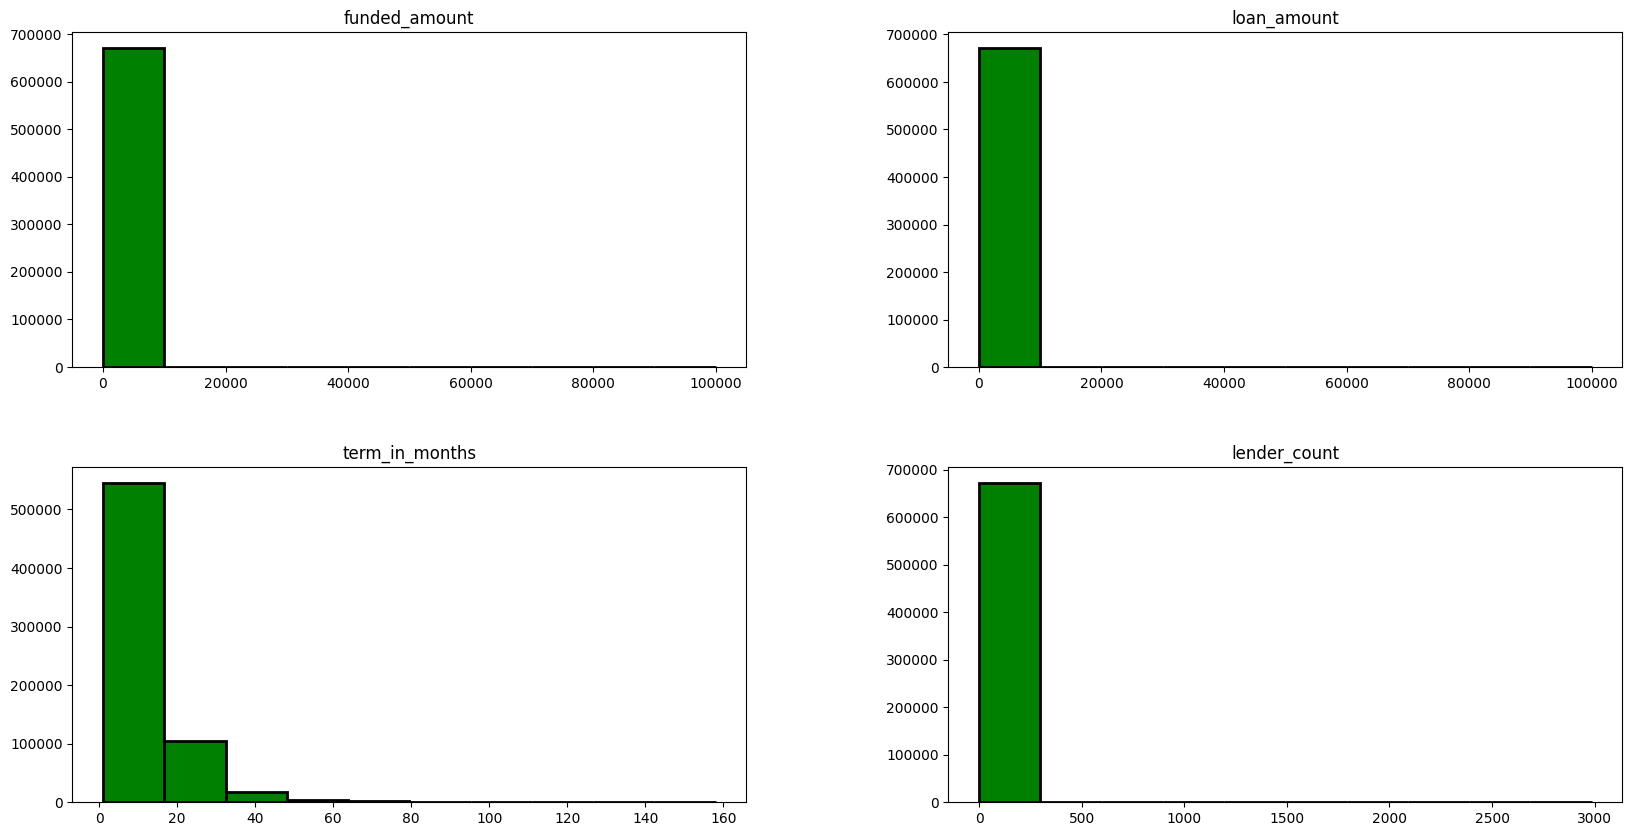

In [75]:
# Create a histogram plot for selected columns in the 'kiva_loans_copy' DataFrame.

# Select the columns 'funded_amount', 'loan_amount', 'term_in_months', and 'lender_count'
kiva_loans_copy[['funded_amount', 'loan_amount', 'term_in_months', 'lender_count']].hist(
    edgecolor='black',        # Set the edge color of histogram bars to black
    grid=False,               # Disable the grid in the plot
    linewidth=2,             # Set the line width of the bars to 2
    color='green',           # Set the color of the bars to green
    figsize=(20, 10)         # Set the figure size to 20x10 inches
);

# The resulting plot displays histograms for the selected columns.


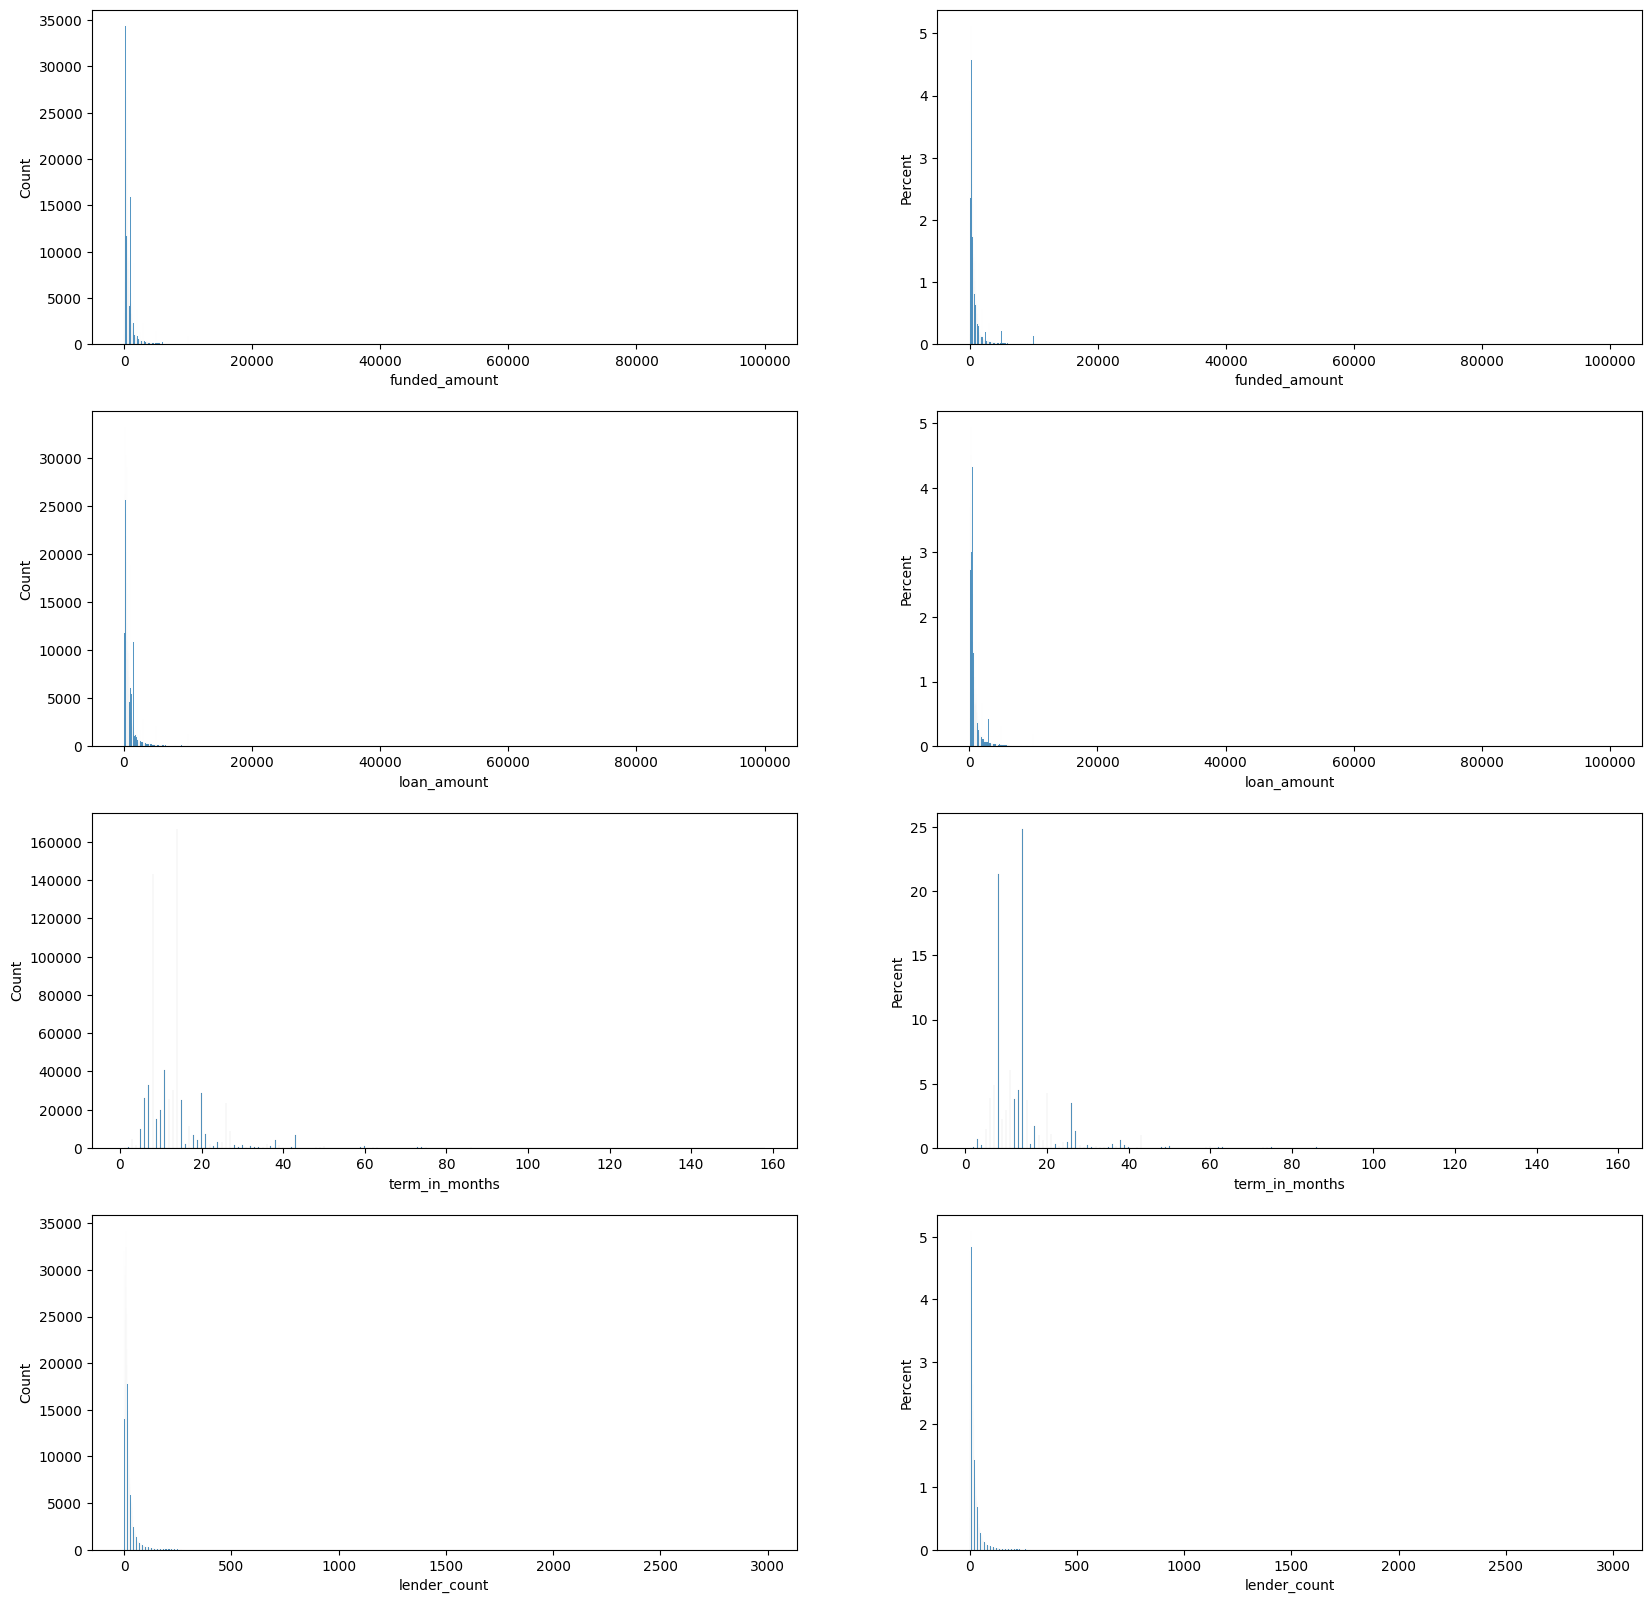

In [76]:
# Create a new figure for subplots with a specified figure size.
fig = plt.figure(figsize=(20, 20))

# Iterate through a list of column pairs, each specifying a column and a statistical value.
for i, col in enumerate([('funded_amount', 'count'), ('funded_amount', 'percent'), ('loan_amount', 'count'),
                         ('loan_amount', 'percent'), ('term_in_months', 'count'), ('term_in_months', 'percent'),
                         ('lender_count', 'count'), ('lender_count', 'percent')], 1):

    # Add a subplot to the figure, arranging them in a 4x2 grid.
    ax = fig.add_subplot(4, 2, i)

    # Create a histogram plot using Seaborn for the specified column and statistic.
    sns.histplot(kiva_loans_copy[col[0]], stat=col[1], ax=ax)

# The resulting figure contains 4x2 subplots, each displaying a histogram with different statistics.


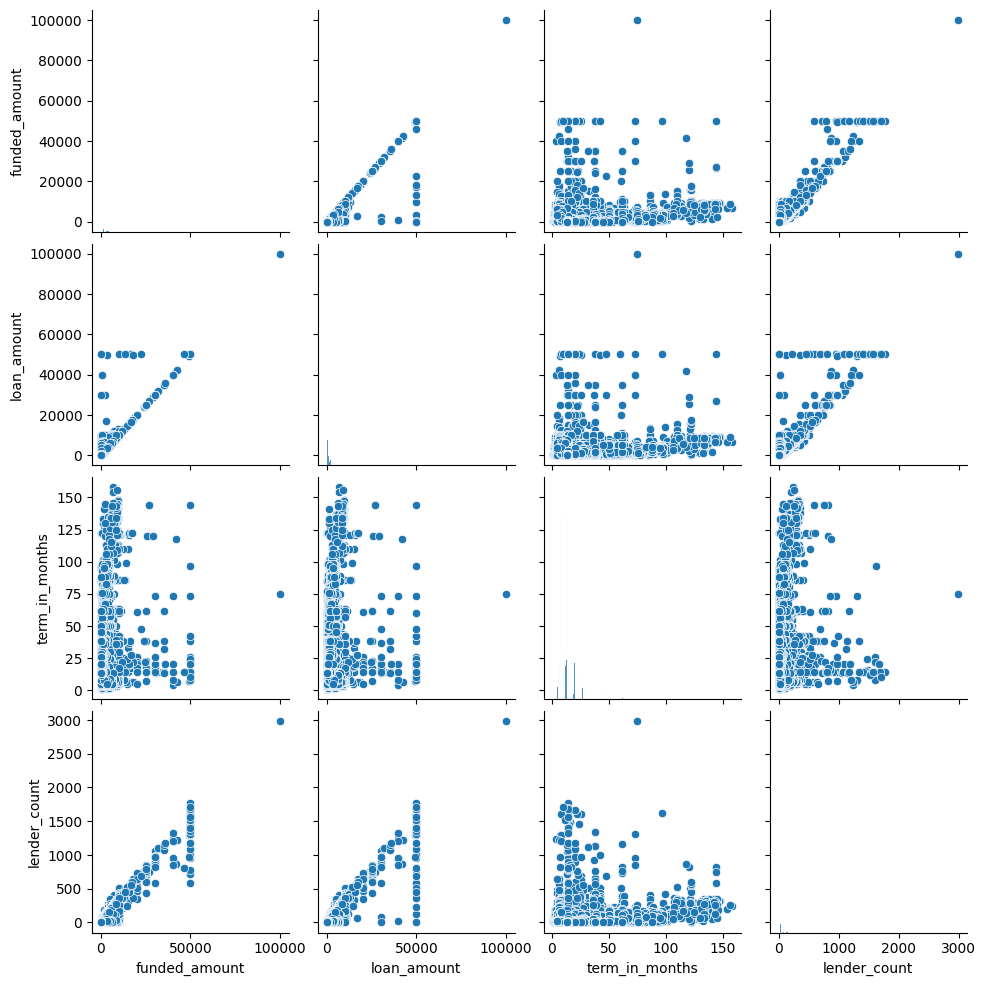

In [77]:
# Create a pairplot using Seaborn to visualize relationships between selected columns.

# Select the columns 'funded_amount', 'loan_amount', 'term_in_months', and 'lender_count'
# from the 'kiva_loans_copy' DataFrame to include in the pairplot.
sns.pairplot(kiva_loans_copy[['funded_amount', 'loan_amount', 'term_in_months', 'lender_count']])

# The resulting pairplot displays scatter plots of these columns against each other and histograms
# along the diagonal to show the distribution of each individual column.

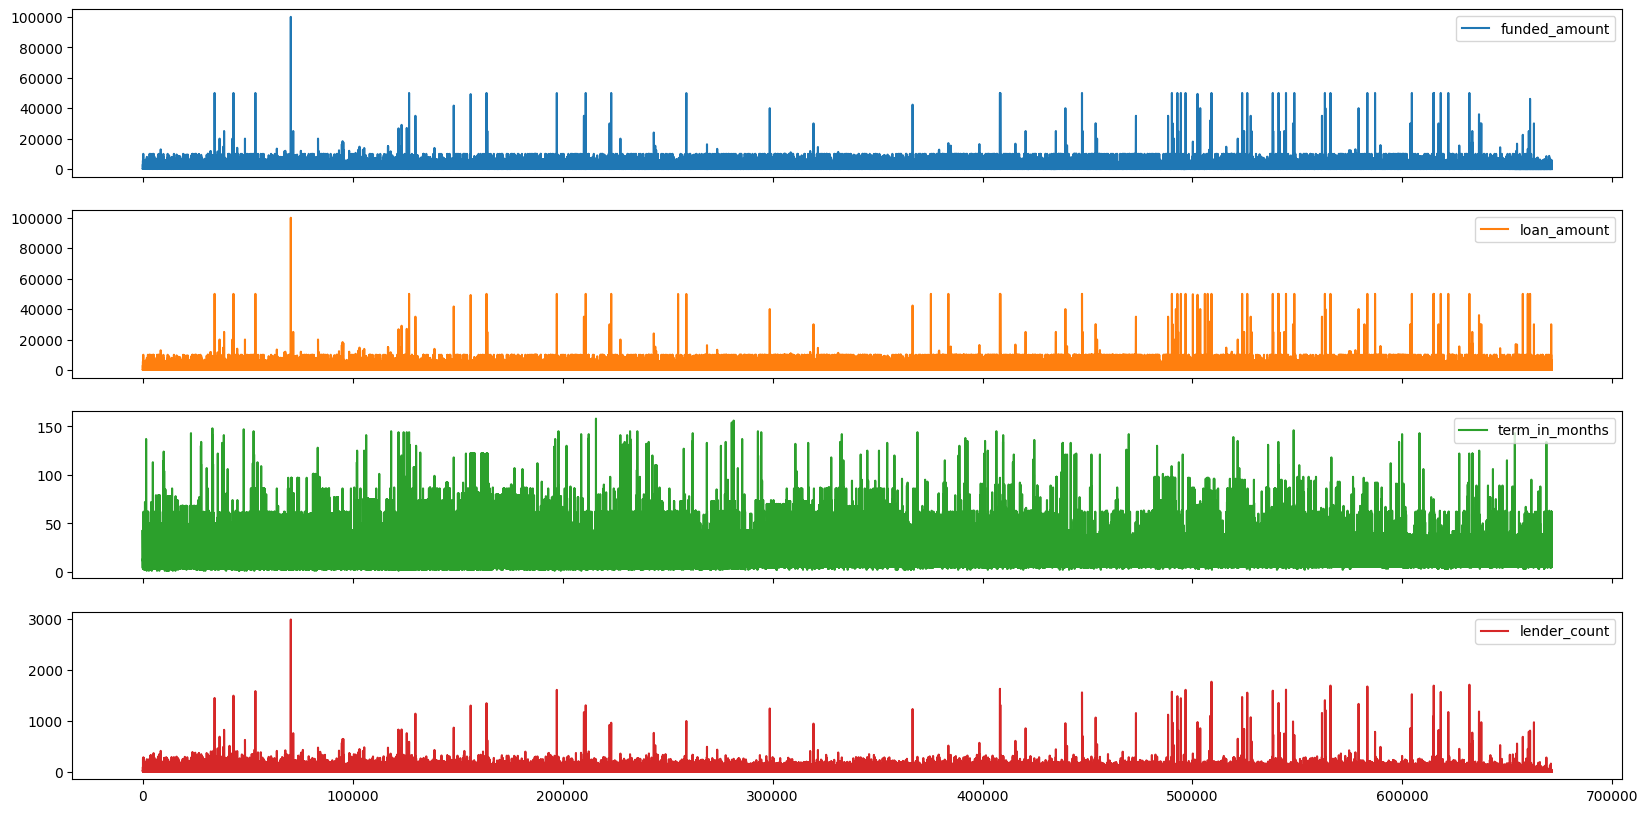

In [78]:
# Create subplots for selected columns in the 'kiva_loans_copy' DataFrame.

# Select the columns 'funded_amount', 'loan_amount', 'term_in_months', and 'lender_count'
# from the 'kiva_loans_copy' DataFrame to include in the subplots.
kiva_loans_copy[['funded_amount', 'loan_amount', 'term_in_months', 'lender_count']].plot(
    subplots=True,        # Create separate subplots for each selected column.
    layout=(4, 1),        # Arrange the subplots in a 4x1 grid layout.
    figsize=(20, 10)      # Set the figure size to 20x10 inches.
);

# The resulting plot consists of four subplots stacked vertically, each displaying one of the selected columns.

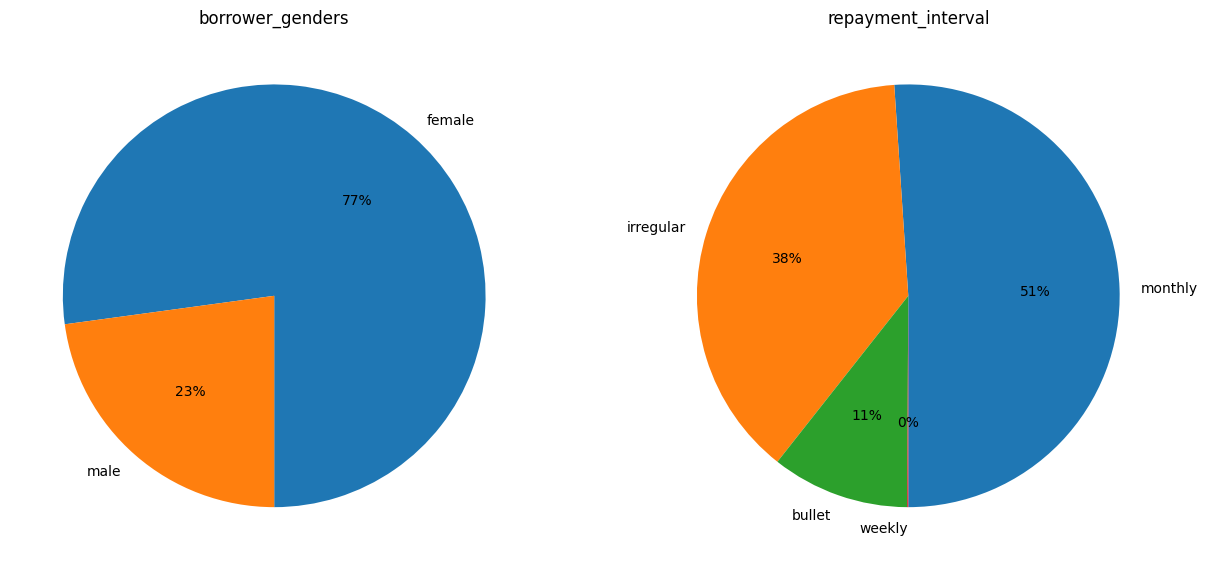

In [79]:
# Identify categorical columns with 10 or fewer unique values in the 'kiva_loans_copy' DataFrame.
pie_column = [c for c in kiva_loans_copy.select_dtypes(exclude='number').columns if kiva_loans_copy[c].nunique() <= 10]

# Create a new figure for pie charts with a specified figure size.
fig = plt.figure(figsize=(15, 15))

# Iterate through the identified categorical columns.
for idx, col in enumerate(pie_column, 1):
    # Add a subplot to the figure (1 row, 2 columns), incrementing the index.
    ax = fig.add_subplot(1, 2, idx)

    # Create a pie chart for the current categorical column.
    ax.pie(
        x=kiva_loans_copy[col].value_counts().values.tolist(),  # Values for the pie chart.
        labels=kiva_loans_copy[col].value_counts().index.tolist(),  # Labels for pie chart slices.
        startangle=-90,          # Set the starting angle of the pie chart.
        autopct='%.0f%%'         # Display percentage values on pie chart slices.
    )

    # Set the title of the subplot to the column name.
    ax.set_title(col)

# The resulting figure contains pie charts for the identified categorical columns.


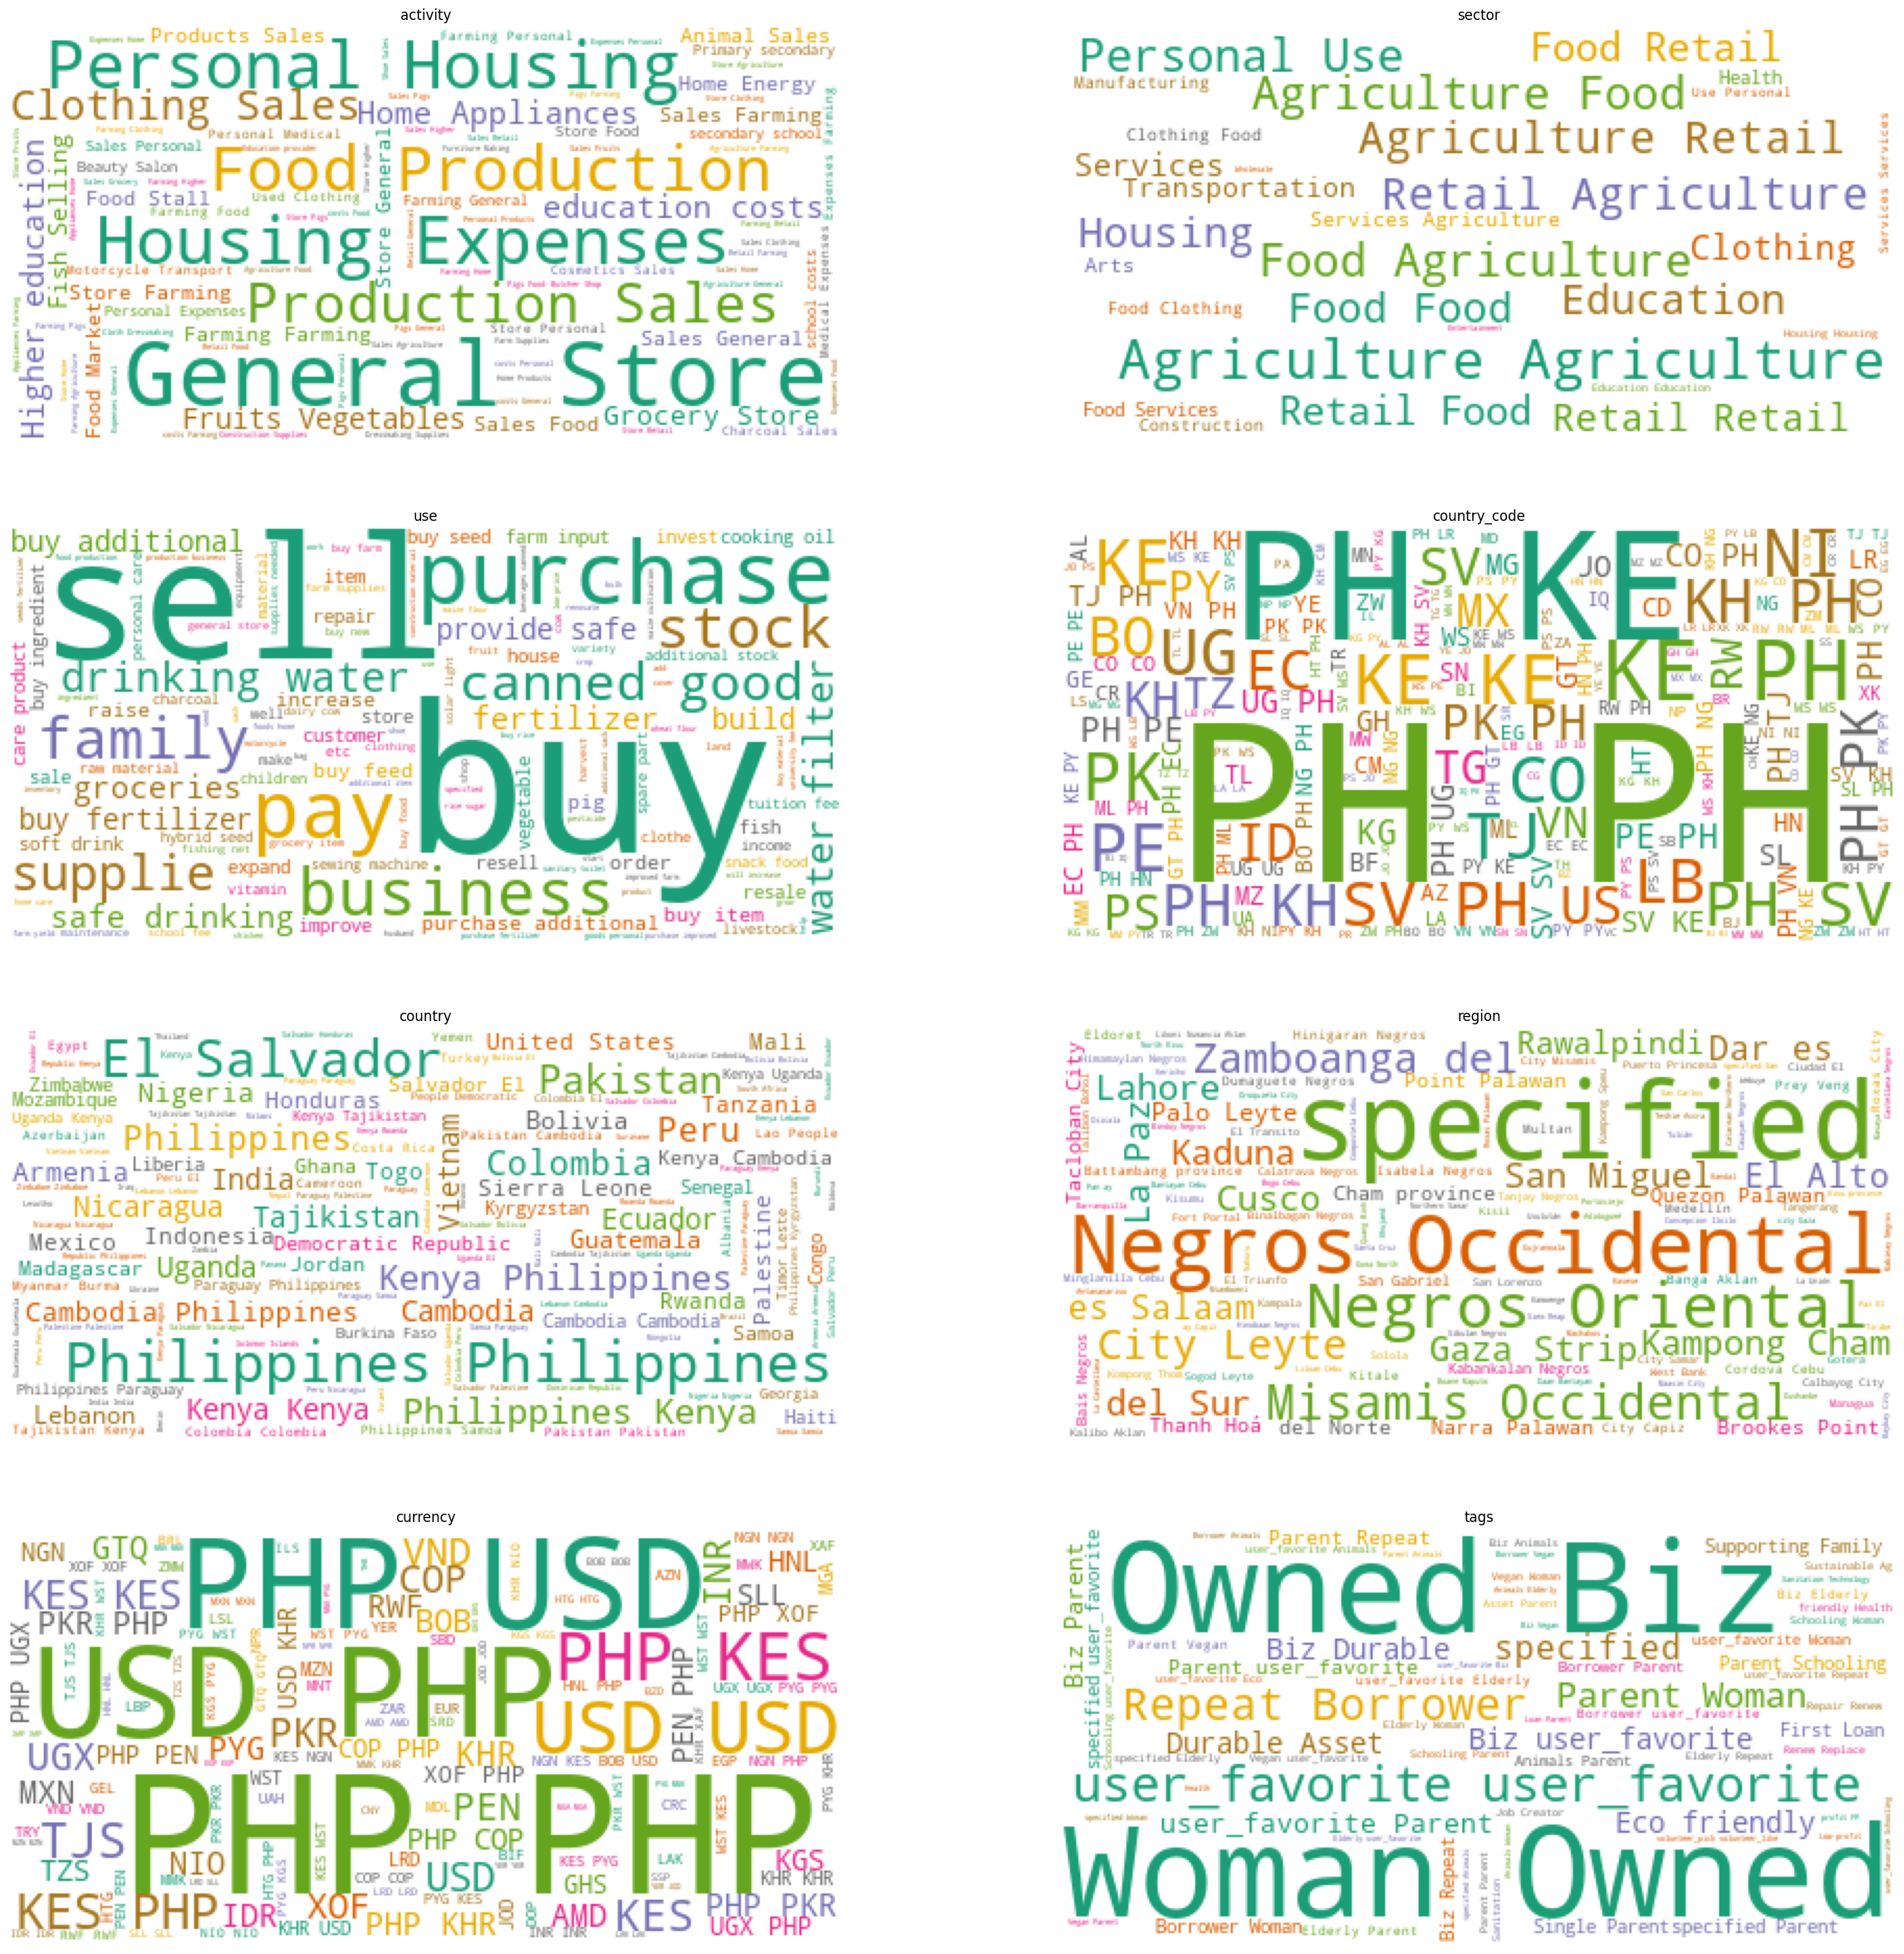

In [80]:
# Import necessary libraries for creating word clouds
from wordcloud import WordCloud, STOPWORDS

# Identify categorical columns with more than 10 unique values and exclude columns with 'time' or 'date' in their names.
word_cloud_columns = [c for c in kiva_loans_copy.select_dtypes(exclude='number').columns if kiva_loans_copy[c].nunique() > 10 if 'time' not in c and 'date' not in c]

# Create a new figure for word clouds with a specified figure size.
fig = plt.figure(figsize=(30, 30))

# Iterate through the identified categorical columns.
for i, c in enumerate(word_cloud_columns, 1):
    # Add a subplot to the figure (4 rows, 2 columns), incrementing the index.
    ax = fig.add_subplot(4, 2, i)
    
    # Convert the column's values to a single string with space-separated values.
    text_data = ' '.join(kiva_loans_copy[c].astype('str'))

    # Create a WordCloud object with appropriate settings.
    wordcloud = WordCloud(
        stopwords=set(STOPWORDS),   # Set stopwords to exclude common words.
        random_state=42,           # Set a random state for reproducibility.
        background_color='white',  # Set the background color of the word cloud.
        colormap='Dark2'           # Set the colormap for the word cloud.
    ).generate(text_data)

    # Display the word cloud plot.
    plt.imshow(wordcloud)
    plt.axis('off')  # Turn off the axes.
    ax.set_title(c)  # Set the title of the subplot to the column name.

# The resulting figure contains word clouds for the identified categorical columns.


__Numerical Vs Categorical__

In [31]:
# Create a Dash web application instance
app = JupyterDash(__name__)

# Define a list of categorical columns by excluding numeric columns that don't contain 'time' or 'date' in their names
category_columns = [c for c in kiva_loans_copy.select_dtypes(exclude='number').columns if 'time' not in c  and 'date' not in c ]

# Define a list of numeric columns
number_columns = ['funded_amount','loan_amount','term_in_months','lender_count']

# Define a list of histogram aggregation functions
histfunc = ['count', 'sum', 'avg', 'min', 'max']

# Define a function to remove underscores from text
def remove_underscore(text):
    return text.replace('_',' ') if '_' in text else text

# Define the layout of the Dash application
app.layout = html.Div([
                      # Create a grid layout with three columns for selecting options
                      dmc.Grid(
                               children=[
                                         dmc.Col([
                                                # Column for selecting a categorical column
                                                dcc.Markdown('__Select Categorical Column__',style={'color':'white'}),
                                                dcc.Dropdown(
                                                            id='category columns',
                                                            value='sector',
                                                            options=category_columns,
                                                            multi=False
                                                           )
                                               ],4),
                                        dmc.Col([
                                                # Column for selecting a numeric column
                                                dcc.Markdown('__Select Numeric Column__',style={'color':'white'}),
                                                dcc.Dropdown(
                                                            id='numeric columns',
                                                            value='funded_amount',
                                                            options=number_columns,
                                                            multi=False
                                                           )
                                                ],4),
                                        dmc.Col([
                                                # Column for selecting a histogram aggregation function
                                                dcc.Markdown('__Select Matrice__',style={'color':'white'}),
                                                dcc.RadioItems(
                                                            id='matirce',
                                                            value='sum',
                                                            options=[{'label':html.Span(func,style={'color':'white'}), 'value':func} for func in histfunc],
                                                           )
                                                ],4),

                                         ]
                           ),
                    # Create a grid layout for displaying the histogram
                    dmc.Grid(dmc.Col([dcc.Graph(id='histgroup')],span=12))
])
# Define a callback function to update the histogram based on user selections
@app.callback(
              Output('histgroup','figure'),
              Input('category columns','value'),
              Input('numeric columns','value'),
              Input('matirce','value')
)
def histgroub(cat,num,fun):
    # Create a histogram figure using Plotly Express
    fig = px.histogram(
                    kiva_loans_copy,
                    x=cat,
                    y=num,
                    histfunc=fun,
                    title=f'<b>{remove_underscore(fun)} of {remove_underscore(num)} by {remove_underscore(cat)}</b>',
                    height=600
                    )\
            .update_traces(texttemplate="%{y:.2s}", 
                           textposition = 'outside' ,
                           marker = dict(color = px.colors.sequential.gray,line = dict(color = 'black' , width = 2)))\
            .update_layout(xaxis = {'categoryorder':'total descending','showgrid':False},
                           yaxis = {'showgrid':False},
                           plot_bgcolor = 'white',
                           title = {'x':0.5,'font_family':'Arile','font_size':25,'font_color':'black'})
    return fig
# Run the Dash application in inline mode with debugging enabled
if __name__ == '__main__':
    app.run_server(mode='inline',debug = True)

__Trending Analysis__

In [29]:
# Merging two DataFrames 'kiva_loans' and 'df_date' based on the 'date' column, using a left join.
# This operation combines data from both DataFrames where the 'date' column matches.
# The resulting DataFrame includes columns from both DataFrames.
trend_df = kiva_loans.merge(df_date, left_on='date', right_on='Date', how='left').assign(
                                                                                        # Create new columns for time periods by formatting the 'disbursed_time', 'funded_time', and 'posted_time' columns.
                                                                                        # These new columns will store the time periods in 'p' format.
                                                                                        disbursed_time_period=kiva_loans.disbursed_time.dt.strftime('%p'),
                                                                                        funded_time_period=kiva_loans.funded_time.dt.strftime('%p'),
                                                                                        posted_time_period=kiva_loans.posted_time.dt.strftime('%p'),

                                                                                        # Create new columns for hours by formatting the 'posted_time' and 'disbursed_time' columns.
                                                                                        # These new columns will store the hours in 'H' format.
                                                                                        posted_hour=kiva_loans.posted_time.dt.strftime('%H'),
                                                                                        disbursed_hour=kiva_loans.disbursed_time.dt.strftime('%H'),
                                                                                        funded_hour=kiva_loans.funded_time.dt.strftime('%H'),

                                                                                        # Create new columns for minutes by formatting the 'disbursed_time', 'funded_time', and 'posted_time' columns.
                                                                                        # These new columns will store the minutes in 'M' format.
                                                                                        disbursed_minute=kiva_loans.disbursed_time.dt.strftime('%M'),
                                                                                        funded_minute=kiva_loans.funded_time.dt.strftime('%M'),
                                                                                        posted_minute=kiva_loans.posted_time.dt.strftime('%M')
                                                                                    )
trend_df.head()

id  funded_amount  loan_amount             activity          sector  \
0  653051            300          300  Fruits & Vegetables            Food   
1  653053            575          575             Rickshaw  Transportation   
2  653068            150          150       Transportation  Transportation   
3  653063            200          200           Embroidery            Arts   
4  653084            400          400           Milk Sales            Food   

                                                 use country_code   country  \
0              To buy seasonal fresh fruits to sell            PK  Pakistan   
1  to repair and maintain the auto rickshaw used ...           PK  Pakistan   
2  To repair their old cyclevan and buy another o...           IN     India   
3  to purchase an embroidery machine and a variet...           PK  Pakistan   
4                            to purchase one buffalo           PK  Pakistan   

         region currency  ...    month_day disbursed_time_period  \
0        Lahore      PKR  ...  January-Wed                    AM   
1        Lahore      PKR  ...  January-Wed                    AM   
2     Maynaguri      INR  ...  January-Wed                    AM   
3        Lahore      PKR  ...  January-Wed                    AM   
4  Abdul Hakeem      PKR  ...  January-Wed                    AM   

  funded_time_period posted_time_period  posted_hour  disbursed_hour  \
0                 AM                 AM           06              08   
1                 AM                 AM           06              08   
2                 PM                 AM           09              08   
3                 PM                 AM           08              08   
4                 PM                 AM           11              08   

  funded_hour disbursed_minute funded_minute posted_minute  
0          10               00            06            12  
1          09               00            17            51  
2          16               00            01            58  
3          13               00            00            03  
4          19               00            18            53  

[5 rows x 43 columns]

In [32]:
# Open a file and write CSS code to it
with open('H:/CS50/Portfolio Projects/Kiva/assets/reset.css','w') as file:
        file.write('body{background-color:rgb(14, 13, 13);}\n')
        file.close()

# Define the CSS file path
dbc_css = "/assets/reset.css"

# Create a Dash web application instance
app_trand = JupyterDash(__name__,external_stylesheets=[dbc_css])

# Get a list of date columns from a DataFrame
date_columns = df_date.columns.tolist()   

# Append additional columns to the date_columns list
[date_columns.append(c) for c in ['start_month','start_week','posted_time_period', 'disbursed_time_period', 'funded_time_period',
                                'posted_hour', 'posted_minute', 'disbursed_hour', 'disbursed_minute','funded_hour', 'funded_minute']]

# Define a list of aggregated columns
aggregated_columns = ['Total_Amount_Loans', 'Total_Funded_Loans', 'Total_Loans',
                        'Total_Lenders', 'Ave_Amount_Per_Loan', 'Ave_lenders_Per_Loan']

# Define a function to search for columns
def search_by_column(column):
    """
    Search for columns related to a specified data category within a predefined list of column names.

    Parameters:
    - column (str): The data category to search for (e.g., 'Amount', 'Funded', 'Lenders', 'Loans').

    Returns:
    - cols (list): A list of column names related to the specified data category found in the predefined list.
    
    Description:
    This function takes a data category as input and searches for related columns within a predefined list
    of column names. It is particularly useful for identifying columns associated with financial metrics
    such as amounts, funding, lenders, and loans. The function uses regular expressions to match the
    specified data category (e.g., 'Amount') with column names in the predefined list, returning a list of
    matching column names.

    Example:
    >>> search_by_column('Amount')
    ['Pct_Cumulative_Amount', 'Growth_Amount', 'Rolling_Average_Amount']
    
    >>> search_by_column('Lenders')
    ['Pct_Cumulative_Lenders', 'Growth_Lenders', 'Rolling_Average_Lenders']
    """
    numbers_columns = ['Pct_Cumulative_Amount', 'Growth_Amount', 'Rolling_Average_Amount',
                        'Pct_Cumulative_Funded', 'Growth_Funded',
                        'Rolling_Average_Funded', 'Pct_Cumulative_Loans', 'Growth_Loans',
                        'Rolling_Average_Loans', 'Pct_Cumulative_Lenders',
                        'Growth_Lenders', 'Rolling_Average_Lenders']
    
    # Check if the input column name contains keywords ('Amount', 'Funded', 'Lenders', 'Loans')
    check_column = [c for c in ['Amount', 'Funded', 'Lenders', 'Loans'] if c in column]
    
    # Use regular expressions to find columns that match the specified data category
    cols = [col for col in numbers_columns if re.findall(f'{check_column[0]}', col)]
    
    return cols

def get_data(groupby_column,window_num):
    """
    Aggregate and compute various financial metrics based on a specified grouping column.

    Parameters:
    - groupby_column (str): The column by which the data should be grouped for aggregation.

    Returns:
    - data (DataFrame): A pandas DataFrame containing aggregated financial metrics based on the grouping column.

    Description:
    This function takes a grouping column as input and aggregates financial data from the 'trend_df' DataFrame.
    It computes various financial metrics such as total loan amount, total funded loans, total number of loans,
    total number of lenders, average amount per loan, and more. The function then calculates additional metrics
    like cumulative percentages, growth rates, and rolling averages for these financial metrics. The result is
    returned as a DataFrame.

    Example:
    >>> get_data('Date')
    Returns a DataFrame with financial metrics aggregated by date.

    >>> get_data('Category')
    Returns a DataFrame with financial metrics aggregated by category.
    """
    # Aggregate and compute various financial metrics based on the specified grouping column
    data = trend_df.groupby(groupby_column).agg(
                                Total_Amount_Loans =('loan_amount','sum'),
                                Total_Funded_Loans =('funded_amount','sum'),
                                Total_Loans =('id','nunique'),
                                Total_Lenders = ('lender_count','sum'),
                                Ave_Amount_Per_Loan =('loan_amount','mean'))\
                                                                            .reset_index()\
                                                                            .assign(
                                                                                    Ave_lenders_Per_Loan = lambda x : x['Total_Lenders'] / x['Total_Loans'],
                                                                                    Pct_Cumulative_Amount = lambda x : (x['Total_Amount_Loans'] / x['Total_Amount_Loans'].sum()).rolling(window=len(x) , min_periods=1).sum(),
                                                                                    Growth_Amount = lambda x : x['Total_Amount_Loans'].diff() / x['Total_Amount_Loans'],
                                                                                    Rolling_Average_Amount = lambda x : x['Total_Amount_Loans'].rolling(window_num).sum(),
                                                                                    Pct_Cumulative_Funded = lambda x : (x['Total_Funded_Loans'] / x['Total_Funded_Loans'].sum()).rolling(window=len(x) , min_periods=1).sum(),
                                                                                    Growth_Funded = lambda x : x['Total_Funded_Loans'].diff() / x['Total_Funded_Loans'],
                                                                                    Rolling_Average_Funded = lambda x : x['Total_Funded_Loans'].rolling(window_num).sum(),
                                                                                    Pct_Cumulative_Loans = lambda x : (x['Total_Loans'] / x['Total_Loans'].sum()).rolling(window=len(x) , min_periods=1).sum(),
                                                                                    Growth_Loans = lambda x : x['Total_Loans'].diff() / x['Total_Loans'],
                                                                                    Rolling_Average_Loans = lambda x : x['Total_Loans'].rolling(window_num).sum(),
                                                                                    Pct_Cumulative_Lenders = lambda x : (x['Total_Lenders'] / x['Total_Lenders'].sum()).rolling(window=len(x) , min_periods=1).sum(),
                                                                                    Growth_Lenders = lambda x : x['Total_Lenders'].diff() / x['Total_Lenders'],
                                                                                    Rolling_Average_Lenders = lambda x : x['Total_Lenders'].rolling(window_num).sum()
                                                                                    )
    return data

def get_resample_data(aggregateby,window_num):
    """
    Resample and aggregate financial data based on a specified time interval.

    Parameters:
    - aggregateby (str): The time interval for resampling and aggregation (e.g., 'D' for daily, 'M' for monthly).

    Returns:
    - data (DataFrame): A pandas DataFrame containing aggregated financial metrics based on the resampled time interval.

    Description:
    This function takes a time interval ('aggregateby') as input and resamples financial data from the 'trend_df'
    DataFrame based on the specified interval. It then aggregates various financial metrics such as total loan amount,
    total funded loans, total number of loans, total number of lenders, average amount per loan, and more. Additionally,
    the function calculates additional metrics like cumulative percentages, growth rates, and rolling averages for
    these financial metrics based on the resampled data. The result is returned as a DataFrame.

    Example:
    >>> get_resample_data('M')
    Returns a DataFrame with financial metrics resampled and aggregated monthly.

    >>> get_resample_data('D')
    Returns a DataFrame with financial metrics resampled and aggregated daily.
    """
    # Resample and aggregate financial data based on the specified time interval
    data = trend_df.resample(aggregateby,on='Date')\
                               .agg(
                                    Total_Amount_Loans =('loan_amount','sum'),
                                    Total_Funded_Loans =('funded_amount','sum'),
                                    Total_Loans =('id','nunique'),
                                    Total_Lenders = ('lender_count','sum'),
                                    Ave_Amount_Per_Loan =('loan_amount','mean'))\
                               .reset_index()\
                               .assign(
                                    Ave_lenders_Per_Loan = lambda x : x['Total_Lenders'] / x['Total_Loans'],
                                    Pct_Cumulative_Amount = lambda x : (x['Total_Amount_Loans'] / x['Total_Amount_Loans'].sum()).rolling(window=len(x) , min_periods=1).sum(),
                                    Growth_Amount = lambda x : x['Total_Amount_Loans'].diff() / x['Total_Amount_Loans'],
                                    Rolling_Average_Amount = lambda x : x['Total_Amount_Loans'].rolling(window_num).sum(),
                                    Pct_Cumulative_Funded = lambda x : (x['Total_Funded_Loans'] / x['Total_Funded_Loans'].sum()).rolling(window=len(x) , min_periods=1).sum(),
                                    Growth_Funded = lambda x : x['Total_Funded_Loans'].diff() / x['Total_Funded_Loans'],
                                    Rolling_Average_Funded = lambda x : x['Total_Funded_Loans'].rolling(window_num).sum(),
                                    Pct_Cumulative_Loans = lambda x : (x['Total_Loans'] / x['Total_Loans'].sum()).rolling(window=len(x) , min_periods=1).sum(),
                                    Growth_Loans = lambda x : x['Total_Loans'].diff() / x['Total_Loans'],
                                    Rolling_Average_Loans = lambda x : x['Total_Loans'].rolling(window_num).sum(),
                                    Pct_Cumulative_Lenders = lambda x : (x['Total_Lenders'] / x['Total_Lenders'].sum()).rolling(window=len(x) , min_periods=1).sum(),
                                    Growth_Lenders = lambda x : x['Total_Lenders'].diff() / x['Total_Lenders'],
                                    Rolling_Average_Lenders = lambda x : x['Total_Lenders'].rolling(window_num).sum()
                                     ).rename(columns={'Date':'start_month' if aggregateby == 'MS' else 'start_week'})
    return data

# Define the layout of the Dash web application
app_trand.layout = dmc.Container(fluid=True,
                                 children=[
                                           dmc.Grid([
                                                     dmc.Col([
                                                             dmc.Select(
                                                                       label=html.Span('Select a Date Column',style={'color':'white'}),
                                                                       data=[{'label':remove_underscore(c),'value':c} for c in date_columns],
                                                                       value='Date',
                                                                       id='date_columns'
                                                                        ),
                                                     ],span=4),
                                                     dmc.Col([
                                                             dmc.Select(
                                                                       label=html.Span('Select a Aggregated Column',style={'color':'white'}),
                                                                       data=[{'label':remove_underscore(c),'value':c} for c in aggregated_columns],
                                                                       value='Total_Amount_Loans',
                                                                       id='agg_columns'
                                                                        )
                                                     ],span=4),
                                                    dmc.Col([
                                                            dmc.TextInput(
                                                                          label=html.Span("Enter The window of the rolling average :",style={'color':'white'}),
                                                                          placeholder='The date column Is dependent on it...',
                                                                          id='textinput',
                                                                          value='12')
                                                            ],span=4)
                                           ]),
                                           dmc.Grid([
                                                    dmc.Col([
                                                            dcc.Graph(id='line_chart')
                                                           ],span=12)
                                           ])
                                           
                                          ]
                                 )
# Define a callback function to update the line chart based on user selections
@app_trand.callback(
    Output('line_chart','figure'),
    Input('date_columns','value'),
    Input('agg_columns','value'),
    Input('textinput','value'),
)

# Define a callback function for updating the line chart
def Line_Chart(DateColumn,agg_columns,input_text ):

    try:
        input_text = int(input_text)
        print(input_text)
    except:
        print('Please Enter Numbers')

    if DateColumn == 'start_month':

        df = get_resample_data('MS',input_text)

    elif DateColumn == 'start_week':

        df = get_resample_data('W',input_text)
    else:

        df = get_data(DateColumn,input_text)

    # Create a subplot with 3 rows and 1 column, where the first row is smaller than the others
    fig = make_subplots(rows=3, cols=1, row_heights=[0.75, 1, 3.0], specs=[[{"secondary_y": True}], [{"secondary_y": True}], [{"secondary_y": True}]])

    # Add a scatter plot for 'loan_amount' in the third row and first column with a gold color
    fig.add_trace(go.Scatter(
                    x=df[DateColumn],
                    y=df[agg_columns],
                    name=remove_underscore(agg_columns),
                    line={'shape':'linear','color':'gold'}),row=3,col=1).update_xaxes(rangeslider_visible=True, col=1, row=3)
    

    df['loan_Quantiles'] = pd.cut(df[agg_columns] , bins=df[agg_columns].quantile([0,.25,.50,0.75,1]).tolist() , labels=['0% to 25%','25% to 50%','50% to 75%','75% to 100%']).fillna('0% to 25%')

    # Loop through unique 'loan_Quantiles' and add colored rectangles for each quantile
    for idx, quantile in enumerate(df.loan_Quantiles.unique()):
        colors = ['snow','slategray','slateblue','skyblue']
        total_amount_loans = df[df.loan_Quantiles == quantile][agg_columns].sum()
        avg_amount_per_loan = round(df[df.loan_Quantiles == quantile][agg_columns].sum() / df[df.loan_Quantiles == quantile][agg_columns].count(),2)
        fig.add_hrect(
                y0=df[df.loan_Quantiles == quantile][agg_columns].min(), 
                    y1=df[df.loan_Quantiles == quantile][agg_columns].max(),
                    line_width=0,
                    fillcolor=colors[idx],
                    opacity=0.2,
                    col=1, 
                    row=3,
                    annotation={'text':f'<b>||{quantile}||</b><br><b>Total Amount Of Loans : {total_amount_loans:,d}$</b><br><b>Avg Amount Per Loan : {avg_amount_per_loan:,.0f}$</b><br>',
                                'x':1.15,
                                'xref':"paper",
                                'yref':"paper",
                                'font_size':10,
                                'font_color':colors[idx]},
                    annotation_position='bottom right' if quantile == '25% to 50%' or quantile == '0% to 25%' else 'top right')

    # Add a scatter plot for 'cumulative' in the third row and first column with a dashed wheat-colored line and a secondary y-axis
    fig.add_trace(go.Scatter(
                    x=df[DateColumn],
                    y=df[[i for i in search_by_column(agg_columns) if 'cumulative' in i.lower()][0]],
                    name=str(remove_underscore([i for i in search_by_column(agg_columns) if 'cumulative' in i.lower()][0])),
                    line={'dash':'dot','color':'wheat'}),row=3,col=1,secondary_y=True).update_xaxes(rangeslider_visible=True,fixedrange=True , col=1,row=3)

    # Add a scatter plot for 'rolling average' in the second row and first column with a green line
    fig.add_trace(go.Scatter(
                    x=df[DateColumn],
                    y=df[[i for i in search_by_column(agg_columns) if 'rolling' in i.lower()][0]],
                    name=str(remove_underscore([i for i in search_by_column(agg_columns) if 'rolling' in i.lower()][0])),
                    line={'color':'seagreen','shape':'spline'}),row=2,col=1,).update_xaxes(visible=False,row=2,col=1).update_yaxes(visible=False,fixedrange=True,col=1,row=2)

    # Add a scatter plot for 'growth' in the first row and first column with a red line
    fig.add_trace(go.Scatter(
                    x=df[DateColumn],
                    y=df[[i for i in search_by_column(agg_columns) if 'growth' in i.lower()][0]],
                    name=str(remove_underscore([i for i in search_by_column(agg_columns) if 'growth' in i.lower()][0])),
                    line={'color':'tomato'}),row=1,col=1).update_xaxes(visible=False,row=1,col=1).update_yaxes(visible=False,fixedrange=True)
    rolling_name = str(remove_underscore([i for i in search_by_column(agg_columns) if 'rolling' in i.lower()][0]))
    # Customize the layout with hover mode, legend position, height, and dark template
    fig.update_layout(
                    hovermode="x unified",
                    legend={'x':0.65,'y':1.1,'orientation':'h'},
                    height=1000,
                    template='plotly_dark',
                    title = {'text':f'<b>{remove_underscore(agg_columns)} & {rolling_name} with {input_text} offset by {remove_underscore(df.columns[0])}</b>','font_family':'Arile','font_size':20},
    )
    

    return fig 

# Run the Dash web application
if __name__ == '__main__':
    app_trand.run_server(mode='inline',debug=True)


12


__Geo Analysis__

In [54]:
# Extract non-'lat' and non-'lon' numerical columns from the DataFrame
num_columns = geo_df_copy.select_dtypes(include='number').columns[~geo_df_copy.select_dtypes(include='number').columns.str.contains(r'\b(?:lat|lon|MPI)\b')].tolist()


# Get unique world region values from the 'world_region' column in the DataFrame
world_region_columns = geo_df_copy.world_region.unique().tolist()

# Add an 'All' option to the list of unique world regions
world_region_columns.append('All')

# Define a function to get a list of countries based on selected world region
def get_countries_by(world_region):
    """
    Retrieve a list of unique countries within a specified world region.

    Parameters:
        world_region (str): The name of the world region for which you want to retrieve countries.

    Returns:
        list: A list of unique country names within the specified world region.

    Description:
        This function takes the name of a world region as input and filters the 'geo_df_copy'
        DataFrame to include only rows that belong to the specified world region. It then extracts
        the unique 'country' values from the filtered data and returns them as a list.

    Example:
        To get a list of countries within the "Europe" world region:
        >>> europe_countries = get_countries_by("Europe")
        >>> print(europe_countries)
        ['France', 'Germany', 'Spain', ...]  # List of unique country names in Europe

    Note:
        - The 'geo_df_copy' DataFrame should be defined and available in the current scope.
        - This function is useful for obtaining a list of countries to use as options in
          interactive applications or for data analysis specific to a particular world region.
    """
    countries = geo_df_copy[geo_df_copy.world_region == world_region]['country'].unique().tolist()
    return countries


# Open a file and write CSS code to it
with open('H:/CS50/Portfolio Projects/Kiva/assets/reset.css','w') as file:
        file.write('body{background-color:white;}\n')
        file.close()

# Define the CSS file path
dbc_css = "/assets/reset.css"

# Create a Dash web application instance
geo = JupyterDash(__name__,external_stylesheets=[dbc_css])


# Define the layout of the web page using Dash components
geo.layout = dmc.Container(
    fluid=True,
    children=[
        # # Create tabs to organize different sections of the web page
        dcc.Tabs(
            children=[
                       # Define the first tab: 'Overall'
                      dcc.Tab(
                              label = 'Over all',
                              children =[
                                        dmc.Grid([
                                                dmc.Col([
                                                    # Create a dropdown to select one of the numerical columns
                                                    dmc.Select(
                                                            label=html.Span('Select one of the following columns', style={'color': 'black', 'font': 'bold'}),
                                                            data=[{'label': remove_underscore(c), 'value': c} for c in num_columns],
                                                            value='population',
                                                            id='z'
                                                    )
                                                ], span=12)
                                            ]),
                                            dmc.Space(h=30),# Add spacing 
                                            html.Hr(),# Add a horizontal line
                                            dmc.Card(dcc.Graph(id='Choropleth'))  # Create a card to display the choropleth map
                                        ]
                            ),
                    # Define the second tab: 'Specific MPI'
                     dcc.Tab(
                            label = 'Specific MPI',
                            children = [
                                         dmc.Grid([
                                                  dmc.Col([
                                                          html.H3(html.Span('Select A World Region',style={'color':'black'})),
                                                          dcc.Dropdown(
                                                                       id='world_region',
                                                                       value='All',
                                                                       options=world_region_columns)
                                                         ],span=5),
                                                  dmc.Col([
                                                           html.H3(html.Span('Select Multiple Countries',style={'color':'black'})),
                                                          dcc.Dropdown(
                                                                       id='country',
                                                                       multi=True)
                                                      ],span=5)],justify='center'), # Center-align the grid
        
                                            dmc.Space(h=30),
                                            html.Hr(),
                                            dmc.Card(dcc.Graph(id='scatter_geo')) 
                                         
                            ]
                     )
                     
                      ]
               )
        
        ]
)

# Define a callback function to update the choropleth map
@geo.callback(
    Output('Choropleth', 'figure'),
    Input('z', 'value')
)
def choropleth_map(z):
    # Calculate the percentage of the total value represented by the most significant country
    Pct = round(geo_df_copy.sort_values(by=z, ascending=False).reset_index().loc[0, z] / geo_df_copy.sort_values(by=z, ascending=False).reset_index()[z].sum() * 100, 2)
    
    # Identify the country with the highest value in the selected column
    most_country = geo_df_copy.sort_values(by=z, ascending=False).reset_index().loc[0, 'country']

    # Create a choropleth map using Plotly
    fig = go.Figure(data=go.Choropleth(
        locations=geo_df_copy['ISO'],
        z=geo_df_copy[z],
        text=geo_df_copy['country'],
        colorscale='Reds',
        autocolorscale=False,
        reversescale=True,
        marker_line_color='white',
        marker_line_width=0.5,
        colorbar_title=f'<b>{remove_underscore(z)}</b>'
    )) \
        .update_layout(
        height=750,
        title={'text': f'<b>{most_country} has %{Pct} of total {remove_underscore(z)}</b>'},
        geo=dict(
            showframe=False,
            showcoastlines=False,
            projection_type='equirectangular')
    )

    return fig

# Define a callback function to update the 'country' dropdown options based on the selected 'world_region'
@geo.callback(
    Output('country', 'options'),  # Update the options of the 'country' dropdown
    Input('world_region', 'value')  # Listen for changes in the 'world_region' dropdown
)
def select_countries(world_region):
    # Call a function (get_countries_by) to retrieve the list of countries based on the selected world region
    return get_countries_by(world_region)

# Define a callback function to update the scatter_geo map based on selected 'world_region' and 'countries'
@geo.callback(
    Output('scatter_geo', 'figure'),  # Update the figure of the scatter_geo map
    Input('world_region', 'value'),  # Listen for changes in the 'world_region' dropdown
    Input('country', 'value')  # Listen for changes in the 'country' dropdown
)
def scatter_geo(world, countries):

    # Create a text column in geo_df_copy to be used for hover information in the scatter_geo map
    geo_df_copy['text'] = geo_df_copy['country'].astype(str) + '<br> ' + geo_df_copy['region_location'].astype(str) + '<br>mpi : ' + (geo_df_copy['MPI']).astype(str)

    # Filter the DataFrame based on selected 'world_region' and 'countries'
    if world == 'All':
        scatter_geo_df = geo_df_copy
    elif world != 'All' and countries is None:
        scatter_geo_df = geo_df_copy.query('world_region == @world')
    else:
        scatter_geo_df = geo_df_copy.query('world_region == @world & country in @countries')

    # Calculate the percentage of total MPI represented by the selected data
    pct_world = round(scatter_geo_df['MPI'].sum() / geo_df_copy['MPI'].sum() * 100, 2)

    # Create an empty Figure object to build the scatter_geo map
    fig = go.Figure()

    # Add a scattergeo trace to the figure
    fig.add_trace(go.Scattergeo(
                            lat=scatter_geo_df['lat'],
                            lon=scatter_geo_df['lon'],
                            hoverinfo='text',
                            text=scatter_geo_df['text'],
                            marker=dict(
                                size=scatter_geo_df['MPI'] * 200,
                                color='orange',
                                line_color='rgb(40,40,40)',
                                line_width=0.5,
                                sizemode='area',
                                opacity=0.50
                            )
                        ))

    # Update the layout of the figure
    fig.update_layout(
                    title_text=f'{world} has <b>{pct_world}%</b>',
                    showlegend=False,
                    geo=dict(
                        landcolor='rgb(217, 217, 217)',
                        showframe=False,
                        showcoastlines=False
                    ),
                    height=750
                )

    return fig  # Return the updated scatter_geo figure

# Run the Dash application
if __name__ == '__main__':
    geo.run_server(mode='inline', debug=True)


In [34]:
from geopy.geocoders import Nominatim

def lat_lon_by_country(*countries):
    """
    Get latitude and longitude coordinates for a list of countries.

    Args:
        *countries (str): A variable-length list of country names.

    Returns:
        list: A list of dictionaries, where each dictionary contains the following keys:
              - 'country': The name of the country.
              - 'lat': The latitude coordinate.
              - 'lon': The longitude coordinate.

    Note:
        This function uses the Nominatim geocoding service to retrieve coordinates based on country names.
        Make sure to respect any rate limits and terms of use of the geocoding service.
    """
    geolocator = Nominatim(user_agent="Getloc")
    data = []
    for c in countries:
        if geolocator is not None:
            loc = geolocator.geocode(c)
            data.append({'country':c,'lat':loc.latitude,'lon':loc.longitude})
        else:
            data.append({'country':c,'lat':None,'lon':None})
    return data

geo_data = lat_lon_by_country(*kiva_loans_copy.country.unique().tolist())

# Merge trend_df with geo_data based on the 'country' column using an inner join, which retains only matching rows.
geo_time_df = trend_df.merge(pd.DataFrame(geo_data, columns=['country', 'lat', 'lon']),
                             on='country', how='inner')

# The resulting geo_time_df DataFrame now contains additional latitude ('lat') and longitude ('lon') columns from the geo_data DataFrame.

In [55]:
# Create a list of columns in 'geo_time_df' that are not present in 'kiva_loans_copy'
# The list comprehension iterates through the columns in 'geo_time_df' (excluding the last two columns)
# and checks if each column is not present in the list of columns from 'kiva_loans_copy'.
date_matrices = [col for col in geo_time_df.columns[:-2] if col not in kiva_loans_copy.columns.tolist()]

# Create a function to get the data
def get_density_data(groupby):
    """
    Calculate density data based on grouping criteria.

    Args:
        groupby (str): The column by which the data should be grouped.

    Returns:
        pd.DataFrame: A DataFrame containing density data.

    This function groups the 'geo_time_df' DataFrame by the specified 'groupby' column and calculates
    various metrics such as total loan amounts, total funded loans, total loans, and total lenders.
    It then computes additional metrics such as average amount per loan, average lenders per loan,
    and average amount per lender. Finally, it converts the 'groupby' column to a string data type,
    identifies metrics columns, and returns the resulting DataFrame.
    """
    # Group 'geo_time_df' by specified 'groupby' column and calculate metrics
    density_df = geo_time_df.groupby([groupby, 'country', 'lat', 'lon']).agg(
        Total_Amount_Loans=('loan_amount', 'sum'),
        Total_Funded_Loans=('funded_amount', 'sum'),
        Total_Loans=('id', 'nunique'),
        Total_Lenders=('lender_count', 'sum')
    ).reset_index().assign(
        Ave_Amount_Per_Loan=lambda x: round(x['Total_Amount_Loans'] / x['Total_Loans'], 2),
        Ave_lenders_Per_Loan=lambda x: round(x['Total_Lenders'] / x['Total_Loans'], 2),
        Ave_Amount_Per_lender=lambda x: round(x['Total_Amount_Loans'] / x['Total_Lenders'], 2)
    )

    # Convert the 'groupby' column to string data type
    density_df = density_df.astype({groupby: 'str'})

    # Define global variable 'matrics_columns'
    global matrics_columns
    # Create a list of columns in 'density_df' that contain an underscore ('_')
    matrics_columns = [c for c in density_df.columns if '_' in c]

    # Return the resulting DataFrame
    return density_df

# Open a file and write CSS code to it
with open('H:/CS50/Portfolio Projects/Kiva/assets/reset.css','w') as file:
        file.write('body{background-color:black;}\n')
        file.close()

# Define the CSS file path
dbc_css = "/assets/reset.css"

# Create a Dash web application instance
geo_time = JupyterDash(__name__,external_stylesheets=[dbc_css])

# Create a layout for the GeoTime app using Dash Material Components
geo_time.layout = dmc.Container(
                                fluid=True,
                                children=[
                                         # Create a grid with two columns
                                          dmc.Grid([
                                                    # Column 1: Select a Matrice
                                                    dmc.Col([
                                                            html.H3(html.Span('Select A Matrice',style={'color':'white'})),
                                                            # Create a Segmented Control for metric selection
                                                            dmc.SegmentedControl(
                                                                         id='metrices',
                                                                         data=[{'label':remove_underscore(c),'value':c} for c in ['Total_Amount_Loans','Total_Funded_Loans','Total_Loans','Total_Lenders','Ave_Amount_Per_Loan','Ave_lenders_Per_Loan','Ave_Amount_Per_lender']],
                                                                         value='Total_Amount_Loans',
                                                                         radius = 'md',
                                                                         color='gray'
                                                                       )
                                                    ],span=6),
                                                    # Column 2: Select a Date Matrice
                                                    dmc.Col([
                                                            html.H3(html.Span('Select A Date Matrice',style={'color':'white'})),
                                                            # Create a Dropdown for date metric selection
                                                            dcc.Dropdown(
                                                                         id='date_matrices',
                                                                         options=[{'label':remove_underscore(c),'value':c} for c in date_matrices],
                                                                         value='Date',
                                                                         optionHeight=50
                                                            )
                                                    ],span=5,offset=1)
                                                    
                                          ]),
                                          # Add a horizontal line
                                          html.Hr(),
                                          # Create a Graph component for displaying density heatmap
                                          dcc.Graph(id='density_heatmap')
                                ]
)
# Define a callback to update the density heatmap
@geo_time.callback(
      Output('density_heatmap','figure'),
      Input('metrices','value'),
      Input('date_matrices','value')
)

def density_map(num_matrice , date_matrice):
        
        # Get density data based on selected date matrice
        df = get_density_data(date_matrice)

        # Create a density heatmap figure using Plotly Express
        fig = px.density_mapbox(
                        df,
                        lat='lat',
                        lon='lon',
                        z=num_matrice,
                        center=dict(lat=21.0427408, lon=11.7976203), 
                        zoom=2,
                        mapbox_style="stamen-toner",
                        height=750,
                        hover_data=['country',num_matrice],
                        animation_frame=date_matrice,
                        color_continuous_scale=px.colors.sequential.Redor,
                        labels={num_matrice:remove_underscore(num_matrice)})\
                        .update_traces(colorbar_tickformat="%0d")\
                        .update_layout(
                                        paper_bgcolor='black',
                                        title = {'text': f'<b>{remove_underscore(num_matrice)} by country for each date</b>','font_family':'Arile','x':0.5,'font_size':25},
                                        font_color = 'white'
                                        )
        return fig

# Run the GeoTime app in inline mode with debugging enabled
if __name__ == '__main__':
    geo_time.run_server(mode='inline',debug=True)

__Heat Maps__

In [38]:
# List of columns to be excluded from 'heatmaps_columns'
exclude_columns = ['id', 'funded_amount', 'loan_amount', 'partner_id', 'posted_time', 'disbursed_time',
                   'funded_time', 'term_in_months', 'lender_count', 'tags', 'use', 'date', 'Date']

# Create a list of columns for heatmap selection by filtering out excluded columns
heatmaps_columns = [c for c in trend_df.columns if c not in exclude_columns]

# Open a file and write CSS code to it
with open('H:/CS50/Portfolio Projects/Kiva/assets/reset.css','w') as file:
        file.write('body{background-color:white;}\n')
        file.close()

# Define the CSS file path
dbc_css = "/assets/reset.css"

# Create a Dash web application instance
heatmaps_app = JupyterDash(__name__,external_stylesheets=[dbc_css])

# Define the layout for the Dash web application
heatmaps_app.layout = dmc.Container(
                                    fluid=True, # Allow the layout to adapt to different screen sizes
                                    children=[ # Create a hierarchy of Dash components
                                              # First Grid with selection option
                                              dmc.Grid([
                                                       dmc.Col([
                                                                dcc.Markdown('__Select X Column__'), # Display a Markdown header
                                                                # Identifier for the dropdown component
                                                                dcc.Dropdown(
                                                                            id='x',
                                                                            optionHeight=50,# Set the option height for the dropdown
                                                                            options=[{'label':remove_underscore(c) ,'value':c}for c in heatmaps_columns],# Dropdown options
                                                                            value='borrower_genders'# Default selected value
                                                                )
                                                              ],span=3),# Define the column span
                                                        # Column for selecting Y Column (Similar structure as X Column)
                                                        dmc.Col([
                                                                dcc.Markdown('__Select Y Column__'),
                                                                dcc.Dropdown(
                                                                            id='y',
                                                                            optionHeight=50,
                                                                            options=[{'label':remove_underscore(c) ,'value':c}for c in heatmaps_columns],
                                                                            value='sector'
                                                                )
                                                              ],span=3),
                                                        # Column for selecting Aggregate Column (RadioItems for single selection)      
                                                        dmc.Col([
                                                                dcc.Markdown('__Select Aggregate Column__'),
                                                                dcc.RadioItems(
                                                                            id='agg_column',
                                                                            options=[{'label':remove_underscore(c) ,'value':c}for c in ['funded_amount', 'loan_amount','lender_count']],# Radio button options
                                                                            value='loan_amount'# Default selected value
                                                                )
                                                              ],span=3),
                                                        # Column for selecting Matrice (RadioItems for single selection)
                                                        dmc.Col([
                                                                dcc.Markdown('__Select A Matrice__'),
                                                                dcc.RadioItems(
                                                                            id='matrices',
                                                                            options=['sum', 'avg', 'min', 'max'], # Radio button options
                                                                            value='sum', # Default selected value
                                                                            labelStyle={'padding':10} # Adjust styling for radio labels
                                                                )
                                                              ],span=3)
                                                        ]),
                                              html.Hr(), # Horizontal line for visual separation
                                              # Second Grid for displaying graphs
                                              dmc.Grid([
                                                       # Column for displaying imshow graph
                                                       dmc.Col([
                                                                dmc.Card(dcc.Graph(id='imshow')) # Display a card containing the 'imshow' graph
                                                               ],span=6), # Define the column span
                                                        # Column for displaying density_heatmap graph (Similar structure as imshow graph)
                                                       dmc.Col([
                                                                dmc.Card(dcc.Graph(id='density_heatmap'))
                                                               ],span=6)
                                                       ])
                                    ]
)
# Define a callback function to update graphs based on user input
@heatmaps_app.callback([
                       Output('imshow','figure'),
                       Output('density_heatmap','figure'),
                       Input('x','value'),
                       Input('y','value'),
                       Input('agg_column','value'),
                       Input('matrices','value')
])
def heat_maps(x , y ,agg_column ,agg_func):
    
    # Generate data for the imshow and density_heatmap graphs based on user selections
    imshow_df = pd.crosstab(trend_df[x] , trend_df[y]).T

    # Create the imshow graph
    imshow_graph = px.imshow(imshow_df,
                             text_auto=True,
                             aspect="auto",
                             color_continuous_scale='RdBu_r',
                             height=600,
                             title=f'Total Loans by {remove_underscore(x)} & {remove_underscore(y)}',
                             labels={x:remove_underscore(x),y:remove_underscore(y)})\
                             .update_layout(title={'x':0.5,'font_family':'Arile','font_size':25},
                                            xaxis = {'type':'category'},
                                            yaxis = {'type':'category'})
    
    # Create the density_heatmap graph
    density_graph = px.density_heatmap(trend_df , 
                                       x=x , 
                                       y=y , 
                                       z=agg_column,
                                       histfunc=agg_func , 
                                       height=600 ,
                                       text_auto=True ,
                                       color_continuous_scale='RdBu_r',
                                       title=f'{agg_func} of {remove_underscore(agg_column)} by {remove_underscore(x)} & {remove_underscore(y)}',
                                       labels={x:remove_underscore(x),y:remove_underscore(y)})\
                                       .update_layout(title={'x':0.5,'font_family':'Arile','font_size':25},
                                                      coloraxis_colorbar = {'title':''},
                                                      xaxis = {'type':'category'},
                                                      yaxis = {'type':'category'})
    
    return imshow_graph , density_graph

# Run the Dash web application when the script is executed
if __name__ == '__main__':
    heatmaps_app.run_server(mode='inline',debug=True)

__Statistical Analysis__

the empirical rule states that, for every normal distribution: 
- 68% of the data fall within 1 standard deviation of the mean
- 95% of the data fall within 2 standard deviations of the mean
- 99.7% of the data fall within 3 standard deviations of the mean

In [92]:
def empirical_rule(data_name):
    """
    Analyze data distribution using the Empirical Rule (68-95-99.7 Rule) for all numerical columns in a DataFrame.

    Parameters:
    ----------
    data_name : pandas DataFrame
        The input DataFrame containing the data to be analyzed.

    Description:
    ------------
    The 'empirical_rule' function analyzes the distribution of data within all numerical columns in the input
    DataFrame 'data_name' using the Empirical Rule, also known as the 68-95-99.7 Rule. This rule provides insights
    into the percentage of data points that fall within one, two, and three standard deviations of the mean for each column.

    The function takes one parameter:
    - 'data_name': The input DataFrame containing the data to be analyzed.

    For each numerical column, the function iterates through three standard deviation levels (1, 2, and 3) and calculates:
    - 'lower_limit': The lower limit for data points within the specified number of standard deviations from the mean.
    - 'upper_limit': The upper limit for data points within the specified number of standard deviations from the mean.
    - 'percentage': The percentage of data points that fall within the calculated limits.

    The function prints the results for each numerical column and each standard deviation level, providing insights into
    the central tendency and dispersion of each column's data distribution.

    Note:
    -----
    The Empirical Rule is most applicable to data that approximately follows a normal distribution.
    It is a useful tool for quickly assessing the spread of data around the mean for multiple numerical columns.

    """

    for col in data_name.select_dtypes(include='number').columns.tolist():
        print(f'||{col}||')
        for i in range(1, 4):
            # Calculate lower and upper limits based on standard deviations from the mean
            lower_limit = data_name[col].mean() - data_name[col].std() * i
            upper_limit = data_name[col].mean() + data_name[col].std() * i

            # Calculate the percentage of data points within the limits
            percentage = data_name[col].between(lower_limit, upper_limit).mean() * 100

            # Print the result for the current column and standard deviation level
            
            print(f'{percentage.round(2)}% of the data falls within {i} standard deviations of the mean.')
        
        # Print separator to distinguish results for different columns
        print('==' * 50)

empirical_rule(kiva_loans_copy) 

||id||
57.8% of the data falls within 1 standard deviations of the mean.
100.0% of the data falls within 2 standard deviations of the mean.
100.0% of the data falls within 3 standard deviations of the mean.
||funded_amount||
91.92% of the data falls within 1 standard deviations of the mean.
96.17% of the data falls within 2 standard deviations of the mean.
97.79% of the data falls within 3 standard deviations of the mean.
||loan_amount||
92.18% of the data falls within 1 standard deviations of the mean.
96.1% of the data falls within 2 standard deviations of the mean.
97.71% of the data falls within 3 standard deviations of the mean.
||partner_id||
73.94% of the data falls within 1 standard deviations of the mean.
93.2% of the data falls within 2 standard deviations of the mean.
99.65% of the data falls within 3 standard deviations of the mean.
||term_in_months||
87.6% of the data falls within 1 standard deviations of the mean.
96.35% of the data falls within 2 standard deviations of t

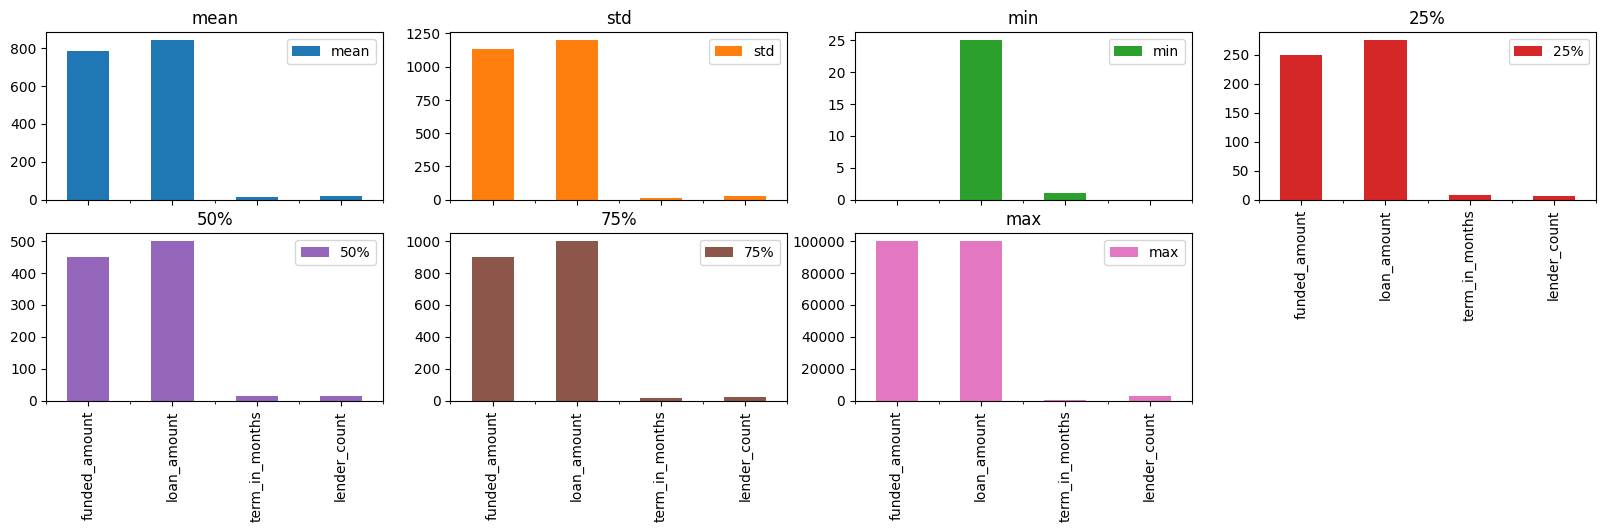

In [93]:
# Generate summary statistics and create a bar plot for selected numerical columns

# Select specific numerical columns ('funded_amount', 'loan_amount', 'term_in_months', 'lender_count') and calculate summary statistics
# Round the summary statistics to whole numbers for readability
# Transpose the summary statistics DataFrame to make columns represent each statistic (mean, std, min, 25%, 50%, 75%, max)
kiva_loans_copy[['funded_amount', 'loan_amount', 'term_in_months', 'lender_count']].describe().iloc[1:, :].round().T\
               .plot.bar(subplots=True, layout=(4, 4), figsize=(20, 10));# Create a bar plot with subplots layout, using a 4x4 grid, and specifying the figure size (20x10)

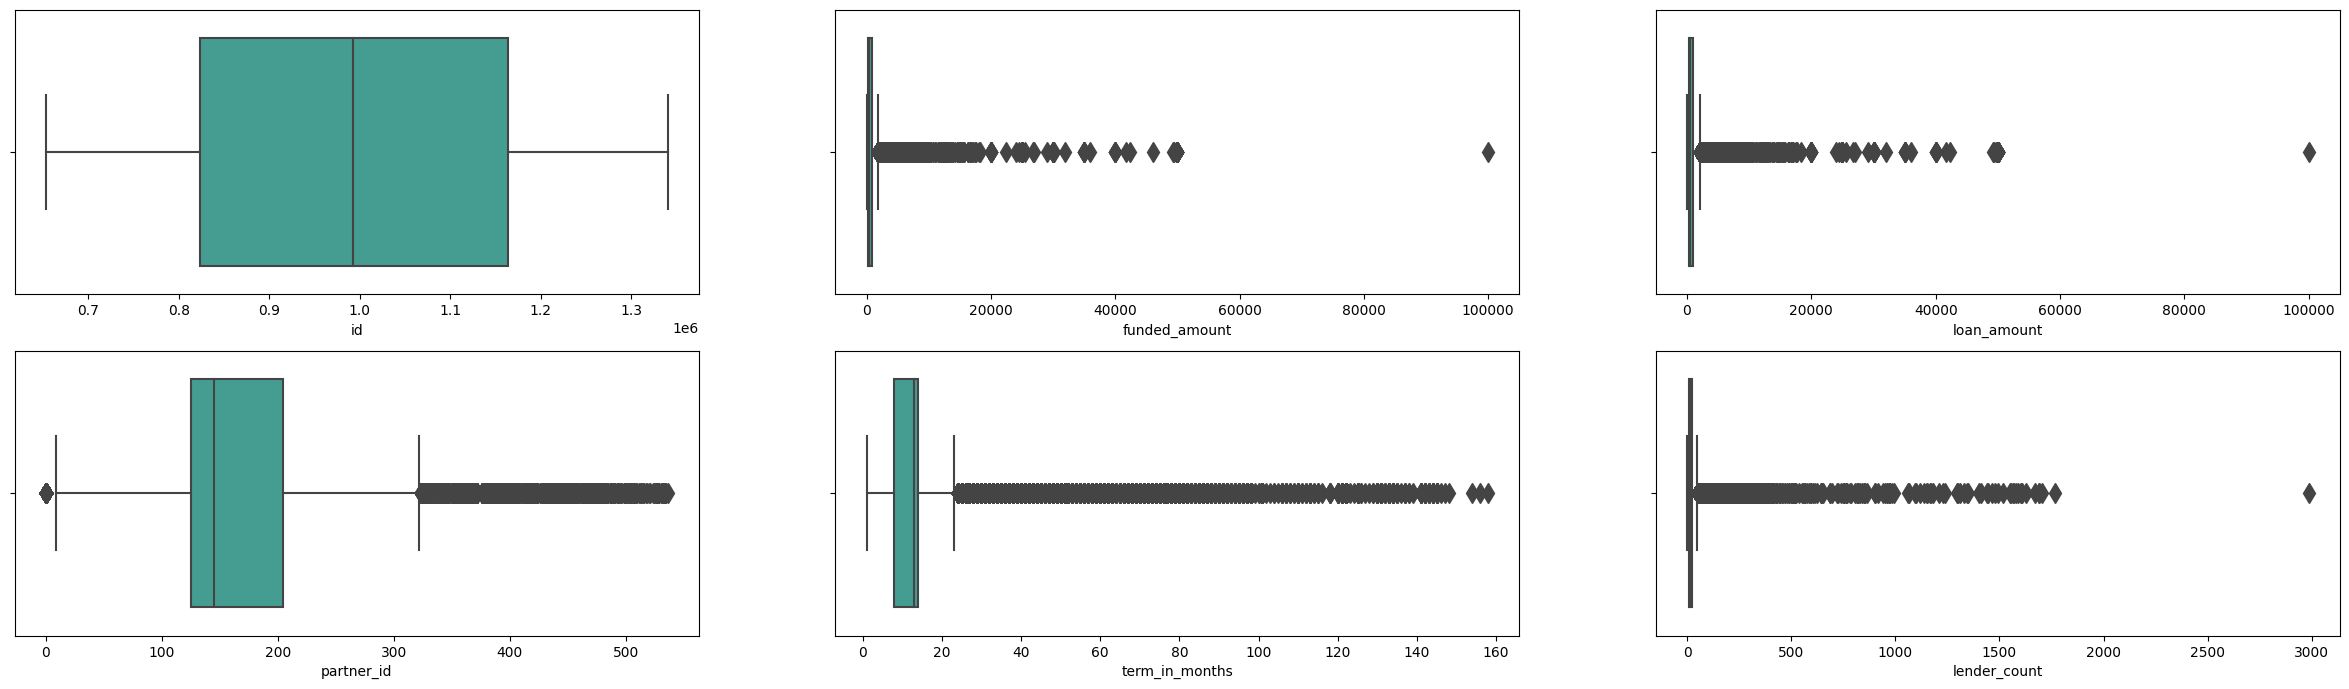

In [94]:
# Create a figure for multiple box plots

# Set the figure size to (30, 17) inches
fig = plt.figure(figsize=(30, 17))

# Iterate through numerical columns and create box plots for each
# Iterate over the numerical columns of the DataFrame
for n, col in enumerate(kiva_loans_copy.select_dtypes('number').columns):
    
    # Add a subplot to the figure with a 4x3 grid layout, incrementing 'n' for each column
    ax = fig.add_subplot(4, 3, n + 1)
    
    # Create a box plot for the current column, specifying the x-values and plot properties
    sns.boxplot(x=kiva_loans_copy[col], ax=ax, fliersize=10, color='#37AA9C')


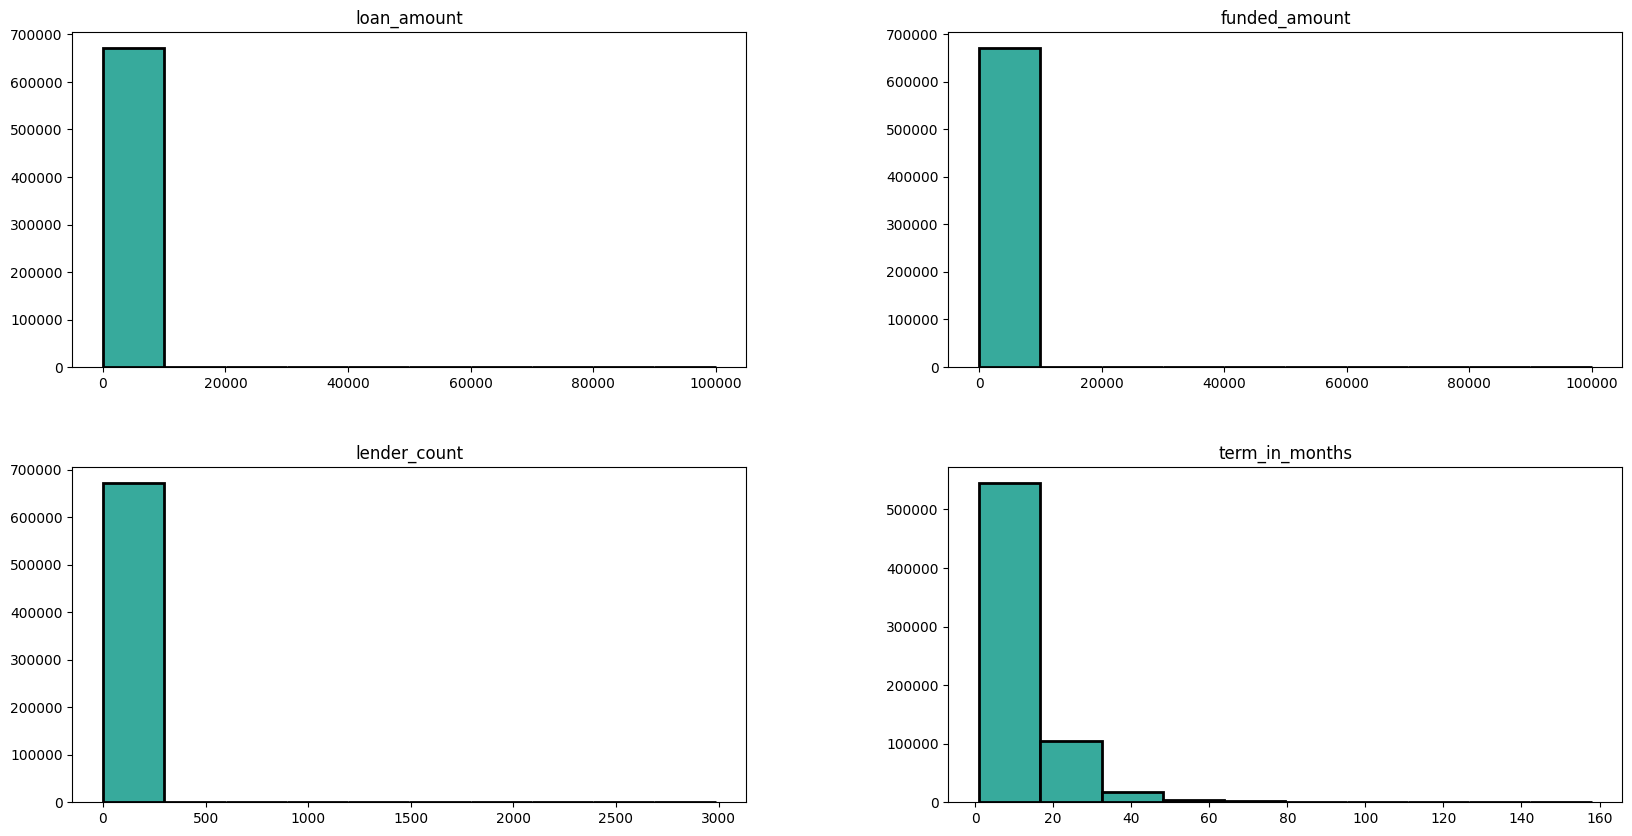

In [95]:
# Create histograms for selected numerical columns with outliers

# Select specific numerical columns ('loan_amount', 'funded_amount', 'lender_count', 'term_in_months') for visualization
# and create histograms to visualize their distributions

# Set the figure size to (20, 10) inches for the histograms
# Customize histogram appearance with edge color, line width, and fill color
# Disable grid lines in the histograms
kiva_loans_copy[['loan_amount','funded_amount','lender_count','term_in_months']].hist(
                                                                                    figsize=(20,10) ,
                                                                                    edgecolor="black" , 
                                                                                    linewidth=2 ,
                                                                                    color='#37AA9C' , 
                                                                                    grid=False);

In [96]:
def outliers(data):
    """
    Calculate the number and percentage of outliers in each numerical column of a DataFrame using the IQR method.

    Parameters:
    ----------
    data : pandas DataFrame
        The input DataFrame containing numerical columns for which outliers need to be detected.

    Returns:
    -------
    pandas DataFrame
        A DataFrame containing information about the number and percentage of outliers in each numerical column.
        It includes three columns: 'columns', 'num_outliers', and 'ratio_outliers'.

    Description:
    ------------
    The 'outliers' function utilizes the Interquartile Range (IQR) method to identify and quantify outliers
    in each numerical column of the input DataFrame 'data'. It provides valuable insights into data distribution
    and potential data quality issues.

    For each numerical column, the function calculates the IQR, lower bound, and upper bound. Data points
    outside the range of (Q1 - 1.5 * IQR) to (Q3 + 1.5 * IQR) are considered outliers, where Q1 and Q3
    represent the first and third quartiles, respectively.

    The function returns a summary DataFrame with the following columns:
    - 'columns': The names of the numerical columns.
    - 'num_outliers': The total number of outliers in the column.
    - 'ratio_outliers': The percentage of outliers relative to the total number of data points in the column.

    The resulting DataFrame is sorted in descending order of 'ratio_outliers,' making it easier to identify columns
    with a higher percentage of outliers.

    Note:
    -----
    This function is a useful tool for data exploration and preprocessing, enabling users to quickly assess
    the presence and extent of outliers in their numerical data.

    """

    # Create Dataframe to show the number of outliers for each column
    dic = {}

    # Loop through each numerical column
    for col in data.select_dtypes('number').columns:
        # Calculate the Interquartile Range (IQR)
        IQR = data[col].quantile(.75) - data[col].quantile(.25)

        # Calculate the lower and upper bounds for outliers
        lower = data[col].quantile(.25) - 1.5 * IQR
        upper = data[col].quantile(.75) + 1.5 * IQR

        # Count the number of outliers in the column
        num = data.loc[(data[col] < lower) | (data[col] > upper), col].count()

        # Calculate the percentage of outliers
        ratio = round((num / len(data)) * 100, 2)

        # Update the dictionary with outlier information for the current column
        dic.update({col: {'num_outliers': num, 'ratio_outliers': ratio}})

    # Create a DataFrame from the dictionary and sort it by 'ratio_outliers' in descending order
    return pd.DataFrame({'columns': dic.keys(),
                         'num_outliers': [values['num_outliers'] for values in dic.values()],
                         'ratio_outliers': [value['ratio_outliers'] for value in dic.values()]
                         }).sort_values(by='ratio_outliers', ascending=False).reset_index(drop=True)
outliers(kiva_loans_copy)

columns  num_outliers  ratio_outliers
0      partner_id         73560           10.96
1  term_in_months         65781            9.80
2   funded_amount         55112            8.21
3    lender_count         54128            8.06
4     loan_amount         50993            7.60
5              id             0            0.00

In [41]:
def remove_outliers(data, col):
    """
    Remove outliers from a specific numerical column in a DataFrame using the IQR method.

    Parameters:
    ----------
    data : pandas DataFrame
        The input DataFrame containing the data from which outliers should be removed.
    col : str
        The name of the numerical column for which outliers should be removed.

    Returns:
    -------
    pandas DataFrame
        A DataFrame with outliers removed from the specified column.

    Description:
    ------------
    The 'remove_outliers' function removes outliers from a specific numerical column in the input DataFrame 'data'
    using the Interquartile Range (IQR) method. It is useful for preprocessing data to improve statistical analysis.

    The function takes two parameters:
    - 'data': The input DataFrame containing the data.
    - 'col': The name of the numerical column from which outliers should be removed.

    Outliers are identified based on the IQR method, where data points outside the range (Q1 - 1.5 * IQR) to
    (Q3 + 1.5 * IQR) are considered outliers. Q1 and Q3 represent the first and third quartiles of the column, respectively.

    The function returns a DataFrame with outliers removed from the specified column, allowing for further analysis
    or visualization without the influence of extreme values.

    Note:
    -----
    Removing outliers should be done with caution, as it can affect the representativeness of the data.
    Users should consider the specific context of their analysis before applying outlier removal.
    """

    # Calculate the Interquartile Range (IQR)
    IQR = data[col].quantile(.75) - data[col].quantile(.25)

    # Calculate the lower and upper bounds for outliers
    lower = data[col].quantile(.25) - 1.5 * IQR
    upper = data[col].quantile(.75) + 1.5 * IQR

    # Filter the data to keep only non-outliers in the specified column
    data = data[(data[col] > lower) & (data[col] < upper)]

    # Return the cleaned DataFrame with outliers removed from the specified column
    return data


         
remove_outliers(kiva_loans_copy , 'loan_amount').head()

id  funded_amount  loan_amount             activity          sector  \
0  653051            300          300  Fruits & Vegetables            Food   
1  653053            575          575             Rickshaw  Transportation   
2  653068            150          150       Transportation  Transportation   
3  653063            200          200           Embroidery            Arts   
4  653084            400          400           Milk Sales            Food   

                                                 use country_code   country  \
0              To buy seasonal fresh fruits to sell            PK  Pakistan   
1  to repair and maintain the auto rickshaw used ...           PK  Pakistan   
2  To repair their old cyclevan and buy another o...           IN     India   
3  to purchase an embroidery machine and a variet...           PK  Pakistan   
4                            to purchase one buffalo           PK  Pakistan   

         region currency  partner_id         posted_time      disbursed_time  \
0        Lahore      PKR         247 2014-01-01 06:12:39 2013-12-17 08:00:00   
1        Lahore      PKR         247 2014-01-01 06:51:08 2013-12-17 08:00:00   
2     Maynaguri      INR         334 2014-01-01 09:58:07 2013-12-17 08:00:00   
3        Lahore      PKR         247 2014-01-01 08:03:11 2013-12-24 08:00:00   
4  Abdul Hakeem      PKR         245 2014-01-01 11:53:19 2013-12-17 08:00:00   

          funded_time  term_in_months  lender_count  \
0 2014-01-02 10:06:32              12            12   
1 2014-01-02 09:17:23              11            14   
2 2014-01-01 16:01:36              43             6   
3 2014-01-01 13:00:00              11             8   
4 2014-01-01 19:18:51              14            16   

                           tags borrower_genders repayment_interval       date  
0                 not specified           female          irregular 2014-01-01  
1                 not specified           female          irregular 2014-01-01  
2  user_favorite, user_favorite           female             bullet 2014-01-01  
3                 not specified           female          irregular 2014-01-01  
4                 not specified           female            monthly 2014-01-01

In [42]:
def remove_all_outliers(data):
    """
    Remove all outliers from a DataFrame based on the Interquartile Range (IQR) method.

    Parameters:
    ----------
    data : pandas DataFrame
        The input DataFrame containing the data from which outliers should be removed.

    Returns:
    -------
    pandas DataFrame
        A DataFrame with all outliers removed from numerical columns (excluding columns containing 'id' in their name).

    Description:
    ------------
    The 'remove_all_outliers' function identifies and removes all outliers from the numerical columns of the input
    DataFrame 'data' based on the Interquartile Range (IQR) method. It is designed to improve data quality and
    analysis by eliminating extreme values that fall outside the typical data distribution.

    The function performs the following steps:
    1. Identifies all numerical columns (excluding columns with 'id' in their name) to analyze for outliers.
    2. For each numerical column, it calculates the IQR, lower bound, and upper bound.
    3. Identifies and collects the indices of rows containing outliers in each column.
    4. Combines the outlier indices from all columns into a unique list.
    5. Removes rows with outlier indices from the original DataFrame, effectively removing all outliers.

    The resulting DataFrame contains the original data with all outliers removed from numerical columns.

    Note:
    -----
    Outlier removal can significantly impact the dataset's representativeness. Use this function with caution
    and consider the context of your analysis before applying it to your data.

    """

    # Create a list to store outlier indices for each numerical column
    outlier_list = []

    # Get a list of numerical columns (excluding columns with 'id' in their name)
    outliers_columns = [c for c in data.select_dtypes('number').columns if 'id' not in c]

    # Iterate through each numerical column
    for col in data.select_dtypes('number').columns:
        # Calculate the Interquartile Range (IQR) and bounds for outliers
        IQR = data[col].quantile(.75) - data[col].quantile(.25)
        lower = data[col].quantile(.25) - 1.5 * IQR
        upper = data[col].quantile(.75) + 1.5 * IQR

        # Identify and collect indices of rows containing outliers in the current column
        outliers = data[(data[col] < lower) | (data[col] > upper)].index.tolist()
        outlier_list.append(outliers)

    # Combine outlier indices from all columns into a unique list
    index_outliers = pd.Series([ii for i in outlier_list for ii in i]).unique().tolist()

    # Remove rows with outlier indices from the original DataFrame
    return data.drop(index_outliers, axis=0)

df_without_outliers = remove_all_outliers(kiva_loans_copy)

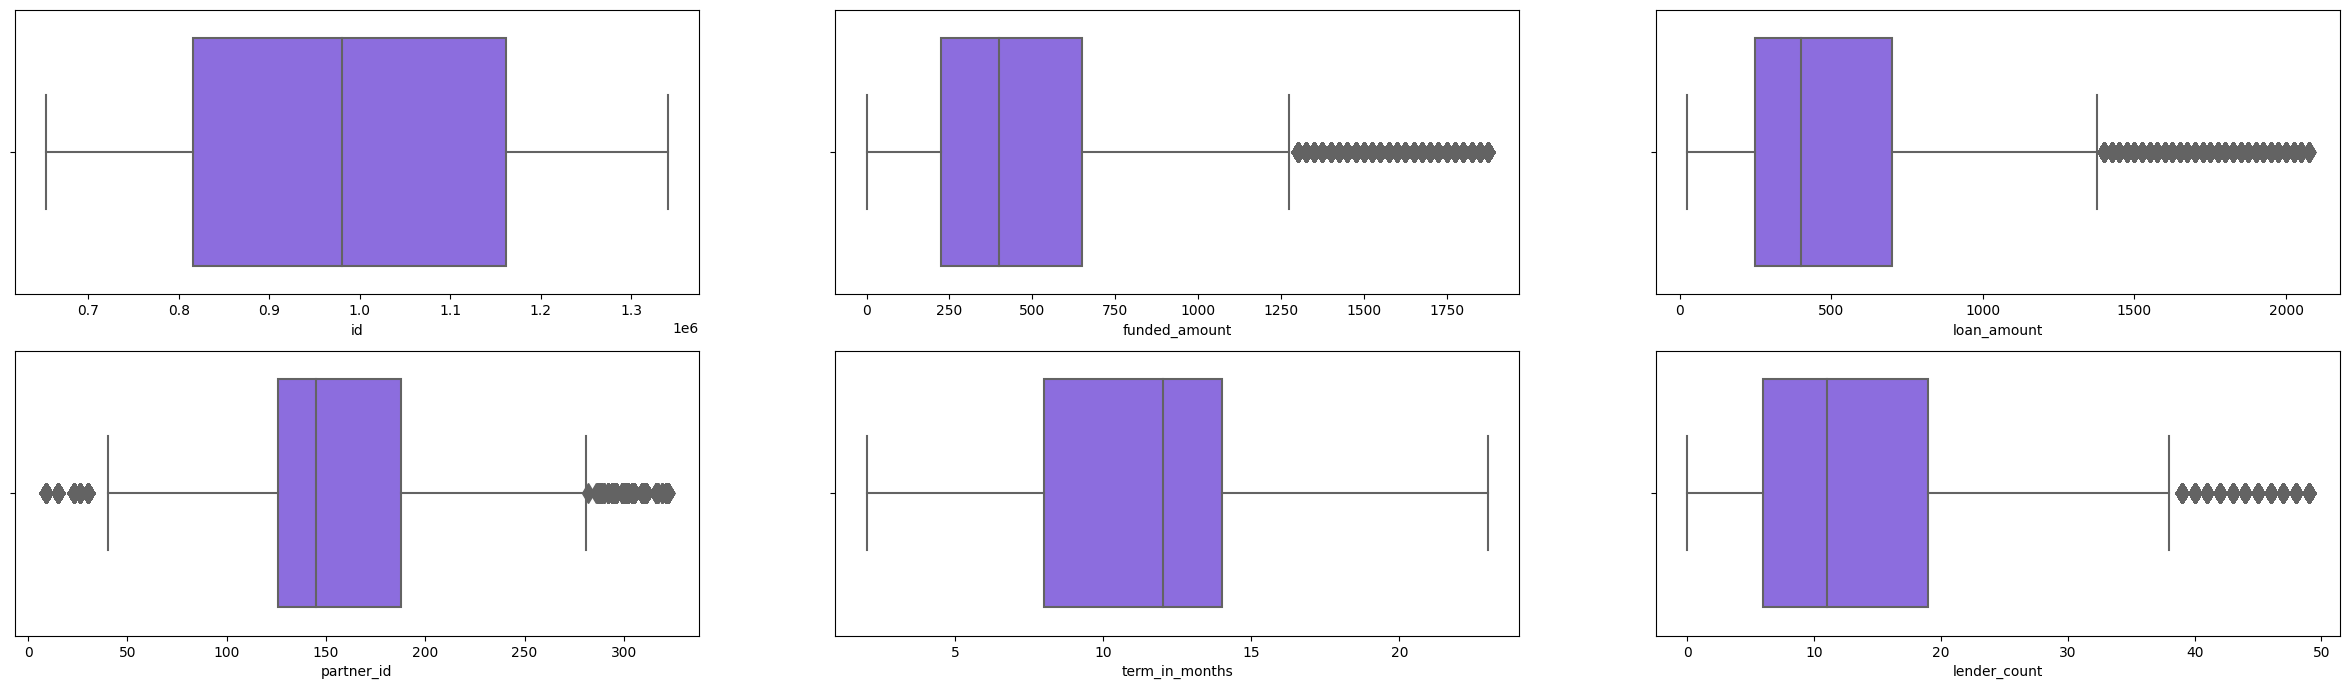

In [99]:
# Create a figure for multiple box plots

# Set the figure size to (30, 17) inches
fig = plt.figure(figsize=(30, 17))

# Iterate through numerical columns and create box plots for each
# Iterate over the numerical columns of the DataFrame
for n, col in enumerate(df_without_outliers.select_dtypes('number').columns):
    
    # Add a subplot to the figure with a 4x3 grid layout, incrementing 'n' for each column
    ax = fig.add_subplot(4, 3, n + 1)
    
    # Create a box plot for the current column, specifying the x-values and plot properties
    sns.boxplot(x=df_without_outliers[col], ax=ax, fliersize=10, color='#835AF1')

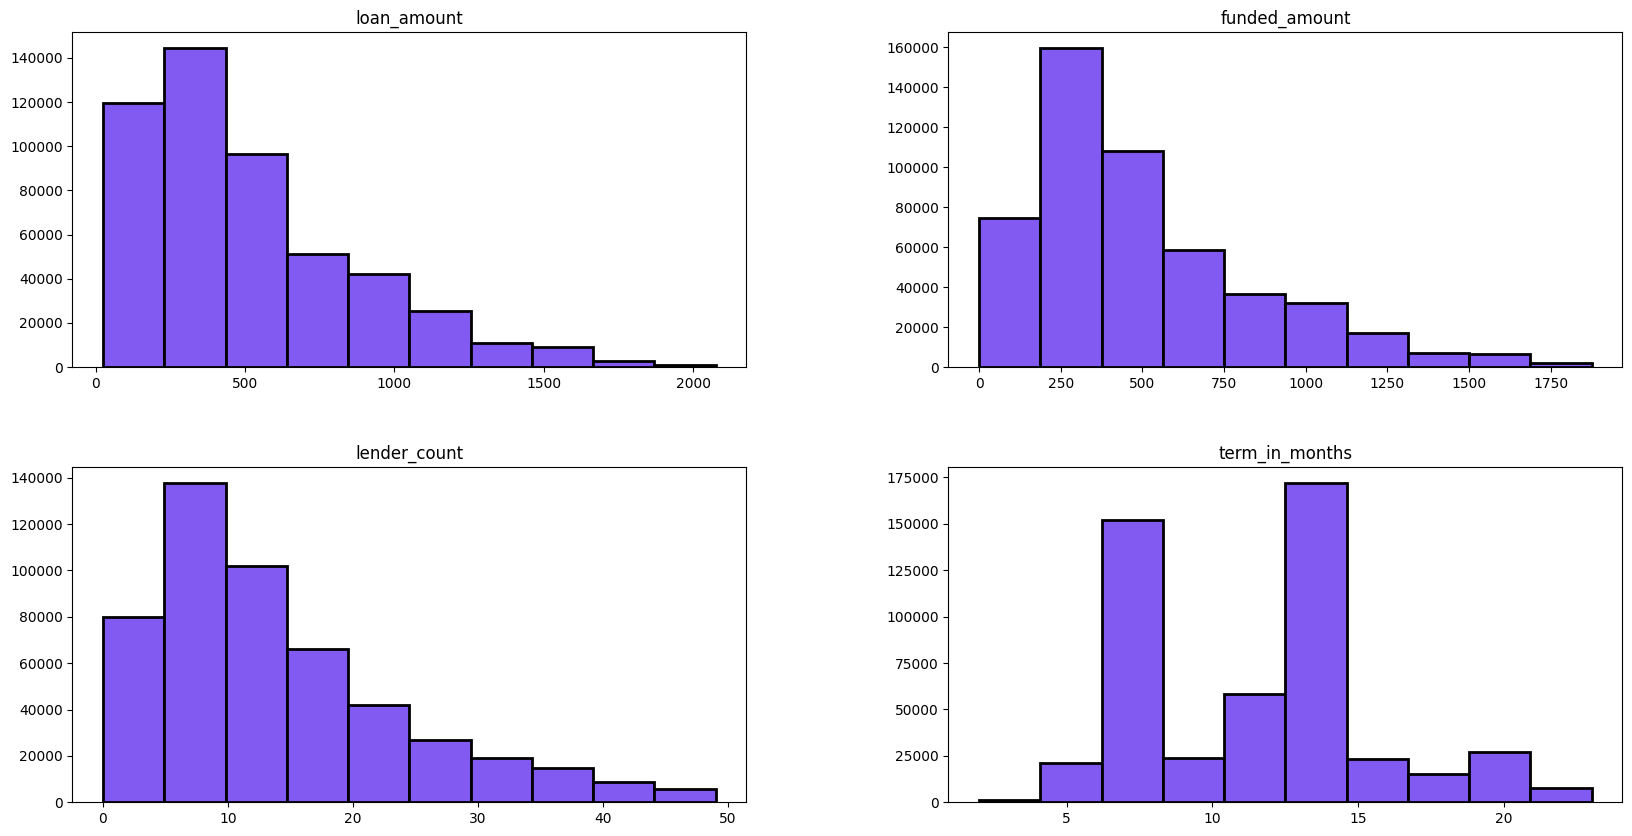

In [100]:
# Create histograms for selected numerical columns without outliers

# Select specific numerical columns ('loan_amount', 'funded_amount', 'lender_count', 'term_in_months') for visualization
# and create histograms to visualize their distributions

# Set the figure size to (20, 10) inches for the histograms
# Customize histogram appearance with edge color, line width, and fill color
# Disable grid lines in the histograms
df_without_outliers[['loan_amount', 'funded_amount', 'lender_count', 'term_in_months']].hist(
    figsize=(20, 10),
    edgecolor="black",
    linewidth=2,
    color='#835AF1',
    grid=False
);

In [56]:
# List of columns to be excluded from 'heatmaps_columns'
exclude_columns = ['id', 'funded_amount', 'loan_amount', 'partner_id', 'posted_time', 'disbursed_time',
                   'funded_time', 'term_in_months', 'lender_count', 'tags', 'use', 'date', 'Date']

# Create a list of columns for heatmap selection by filtering out excluded columns
xaxis_columns = [c for c in trend_df.columns if c not in exclude_columns]

# Open a file and write CSS code to it
with open('H:/CS50/Portfolio Projects/Kiva/assets/reset.css','w') as file:
        file.write('body{background-color:rgb(243, 243, 243);}\n')
        file.close()

# Define the CSS file path
dbc_css = "/assets/reset.css"

# Create a Dash web application instance
app_stats = JupyterDash(__name__,external_stylesheets=[dbc_css])

# Define the layout for the Dash web application
app_stats.layout = dmc.Container(
                                    fluid=True, # Allow the layout to adapt to different screen sizes
                                    children=[ # Create a hierarchy of Dash components
                                              dmc.Grid([
                                                        dmc.Col([
                                                                 dmc.Space(h=25),
                                                                 dmc.Switch(
                                                                            size="lg",
                                                                            radius="sm",
                                                                            label="Check To Remove Outliers",
                                                                            checked=True,
                                                                            onLabel="With",
                                                                            offLabel="Without",
                                                                            id='switch'
                                                                        )
                                                        ],span=3),
                                                        dmc.Col([
                                                                dmc.Select(
                                                                           label='Select Xaxis Column',
                                                                           value='day_name',
                                                                           data=[{'label':remove_underscore(c) ,'value':c}for c in xaxis_columns],
                                                                           id='xaxis'
                                                                )
                                                        ],span=4),
                                                        dmc.Col([
                                                                dmc.RadioGroup(
                                                                    [dmc.Radio(label=remove_underscore(c), value=c) for c in ['loan_amount', 'funded_amount', 'lender_count', 'term_in_months']],
                                                                    id="radiogroup",
                                                                    value="loan_amount",
                                                                    label="Select A Numerical Column",
                                                                    size="sm")
                                                        ],span=4,offset=1)
                                                        
                                                       ]),
                                             dmc.Space(h=10),          
                                             html.Hr(),
                                             dmc.Space(h=10),
                                             dmc.Grid([
                                                        dmc.Col([dcc.Graph(id='violin_chart')],span=8),
                                                        dmc.Col([dcc.Graph(id='hist_chart')],span=4),
                                                        dmc.Col([dcc.Graph(id='bar_chart')],span=12)
                                             ])
                                             ]
)
# Import necessary libraries and modules
@app_stats.callback(
        Output('violin_chart','figure'),
        Output('hist_chart','figure'),
        Output('bar_chart','figure'),
        Input('switch','checked'),
        Input('xaxis','value'),
        Input('radiogroup','value')
)
def violin_hist(switch,xaxis , num_column):
        # Check if the switch is turned on
        if switch:
            df = trend_df # Use the original DataFrame if the switch is on
        else:
            df = remove_outliers(trend_df , num_column)  # Remove outliers from the DataFrame if the switch is off
        
        # Create a DataFrame for bar chart
        df_bar = df.groupby(xaxis)[num_column].describe().round(2).reset_index()

        # Create a Violin Plot figure
        violin = go.Figure()

        # Add a Violin Trace for male borrowers
        violin.add_trace(go.Violin(x=df[df.borrower_genders == 'male'][xaxis],
                                y=df[df.borrower_genders == 'male'][num_column],
                                legendgroup='male', scalegroup='male', name='male',
                                side='negative',
                                line_color='lightseagreen')
                )
        # Add a Violin Trace for female borrowers
        violin.add_trace(go.Violin(x=df[df.borrower_genders == 'female'][xaxis],
                                y=df[df.borrower_genders == 'female'][num_column],
                                legendgroup='female', scalegroup='female', name='female',
                                side='positive',
                                line_color='mediumpurple')
                )
        # Update the Violin Plot with mean lines and layout settings
        violin.update_traces(meanline_visible=True)
        violin.update_layout(violingap=0, 
                             violinmode='overlay'
                             ,paper_bgcolor='rgb(243, 243, 243)',
                             plot_bgcolor='rgb(243, 243, 243)',
                             legend = {'orientation':'h','title':'','x':0.9,'y':1.1},
                             xaxis={'type':'category'},
                             height=600)
        # Create a Histogram figure
        hist = px.histogram(df , 
             df[num_column],
             color='borrower_genders',
             barmode='overlay',
             opacity=.75,
             color_discrete_sequence=['mediumpurple','lightseagreen'],
             height=600,
             labels={'count':'',num_column:remove_underscore(num_column)})\
             .update_layout(paper_bgcolor='rgb(243, 243, 243)',
                            plot_bgcolor='rgb(243, 243, 243)',
                            legend = {'orientation':'h','title':'','x':0.9,'y':1.1})
        
        # Create a Bar figure
        bar = px.bar(df_bar,
                        x=xaxis,
                        y=df_bar.columns[1:],
                        color_discrete_sequence=['slategray', 'lightgray','#333F44','#835AF1', '#37AA9C', '#94F3E4', '#7FA6EE', '#B8F7D4'],
                        labels={'value':'',xaxis:remove_underscore(xaxis)},
                        height=600,
                        )\
                        .update_traces(marker= dict(line_color = 'black'))\
                        .update_layout(paper_bgcolor='rgb(243, 243, 243)',
                                                plot_bgcolor='rgb(243, 243, 243)',
                                                legend = {'orientation':'h','title':'','x':0.7,'y':1.1},
                                                xaxis={'type':'category'})
        
        # Return the Violin and Histogram figures
        return violin , hist , bar


# Run the app if this script is the main entry point
if __name__ == '__main__':
        app_stats.run_server(mode='inline',debug=True)

In [102]:
# Calculate the set of unique countries in the 'country' column of the kiva_loans_copy DataFrame.
kiva_countries = set(kiva_loans_copy.country.unique())

# Calculate the set of unique countries in the 'country' column of the geo_df DataFrame.
geo_countries = set(geo_df.country.unique())

# Find the set of countries that exist in kiva_loans_copy but do not exist in geo_df.
# This is done by subtracting the geo_countries set from the kiva_countries set.
missing_countries = len(kiva_countries - geo_countries)

# Print the number of missing countries.
missing_countries

20

In [103]:
# Calculate the number of unique countries in the 'country' column of the 'kiva_loans_copy' DataFrame.
kiva_loans_copy.country.nunique() , geo_df.country.nunique()
# Calculate the number of unique countries in the 'country' column of the 'geo_df' DataFrame.

(87, 101)

In [45]:
# Group the 'kiva_loans_copy' DataFrame by the 'country' column, while resetting the index.
# Then, apply aggregation functions to calculate the sum of 'funded_amount', 'loan_amount', 'lender_count',
# and the count of unique 'id' values (renamed as 'total_loans').
countries_kiva = kiva_loans_copy.groupby('country', as_index=False).agg({
    'funded_amount': 'sum',       # Calculate the sum of funded amounts for each country
    'loan_amount': 'sum',         # Calculate the sum of loan amounts for each country
    'lender_count': 'sum',        # Calculate the sum of lender counts for each country
    'id': 'nunique'               # Calculate the count of unique loan IDs (renamed as 'total_loans')
}).rename(columns={'id': 'total_loans'})  # Rename the 'id' column to 'total_loans'

# The 'countries_kiva' DataFrame now contains aggregated information for each country,
# including the sum of funded amounts, loan amounts, lender counts, and the total number of loans.
countries_kiva

country  funded_amount  loan_amount  lender_count  total_loans
0      Afghanistan          14000        14000           512            2
1          Albania        2490000      2666500         82977         1934
2          Armenia       11186675     12915400        320556         8631
3       Azerbaijan        2699575      2888700         83099         1945
4           Belize         114025       114025          4184          125
..             ...            ...          ...           ...          ...
82         Vietnam       13661700     14891450        404151        10843
83  Virgin Islands              0        10000             0            2
84           Yemen        1784075      1879950         48316         2313
85          Zambia        1147950      1210675         36938          784
86        Zimbabwe        3372725      3447400        100752         4034

[87 rows x 5 columns]

In [46]:
# Group the 'geo_df' DataFrame by the 'country' column, while resetting the index.
# Then, apply aggregation functions to calculate the sum of 'MPI' and select the first values of other columns.
countries_stats = geo_df.groupby('country', as_index=False).agg({
    'MPI': 'sum',                                # Calculate the sum of Multidimensional Poverty Index (MPI) for each country
    'population': 'first',                       # Select the first value of population for each country
    'hdi': 'first',                              # Select the first value of Human Development Index (HDI) for each country
    'life_expectancy': 'first',                  # Select the first value of life expectancy for each country
    'expected_years_of_schooling': 'first',      # Select the first value of expected years of schooling for each country
    'mean_years_of_schooling': 'first',          # Select the first value of mean years of schooling for each country
    'gni': 'first'                               # Select the first value of Gross National Income (GNI) for each country
})

# The 'countries_stats' DataFrame now contains aggregated statistics for each country,
# including the sum of MPI, population, HDI, life expectancy, expected years of schooling,
# mean years of schooling, and GNI.
countries_stats

country     MPI  population       hdi  life_expectancy  \
0    Afghanistan  10.535  35530081.0  0.479375           60.704   
1        Albania   0.000   2930187.0  0.764174           77.968   
2        Algeria   0.000  41318142.0  0.744806           75.027   
3        Armenia   0.000   2930450.0  0.742850           74.886   
4     Azerbaijan   0.000   9827589.0  0.758528           70.896   
..           ...     ...         ...       ...              ...   
96       Vanuatu   0.000         0.0  0.000000            0.000   
97      Viet Nam   0.205         0.0  0.000000            0.000   
98         Yemen   4.745  28250420.0  0.482402           64.053   
99        Zambia   3.122  17094130.0  0.579070           60.819   
100     Zimbabwe   1.514  16529904.0  0.515640           59.200   

     expected_years_of_schooling  mean_years_of_schooling           gni  
0                      10.053750                 3.550000   1870.827131  
1                      14.179680                 9.646810  10252.469830  
2                      14.357780                 7.785367  13532.960780  
3                      12.713218                11.291050   8189.115193  
4                      12.650430                11.160000  16413.260330  
..                           ...                      ...           ...  
96                      0.000000                 0.000000      0.000000  
97                      0.000000                 0.000000      0.000000  
98                      8.989500                 3.000000   2300.272279  
99                     12.512300                 6.896000   3463.712718  
100                    10.314330                 7.734280   1587.723183  

[101 rows x 8 columns]

In [47]:
# Merge the 'countries_kiva' DataFrame and the 'countries_stats' DataFrame based on the 'country' column.
# This is a left join, meaning all rows from 'countries_kiva' will be included, and matching rows from 'countries_stats' will be added.
correlations = countries_kiva.merge(countries_stats, on='country', how='left')

# The resulting 'correlations' DataFrame now contains data from both 'countries_kiva' and 'countries_stats' merged together based on the 'country' column.
correlations

country  funded_amount  loan_amount  lender_count  total_loans  \
0      Afghanistan          14000        14000           512            2   
1          Albania        2490000      2666500         82977         1934   
2          Armenia       11186675     12915400        320556         8631   
3       Azerbaijan        2699575      2888700         83099         1945   
4           Belize         114025       114025          4184          125   
..             ...            ...          ...           ...          ...   
82         Vietnam       13661700     14891450        404151        10843   
83  Virgin Islands              0        10000             0            2   
84           Yemen        1784075      1879950         48316         2313   
85          Zambia        1147950      1210675         36938          784   
86        Zimbabwe        3372725      3447400        100752         4034   

       MPI  population       hdi  life_expectancy  \
0   10.535  35530081.0  0.479375           60.704   
1    0.000   2930187.0  0.764174           77.968   
2    0.000   2930450.0  0.742850           74.886   
3    0.000   9827589.0  0.758528           70.896   
4    0.141    374681.0  0.706195           70.076   
..     ...         ...       ...              ...   
82     NaN         NaN       NaN              NaN   
83     NaN         NaN       NaN              NaN   
84   4.745  28250420.0  0.482402           64.053   
85   3.122  17094130.0  0.579070           60.819   
86   1.514  16529904.0  0.515640           59.200   

    expected_years_of_schooling  mean_years_of_schooling           gni  
0                     10.053750                  3.55000   1870.827131  
1                     14.179680                  9.64681  10252.469830  
2                     12.713218                 11.29105   8189.115193  
3                     12.650430                 11.16000  16413.260330  
4                     12.769070                 10.47000   7374.814544  
..                          ...                      ...           ...  
82                          NaN                      NaN           NaN  
83                          NaN                      NaN           NaN  
84                     8.989500                  3.00000   2300.272279  
85                    12.512300                  6.89600   3463.712718  
86                    10.314330                  7.73428   1587.723183  

[87 rows x 12 columns]

In [48]:
# Use the 'str.replace()' method to replace underscores ('_') with spaces (' ') in column names of the 'correlations' DataFrame.
correlations.columns = correlations.columns.str.replace('_', ' ')

# After executing this line of code, the column names in the 'correlations' DataFrame will have underscores replaced by spaces.
# For example, if you had a column named 'loan_amount' with underscores, it will become 'loan amount'.
correlations.columns

Index(['country', 'funded amount', 'loan amount', 'lender count',
       'total loans', 'MPI', 'population', 'hdi', 'life expectancy',
       'expected years of schooling', 'mean years of schooling', 'gni'],
      dtype='object')

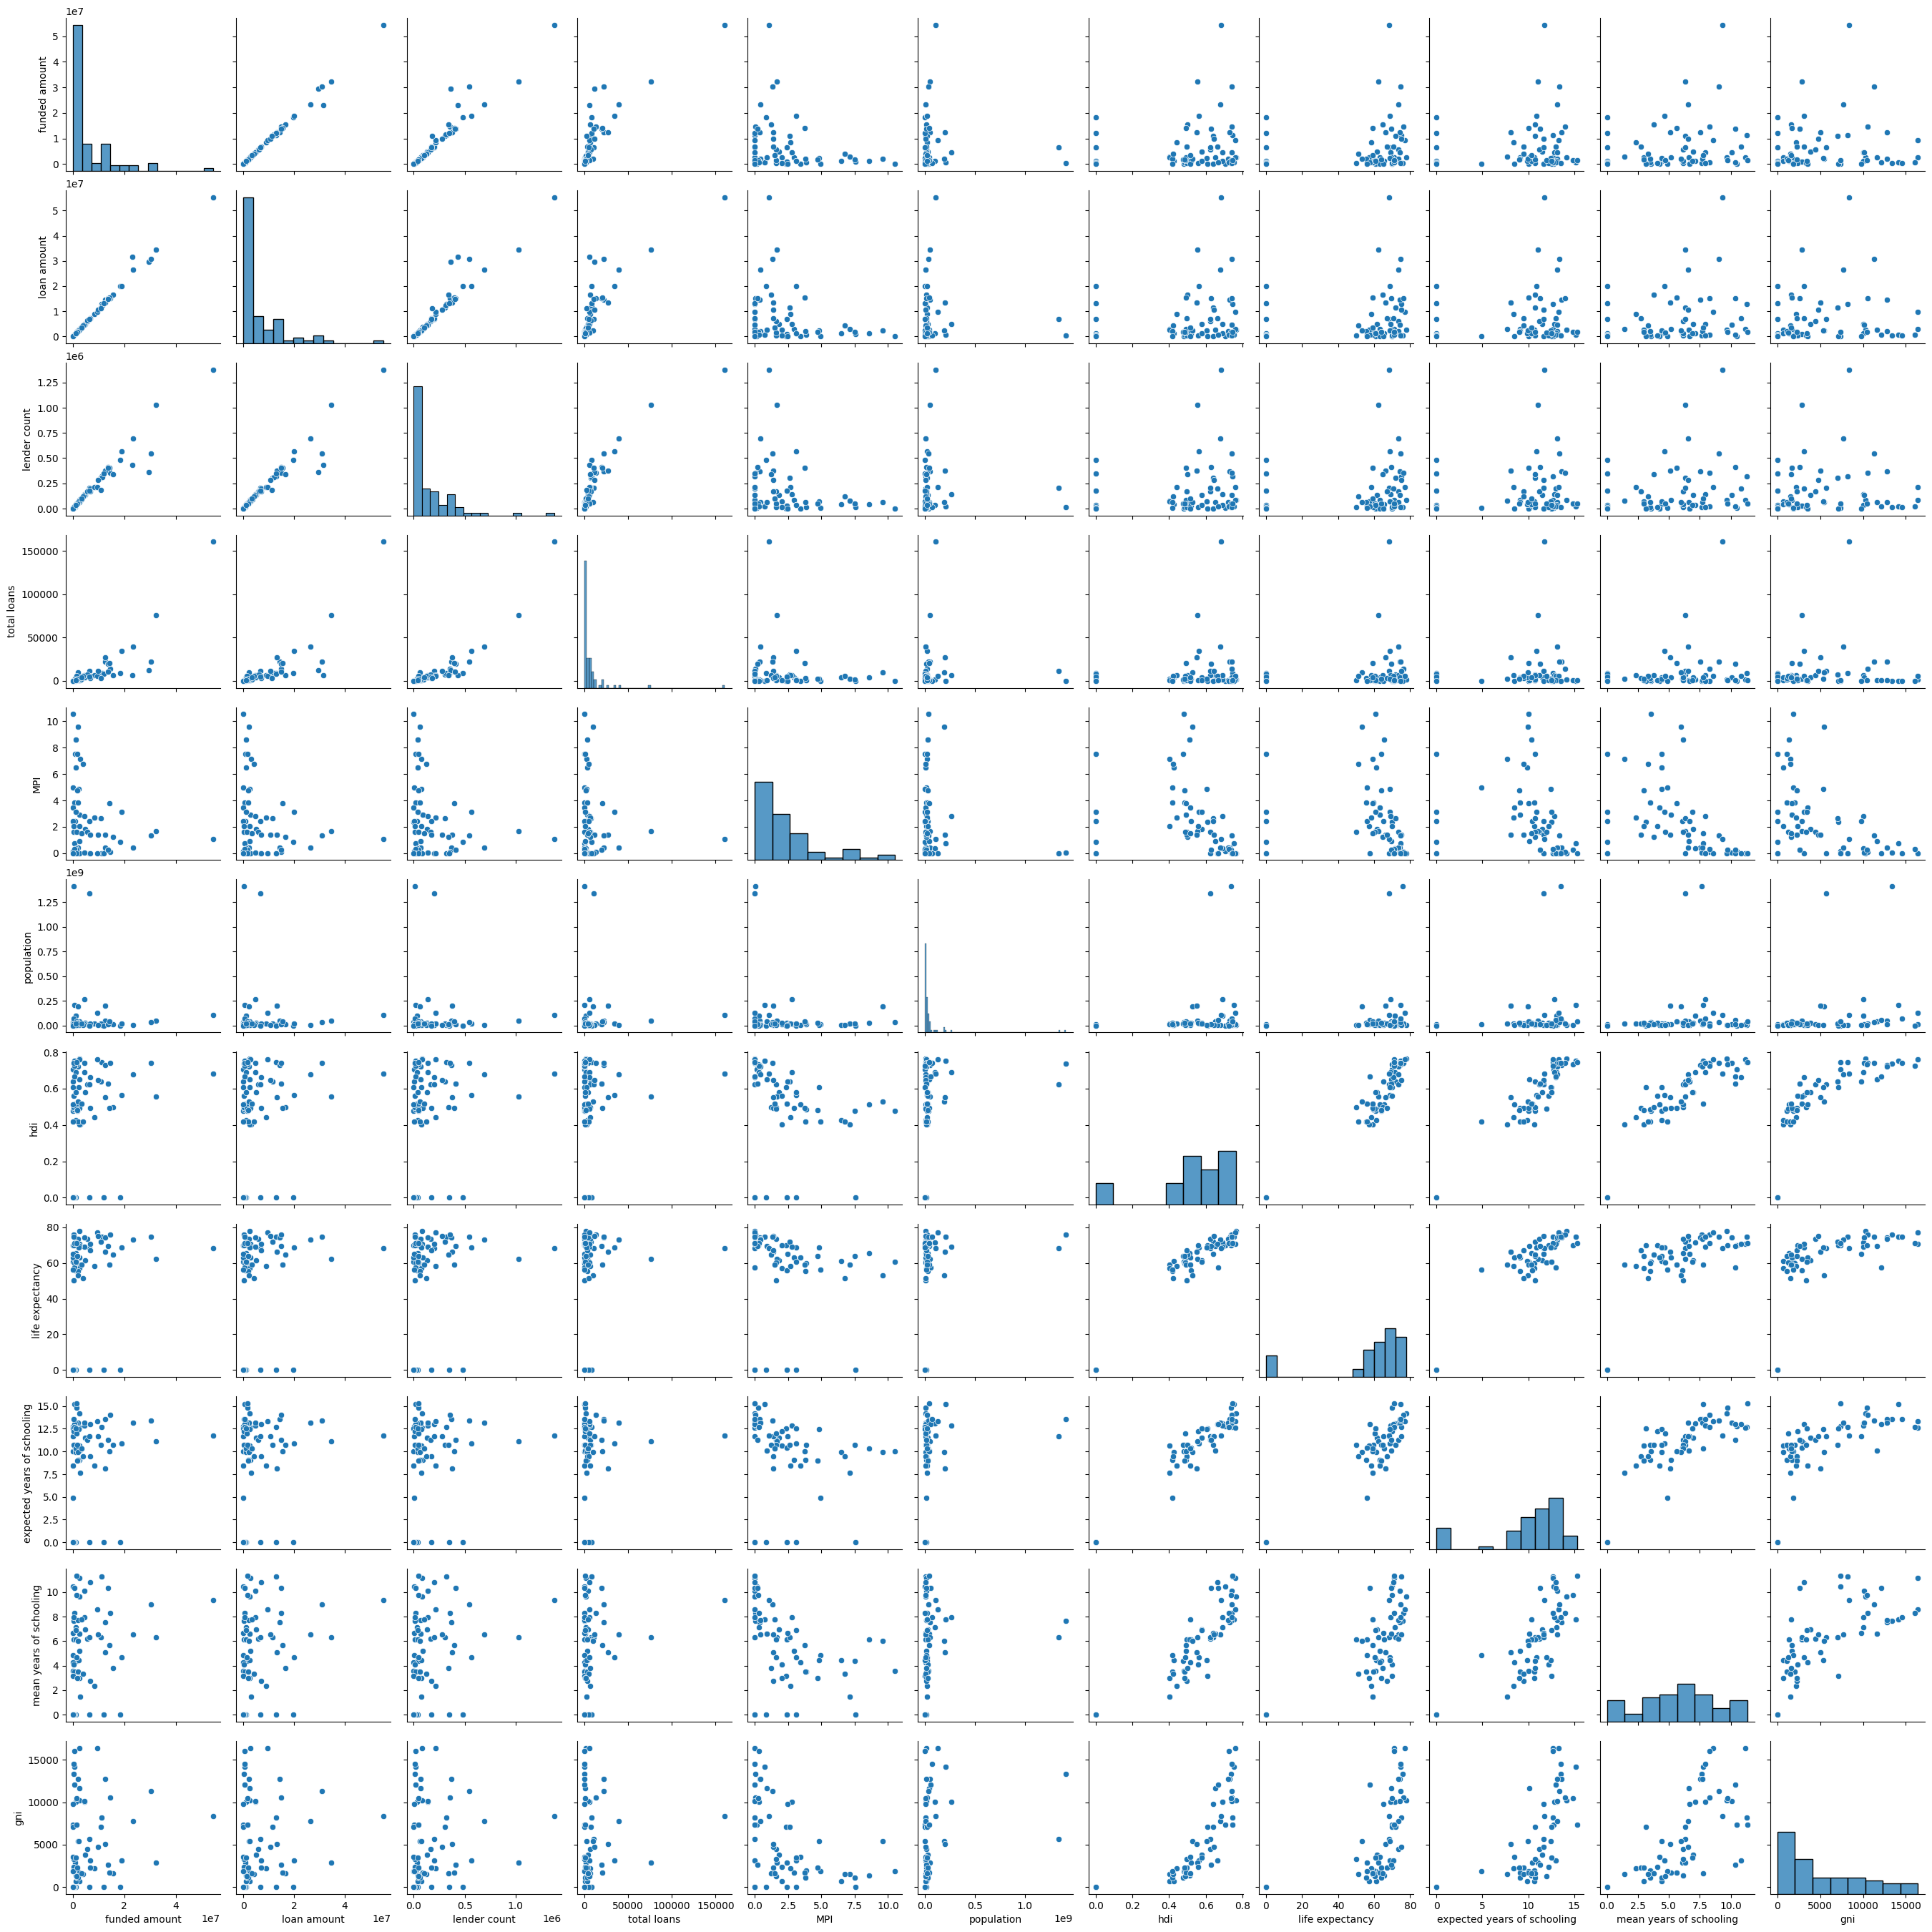

In [108]:
# Create a pair plot using the 'correlations' DataFrame
sns.pairplot(correlations)

In [50]:
# Open a file and write CSS code to it
with open('H:/CS50/Portfolio Projects/Kiva/assets/reset.css','w') as file:
        file.write('body{background-color:white;}\n')
        file.close()

# Define the CSS file path
dbc_css = "/assets/reset.css"

# Create a Dash web application instance
app_corr = JupyterDash(__name__,external_stylesheets=[dbc_css])

# Define the layout for the Dash web application using dmc.Container
app_corr.layout = dmc.Container(
                                fluid=True, # Allow the container to adapt to the screen width
                                children=[ # List of child components within the container
                                        dmc.Grid([ # Create a grid layout
                                                dmc.Col([ 
                                                        # Define the first column
                                                         html.P(html.Span('Select X Column',style={'color':'black'})), # Header text
                                                         # Dropdown component for selecting the X column
                                                         dcc.Dropdown( 
                                                                    id='x', # Unique identifier for this dropdown
                                                                    optionHeight=50, # Set the option height
                                                                    options=(correlations.columns[1:]), # List of available options (assumes excluding the first column)
                                                                    value='MPI' # Default value for the dropdown
                                                                    ) 
                                                        ],span=6), # Assign this column 6 out of 12 available columns in the grid
                                                dmc.Col([ # Define the second column
                                                         html.P(html.Span('Select Y Column',style={'color':'black'})), # Header text
                                                         # Dropdown component for selecting the Y column
                                                         dcc.Dropdown(
                                                                    id='y', # Unique identifier for this dropdown
                                                                    optionHeight=50, # Set the option height
                                                                    options=(correlations.columns[1:]), # List of available options (assumes excluding the first column)
                                                                    value='loan amount' # Default value for the dropdown
                                                                    )
                                                        ],span=6) # Assign this column 6 out of 12 available columns in the grid
                                                  ]),
                                                dmc.Space(h=20),
                                        dmc.Grid([
                                                dmc.Col([dcc.Graph(id='scatter')],span=6),
                                                dmc.Col([dcc.Graph(id='corrheatmap')],span=6)
                                               ])
                                                
                                ]
)
@app_corr.callback(
                Output('scatter','figure'),
                Output('corrheatmap','figure'),
                Input('x','value'),
                Input('y','value')
)
def plot_graghs(x,y):

        # Create a scatter plot using Plotly Express
        scatter_plot = px.scatter(
                                correlations,            # DataFrame to use for plotting
                                x=x,                 # X-axis variable
                                y=y,         # Y-axis variable
                                marginal_x='box',        # Display a box plot along the X-axis
                                marginal_y='violin',     # Display a violin plot along the Y-axis
                                trendline='ols',         # Add an Ordinary Least Squares (OLS) trendline
                                hover_data=['country'],  # Display 'country' as hover data
                                title=f'<b>{x} Vs. {y} by Countries</b>',  # Set the plot title
                                height=750,              # Set the height of the plot
                                template='plotly_white',  # Use the 'plotly_white' template for the plot
                                color_discrete_sequence=['#333F44']  # Define a custom color for the plot points
                                )

        # Update the layout of the plot, including the title position and font style
        scatter_plot.update_layout(
                                title={'x': 0.5, 'font_family': 'Raleway', 'font_size': 25}  # Set title position and font style
                                )

       
        # Calculate the correlation matrix and round to two decimal places
        correlation_matrix = correlations.corr().round(2)

        # Create a correlation heatmap using Plotly Express
        heatmap = px.imshow(
                        correlation_matrix,                           # Correlation matrix as the data source
                        height=750,                                   # Set the height of the plot
                        text_auto=True,                               # Automatically display correlation values as text
                        template='plotly_white',                      # Use the 'plotly_white' template
                        color_continuous_scale=px.colors.sequential.Greys,  # Choose a grayscale color scale
                        color_continuous_midpoint=0,                  # Set the midpoint of the color scale to 0
                        aspect='auto'                                 # Automatically adjust the aspect ratio
                        )

        # Update the layout of the plot
        heatmap.update_layout(
                        xaxis={'tickangle': -30, 'tickfont_color': 'black', 'tickfont_size': 15},  # Customize the X-axis
                        yaxis={'tickfont_color': 'black'},                                         # Customize the Y-axis
                        title={'text': 'Correlations for Each Column', 'x': 0.5, 'font_family': 'Raleway', 'font_size': 25}  # Set the title
                        )


        return scatter_plot , heatmap

if __name__ == '__main__':
        app_corr.run_server(mode='inline')

C:\Users\bhr\AppData\Local\Temp\ipykernel_12756\296304007.py:77: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



----

|Connect With MYSQL
---

In [33]:
# Import the 'pymysql' library to work with MySQL databases
import pymysql

# Establish a connection to the MySQL database
# - 'host' specifies the hostname or IP address of the MySQL server.
# - 'database' specifies the name of the database you want to connect to.
# - 'user' specifies the MySQL user's username.
# - 'password' specifies the MySQL user's password.
conn = pymysql.connect(
                host='localhost',     # Replace with the actual hostname or IP address of your MySQL server.
                user='sayed',         # Replace with the MySQL username.
                password='01554468200'  # Replace with the MySQL user's password.
)

# Create a cursor object for executing SQL queries on the database
cursor = conn.cursor()

# using the provided username and password. It then creates a cursor object for interaction with the database.
# You can use the 'cursor' object to execute SQL queries on the connected database.

In [34]:
# Execute SQL query to create a new database named 'Kiva'
cursor.execute('CREATE DATABASE IF NOT EXISTS Kiva;')

# Switch to the 'Kiva' database for subsequent operations
cursor.execute('USE Kiva;')

0

In [35]:
# Execute SQL query to create a table named 'kiva_loans' within the 'Kiva' database
cursor.execute("""CREATE TABLE IF NOT EXISTS kiva_loans(
                            id BIGINT UNIQUE NOT NULL,
                            funded_amount BIGINT NOT NULL ,
                            loan_amount BIGINT NOT NULL ,
                            activity VARCHAR(255) NOT NULL,
                            sector VARCHAR(255) NOT NULL,
                            used LONGTEXT NOT NULL,
                            country_code CHAR(5) NOT NULL,
                            country VARCHAR(255) NOT NULL,
                            region VARCHAR(255) NOT NULL,
                            currency CHAR(5) NOT NULL,
                            partner_id BIGINT NOT NULL,
                            posted_time DATETIME,
                            disbursed_time DATETIME,
                            funded_time DATETIME,
                            term_in_months INT NOT NULL,
                            lender_count INT NOT NULL,
                            tags VARCHAR(255) NOT NULL,
                            borrower_genders enum('male','female') NOT NULL,
                            repayment_interval VARCHAR(255) NOT NULL,
                            date DATE NOT NULL,
                            PRIMARY KEY (id)
                                    );"""
               )

0

In [36]:
# Execute SQL query to create a table named 'geo_df' within the 'Kiva' database
cursor.execute("""CREATE TABLE IF NOT EXISTS geo_df(
                            LocationName VARCHAR(255) NOT NULL,
                            ISO CHAR(5) NOT NULL,
                            country VARCHAR(255) NOT NULL,
                            region_location VARCHAR(255) NOT NULL,
                            world_region VARCHAR(255) NOT NULL,
                            MPI DECIMAL(4,3) NOT NULL,
                            lat FLOAT NOT NULL,
                            lon FLOAT NOT NULL,
                            continent VARCHAR(255) NOT NULL,
                            population BIGINT NOT NULL,
                            population_below_poverty_line DECIMAL(3,1) NOT NULL,
                            hdi FLOAT NOT NULL,
                            life_expectancy DECIMAL(5,3) NOT NULL,
                            expected_years_of_schooling DECIMAL(7,5) NOT NULL,
                            mean_years_of_schooling FLOAT NOT NULL,
                            gni DECIMAL(12,6) NOT NULL,
                            kiva_country_name VARCHAR(255) NOT NULL
                );"""
               )

0

In [37]:
# Execute SQL query to create a table named 'theme_region' within the 'Kiva' database
cursor.execute("""CREATE TABLE IF NOT EXISTS theme_region(
                            Partner_ID INT NOT NULL,
                            Field_Partner_Name VARCHAR(255) NOT NULL,
                            sector VARCHAR(255) NOT NULL,
                            Loan_Theme_ID VARCHAR(255) NOT NULL,
                            Loan_Theme_Type VARCHAR(255) NOT NULL,
                            country VARCHAR(255) NOT NULL,
                            forkiva ENUM('Yes','No') NOT NULL,
                            region VARCHAR(255) NOT NULL,
                            ISO CHAR(5) NOT NULL,
                            number BIGINT NOT NULL,
                            amount BIGINT NOT NULL,
                            LocationName VARCHAR(255) NOT NULL,
                            names VARCHAR(255) NOT NULL,
                            lat FLOAT NOT NULL,
                            lon FLOAT NOT NULL,
                            mpi_region VARCHAR(255) NOT NULL,
                            rural_pct FLOAT NOT NULL
                );"""
               )

0

In [38]:
# Execute SQL query to create a table named 'df_date' within the 'Kiva' database
cursor.execute("""CREATE TABLE IF NOT EXISTS df_date(
                            Date DATE NOT NULL,
                            month SMALLINT NOT NULL,
                            month_name CHAR(20) NOT NULL,
                            day SMALLINT NOT NULL,
                            day_name CHAR(20) NOT NULL,
                            quarter SMALLINT NOT NULL,
                            weekofyear SMALLINT NOT NULL,
                            day_of_week SMALLINT NOT NULL,
                            dayofyear INT NOT NULL ,
                            year_quarter VARCHAR(20) NOT NULL,
                            year_month_ VARCHAR(20) NOT NULL,
                            year_month_dayweek VARCHAR(20) NOT NULL,
                            year_month_weekyear VARCHAR(20) NOT NULL,
                            month_day VARCHAR(20) NOT NULL
                );"""
               )

0

In [39]:
def insert_values(data, table_name):
    """
    Inserts data into a specified database table.

    Args:
        data (DataFrame): The data to be inserted into the database table.
        table_name (str): The name of the database table where the data will be inserted.

    Returns:
        str: An SQL INSERT query string that can be used to insert the data into the specified table.

    This function takes a pandas DataFrame containing the data to be inserted into a database table and the name
    of the table. It constructs and returns an SQL INSERT query string that can be used to insert the data into
    the specified table.

    The function handles missing values (NaN) by replacing them with the string 'Null' in the query.

    Example:
        >>> data = pd.DataFrame({'name': ['Alice', 'Bob', 'Charlie'],
                             'age': [25, None, 30]})
        >>> table_name = 'person'

        >>> insert_query = insert_values(data, table_name)
        # insert_query will be something like:
        # 'INSERT INTO person VALUES ("Alice", 25), ("Bob", Null), ("Charlie", 30);'
    """
    # Replace missing values (NaN) with the string 'Null' in the entire DataFrame
    data = data.fillna('Null')
    # Initialize a list to store all the values for insertion
    all_values = []

    # Iterate through the rows of the DataFrame
    for _, row in data.iterrows():
        # Initialize a list to store the values for the current row
        row_values = []

        # Iterate through the columns of the DataFrame
        for col in data.columns:
            # Retrieve the value from the DataFrame
            value = row[col]

            # Check if the value is a string
            if col in data.select_dtypes(exclude='number').columns.tolist():
                
                # Check if the value contains a missing value (NaN)
                if value == 'Null':

                    row_values.append(f'{value}')

                else:

                    # Add the string value to the row_values list with appropriate formatting
                    row_values.append(f'"{value}"')

            else:
                # Add the numeric or 'Null' value to the row_values list
                row_values.append(str(value))

        # Join the row values and enclose them in parentheses
        all_values.append('(' + ', '.join(row_values) + ')')


    # Construct the final INSERT query by joining all the values and adding a semicolon at the end
    insert_query = f'INSERT INTO {table_name} VALUES {", ".join(all_values)} ;'

    # Return the completed INSERT query
    return insert_query

In [40]:
# Execute a SQL INSERT operation using a cursor object.
# The 'insert_values' function is assumed to be defined elsewhere in the code,
# and it inserts data from 'kiva_loans[:5000]' into the 'kiva_loans' table.

cursor.execute(insert_values(kiva_loans[:5000], 'kiva_loans')) # take a sample because it is huge data and going to take a long time to run

# Commit the changes to the database.
# This ensures that the inserted data is permanently saved in the database.

conn.commit()

In [41]:
# Execute a SQL INSERT operation using a cursor object.
# The 'insert_values' function is assumed to be defined elsewhere in the code,
# and it inserts data from the 'geo_df' DataFrame into a database table named 'geo_df'.

cursor.execute(insert_values(geo_df, 'geo_df'))

# Commit the changes to the database.
# This ensures that the inserted data from the 'geo_df' DataFrame is permanently saved in the database.

conn.commit()

In [42]:
# Execute a SQL INSERT operation using a cursor object.
# The 'insert_values' function is assumed to be defined elsewhere in the code,
# and it inserts data from the 'loan_theme' DataFrame into a database table named 'loan_theme'.

cursor.execute(insert_values(theme_region, 'theme_region'))

# Commit the changes to the database.
# This ensures that the inserted data from the 'loan_theme' DataFrame is permanently saved in the database.

conn.commit()

In [43]:
# Execute a SQL INSERT operation using a cursor object.
# The 'insert_values' function is assumed to be defined elsewhere in the code,
# and it inserts data from the 'df_date' DataFrame into a database table named 'df_date'.

cursor.execute(insert_values(df_date, 'df_date'))

# Commit the changes to the database.
# This ensures that the inserted data from the 'df_date' DataFrame is permanently saved in the database.

conn.commit()

In [44]:
# If you want to retrieve any table from the database in Pandas data frame just use this function
import mysql.connector

def get_table(schema_name, table_name):
    """
    Retrieve data from a MySQL table and return it as a Pandas DataFrame.

    Args:
        schema_name (str): The name of the MySQL schema or database where the table is located.
        table_name (str): The name of the table from which to retrieve data.

    Returns:
        pd.DataFrame: A Pandas DataFrame containing the data from the specified table.

    Raises:
        mysql.connector.Error: If there is an issue with the MySQL connection.

    Example:
        To retrieve data from a table named 'my_table' in a schema 'my_schema', use:
        >>> df = get_table('my_schema', 'my_table')
    """
    # Establish a connection to the MySQL database.
    connection = mysql.connector.connect(
        host='localhost',
        user='sayed',
        password='01554468200',
        database=f'{schema_name}'
    )

    # Use Pandas to execute a SQL query and retrieve data from the specified table.
    table_data = pd.read_sql_query(f'SELECT * FROM {table_name};', connection)

    # Close the database connection to release resources.
    connection.close()

    # Return the retrieved data as a Pandas DataFrame.
    return table_data

In [45]:
get_table('Kiva','kiva_loans')

C:\Users\bhr\AppData\Local\Temp\ipykernel_10824\1521845837.py:31: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  table_data = pd.read_sql_query(f'SELECT * FROM {table_name};', connection)


id  funded_amount  loan_amount                 activity  \
0      653047           2225         2225  Personal Products Sales   
1      653048            625          625    Food Production/Sales   
2      653049            250          250               Shoe Sales   
3      653050            575          575           Clothing Sales   
4      653051            300          300      Fruits & Vegetables   
...       ...            ...          ...                      ...   
4995  1080272            250          250                 Clothing   
4996  1080273            125          125            Grocery Store   
4997  1080275              0         5000    Food Production/Sales   
4998  1080276           5000         5000               Restaurant   
4999  1080278           5000         5000              Agriculture   

           sector                                               used  \
0          Retail                           to buy hair oils to sell   
1            Food  to buy a stall gram flour ketchup and coal for...   
2          Retail                       To buy womens shoes to sell    
3        Clothing                     To buy winter clothing to sell   
4            Food              To buy seasonal fresh fruits to sell    
...           ...                                                ...   
4995     Clothing                   purchase more stock for my store   
4996         Food  increase my vegetable and charcoal supply by 6...   
4997         Food             grow and create new jobs in my company   
4998         Food  purchase coolers refrigeration and other infra...   
4999  Agriculture  purchase timely soil delivery to ensure a bump...   

     country_code        country         region currency  partner_id  \
0              PK       Pakistan         Lahore      PKR         247   
1              PK       Pakistan         Lahore      PKR         247   
2              PK       Pakistan         Lahore      PKR         247   
3              PK       Pakistan         Lahore      PKR         247   
4              PK       Pakistan         Lahore      PKR         247   
...           ...            ...            ...      ...         ...   
4995           KE          Kenya  not specified      KES           0   
4996           KE          Kenya  not specified      KES           0   
4997           US  United States  not specified      USD           0   
4998           US  United States  not specified      USD           0   
4999           US  United States  not specified      USD           0   

             posted_time      disbursed_time         funded_time  \
0    2014-01-01 04:49:26 2013-12-17 08:00:00 2014-01-19 16:39:37   
1    2014-01-01 05:41:03 2013-12-17 08:00:00 2014-01-03 15:45:04   
2    2014-01-01 05:54:34 2013-12-17 08:00:00 2014-01-02 15:21:21   
3    2014-01-01 06:05:17 2013-12-17 08:00:00 2014-01-02 23:56:08   
4    2014-01-01 06:12:39 2013-12-17 08:00:00 2014-01-02 10:06:32   
...                  ...                 ...                 ...   
4995 2014-01-16 14:25:24 2014-01-21 21:50:48 2014-01-17 14:20:39   
4996 2014-01-16 14:31:46 2014-02-26 21:53:39 2014-02-14 01:28:50   
4997 2014-01-16 19:25:16                 NaT                 NaT   
4998 2014-01-16 19:44:35 2014-03-10 15:51:57 2014-03-09 06:05:52   
4999 2014-01-16 20:05:32 2014-04-02 23:52:55 2014-04-01 16:39:36   

      term_in_months  lender_count                                      tags  \
0                 11            58  #Parent, #Repeat Borrower, user_favorite   
1                 11            24                             not specified   
2                 12             8                             not specified   
3                 12            20                             not specified   
4                 12            12                             not specified   
...              ...           ...                                       ...   
4995               6             5                             

---

|Connect With Power Bi
---

In [52]:
# Save the 'kiva_loans' DataFrame to a CSV file named 'kiva_loans.csv' in the 'CleanData' directory.
kiva_loans.to_csv('CleanData/kiva_loans.csv')

# Save the 'geo_df' DataFrame to a CSV file named 'geo_df.csv' in the 'CleanData' directory.
geo_df.to_csv('CleanData/geo_df.csv')

# Save the 'df_date' DataFrame to a CSV file named 'df_date.csv' in the 'CleanData' directory.
df_date.to_csv('CleanData/df_date.csv')

# Save the 'theme_region' DataFrame to a CSV file named 'theme_region.csv' in the 'CleanData' directory.
theme_region.to_csv('CleanData/theme_region.csv')

Import kiva_loans from __Python__ to __Power bi__

Import geo_df from __MySQL__ to __Power bi__

Import df_date from __MySQL__ to __Power bi__

Import theme_region from __MySQL__ to __Power bi__